# Cryptocurrency Market Analysis

In [34]:
# import the required libraries

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Setting an environment to ignore future warnings

import warnings
warnings.simplefilter("ignore")

# import the data

data = pd.read_csv(r"~/Downloads/crypto-markets.csv", parse_dates = ["date"], index_col = "date")
data

slug symbol       name  ranknow      open      high  \
date                                                                   
2013-04-28    bitcoin    BTC    Bitcoin        1    135.30    135.98   
2013-04-29    bitcoin    BTC    Bitcoin        1    134.44    147.49   
2013-04-30    bitcoin    BTC    Bitcoin        1    144.00    146.93   
2013-05-01    bitcoin    BTC    Bitcoin        1    139.00    139.89   
2013-05-02    bitcoin    BTC    Bitcoin        1    116.38    125.60   
...               ...    ...        ...      ...       ...       ...   
2018-11-26  project-x  NANOX  Project-X     1727  22424.60  23049.30   
2018-11-27  project-x  NANOX  Project-X     1727  20711.90  23742.10   
2018-11-28  project-x  NANOX  Project-X     1727  23320.90  25235.10   
2018-11-29  project-x  NANOX  Project-X     1727  24543.53  24582.47   
2018-11-30  project-x  NANOX  Project-X     1727  22872.09  23086.98   

                 low     close  volume        market  close_ratio   spread  
date                                                                        
2013-04-28    132.10    134.21     0.0  1.488567e+09       0.5438     3.88  
2013-04-29    134.00    144.54     0.0  1.603769e+09       0.7813    13.49  
2013-04-30    134.05    139.00     0.0  1.542813e+09       0.3843    12.88  
2013-05-01    107.72    116.99     0.0  1.298955e+09       0.2882    32.17  
2013-05-02     92.28    105.21     0.0  1.168517e+09       0.3881    33.32  
...              ...       ...     ...           ...          ...      ...  
2018-11-26  17607.50  20724.80   143.0  1.622000e+03       0.5728  5441.80  
2018-11-27  19292.90  23298.70   637.0  1.823000e+03       0.9003  4449.20  
2018-11-28  19888.10  24442.70    49.0  1.913000e+03       0.8518  5347.00  
2018-11-29  21457.95  22839.44   153.0  1.788000e+03       0.4421  3124.52  
2018-11-30  19040.91  21136.72   125.0  1.654000e+03       0.5180  4046.07  

[942297 rows x 12 columns]

In [36]:
# get the number of unique cryptocurrencies

data["slug"].nunique()

2071

We have 2071 different cryptocurrencies in our data, containing daily market prices for 5 years ranging from 28-04-2013 to 21-02-2018. Note: some cryptocurrencies do not have the market prices for all the dates as the market entry date for each crypto varies. The key features available to us that can be useful in analysis are:
1. open: price of the coin at the start of the trading day
2. high: highest price in the trading day
3. low: lowest price in the trading day
4. close: price of the coin at the end of the trading day
5. volume: volume traded in the trading day

In [37]:
# get the cryptocurrency with the most data points

data['slug'].value_counts().nlargest(1)

slug
bitcoin    2042
Name: count, dtype: int64

Bitcoin has the most number of data points out of all the cryptocurrencies - 2042.

### Using the most prominent data

Having less number of data points is not enough for modelling and will cause underfitting. Hence, we will consider top 100 cryptocurrencies with most data points available in our data.

In [39]:
print(data['slug'].value_counts().nlargest(100))
print((data['slug'].value_counts().nlargest(100).sum() / data.shape[0]) * 100)

slug
bitcoin         2042
litecoin        2042
namecoin        2042
novacoin        2041
peercoin        2041
                ... 
bytecoin-bcn    1626
digitalnote     1620
piggycoin       1616
cashcoin        1615
coin2-1         1615
Name: count, Length: 100, dtype: int64
18.832066747532892


These are the top 100 cryptocurrencies with the most data points in the given data. They make almost 19% of the data points available to us.

In [49]:
# make a new dataframe of the top 100 cryptocurrencies with most data points

top_hundred = pd.DataFrame()

for crypto in data['slug'].value_counts().nlargest(100).index.tolist():
    top_hundred = pd.concat([top_hundred, data[data["slug"] == crypto]])
    
top_hundred

slug symbol     name  ranknow        open        high  \
date                                                                   
2013-04-28  bitcoin    BTC  Bitcoin        1  135.300000  135.980000   
2013-04-29  bitcoin    BTC  Bitcoin        1  134.440000  147.490000   
2013-04-30  bitcoin    BTC  Bitcoin        1  144.000000  146.930000   
2013-05-01  bitcoin    BTC  Bitcoin        1  139.000000  139.890000   
2013-05-02  bitcoin    BTC  Bitcoin        1  116.380000  125.600000   
...             ...    ...      ...      ...         ...         ...   
2018-11-25  coin2-1     C2  Coin2.1     1581    0.000619    0.000692   
2018-11-26  coin2-1     C2  Coin2.1     1581    0.000824    0.000885   
2018-11-27  coin2-1     C2  Coin2.1     1581    0.000829    0.000835   
2018-11-28  coin2-1     C2  Coin2.1     1581    0.000612    0.000702   
2018-11-29  coin2-1     C2  Coin2.1     1581    0.000693    0.000693   

                   low       close  volume        market  close_ratio  spread  
date                                                                           
2013-04-28  132.100000  134.210000     0.0  1.488567e+09       0.5438    3.88  
2013-04-29  134.000000  144.540000     0.0  1.603769e+09       0.7813   13.49  
2013-04-30  134.050000  139.000000     0.0  1.542813e+09       0.3843   12.88  
2013-05-01  107.720000  116.990000     0.0  1.298955e+09       0.2882   32.17  
2013-05-02   92.280000  105.210000     0.0  1.168517e+09       0.3881   33.32  
...                ...         ...     ...           ...          ...     ...  
2018-11-25    0.000590    0.000674    33.0  5.275100e+04       0.8235    0.00  
2018-11-26    0.000792    0.000829    47.0  6.488900e+04       0.3978    0.00  
2018-11-27    0.000292    0.000611    39.0  4.781700e+04       0.5875    0.00  
2018-11-28    0.000612    0.000693     0.0  5.424800e+04       0.9000    0.00  
2018-11-29    0.000693    0.000693     0.0  5.424800e+04       0.0000    0.00  

[177454 rows x 12 columns]

### Adding new features

We want to add some new features to our data which can help increase the efficiency of the model we will use for forecasting. We include 7 and 21 day Simple Moving Average and 8 and 20 day Exponential Moving Average features to our data.

In [51]:
# adding 7 and 21 day simple moving average

top_hundred_temp = pd.DataFrame()

cryptos = top_hundred["slug"].unique().tolist()
for i in range (len(cryptos)):
    temp = top_hundred[top_hundred["slug"] == cryptos[i]]
    
    temp["SMA7"] = temp["close"].rolling(7).mean() # 7-day simple moving average
    temp = temp.fillna(temp.iloc[:7]["close"].mean()) # fill the null values by the mean of the preceding values
    
    temp["SMA21"] = temp["close"].rolling(21).mean() # 21-day simple moving average
    temp = temp.fillna(temp.iloc[:21]["close"].mean()) # fill the null values by the mean of the preceding values
    
    top_hundred_temp = pd.concat([top_hundred_temp,temp])

top_hundred = top_hundred_temp

top_hundred

slug symbol     name  ranknow        open        high  \
date                                                                   
2013-04-28  bitcoin    BTC  Bitcoin        1  135.300000  135.980000   
2013-04-29  bitcoin    BTC  Bitcoin        1  134.440000  147.490000   
2013-04-30  bitcoin    BTC  Bitcoin        1  144.000000  146.930000   
2013-05-01  bitcoin    BTC  Bitcoin        1  139.000000  139.890000   
2013-05-02  bitcoin    BTC  Bitcoin        1  116.380000  125.600000   
...             ...    ...      ...      ...         ...         ...   
2018-11-25  coin2-1     C2  Coin2.1     1581    0.000619    0.000692   
2018-11-26  coin2-1     C2  Coin2.1     1581    0.000824    0.000885   
2018-11-27  coin2-1     C2  Coin2.1     1581    0.000829    0.000835   
2018-11-28  coin2-1     C2  Coin2.1     1581    0.000612    0.000702   
2018-11-29  coin2-1     C2  Coin2.1     1581    0.000693    0.000693   

                   low       close  volume        market  close_ratio  spread  \
date                                                                            
2013-04-28  132.100000  134.210000     0.0  1.488567e+09       0.5438    3.88   
2013-04-29  134.000000  144.540000     0.0  1.603769e+09       0.7813   13.49   
2013-04-30  134.050000  139.000000     0.0  1.542813e+09       0.3843   12.88   
2013-05-01  107.720000  116.990000     0.0  1.298955e+09       0.2882   32.17   
2013-05-02   92.280000  105.210000     0.0  1.168517e+09       0.3881   33.32   
...                ...         ...     ...           ...          ...     ...   
2018-11-25    0.000590    0.000674    33.0  5.275100e+04       0.8235    0.00   
2018-11-26    0.000792    0.000829    47.0  6.488900e+04       0.3978    0.00   
2018-11-27    0.000292    0.000611    39.0  4.781700e+04       0.5875    0.00   
2018-11-28    0.000612    0.000693     0.0  5.424800e+04       0.9000    0.00   
2018-11-29    0.000693    0.000693     0.0  5.424800e+04       0.0000    0.00   

                  SMA7       SMA21  
date                                
2013-04-28  121.457143  117.740952  
2013-04-29  121.457143  117.740952  
2013-04-30  121.457143  117.740952  
2013-05-01  121.457143  117.740952  
2013-05-02  121.457143  117.740952  
...                ...         ...  
2018-11-25    0.000782    0.001041  
2018-11-26    0.000766    0.001028  
2018-11-27    0.000713    0.000996  
2018-11-28    0.000700    0.000973  
2018-11-29    0.000688    0.000950  

[177454 rows x 14 columns]

In [52]:
# adding 8 and 20 day exponential moving average

top_hundred_temp = pd.DataFrame()

cryptos = top_hundred["slug"].unique().tolist()
for i in range (len(cryptos)):
    temp = top_hundred[top_hundred["slug"] == cryptos[i]]
    
    temp["EMA8"] = temp["close"].ewm(span=8).mean() # 8-day exponential moving average
    temp = temp.fillna(temp.iloc[:8]["close"].mean()) # fill the null values by the mean of the preceding values
    
    temp["EMA20"] = temp["close"].ewm(span=20).mean() # 20-day exponential moving average
    temp = temp.fillna(temp.iloc[:20]["close"].mean()) # fill the null values by the mean of the preceding values
    
    top_hundred_temp = pd.concat([top_hundred_temp,temp])

top_hundred = top_hundred_temp

top_hundred

slug symbol     name  ranknow        open        high  \
date                                                                   
2013-04-28  bitcoin    BTC  Bitcoin        1  135.300000  135.980000   
2013-04-29  bitcoin    BTC  Bitcoin        1  134.440000  147.490000   
2013-04-30  bitcoin    BTC  Bitcoin        1  144.000000  146.930000   
2013-05-01  bitcoin    BTC  Bitcoin        1  139.000000  139.890000   
2013-05-02  bitcoin    BTC  Bitcoin        1  116.380000  125.600000   
...             ...    ...      ...      ...         ...         ...   
2018-11-25  coin2-1     C2  Coin2.1     1581    0.000619    0.000692   
2018-11-26  coin2-1     C2  Coin2.1     1581    0.000824    0.000885   
2018-11-27  coin2-1     C2  Coin2.1     1581    0.000829    0.000835   
2018-11-28  coin2-1     C2  Coin2.1     1581    0.000612    0.000702   
2018-11-29  coin2-1     C2  Coin2.1     1581    0.000693    0.000693   

                   low       close  volume        market  close_ratio  spread  \
date                                                                            
2013-04-28  132.100000  134.210000     0.0  1.488567e+09       0.5438    3.88   
2013-04-29  134.000000  144.540000     0.0  1.603769e+09       0.7813   13.49   
2013-04-30  134.050000  139.000000     0.0  1.542813e+09       0.3843   12.88   
2013-05-01  107.720000  116.990000     0.0  1.298955e+09       0.2882   32.17   
2013-05-02   92.280000  105.210000     0.0  1.168517e+09       0.3881   33.32   
...                ...         ...     ...           ...          ...     ...   
2018-11-25    0.000590    0.000674    33.0  5.275100e+04       0.8235    0.00   
2018-11-26    0.000792    0.000829    47.0  6.488900e+04       0.3978    0.00   
2018-11-27    0.000292    0.000611    39.0  4.781700e+04       0.5875    0.00   
2018-11-28    0.000612    0.000693     0.0  5.424800e+04       0.9000    0.00   
2018-11-29    0.000693    0.000693     0.0  5.424800e+04       0.0000    0.00   

                  SMA7       SMA21        EMA8       EMA20  
date                                                        
2013-04-28  121.457143  117.740952  134.210000  134.210000  
2013-04-29  121.457143  117.740952  140.020625  139.633250  
2013-04-30  121.457143  117.740952  139.592280  139.400724  
2013-05-01  121.457143  117.740952  131.670615  132.931095  
2013-05-02  121.457143  117.740952  123.450924  126.225598  
...                ...         ...         ...         ...  
2018-11-25    0.000782    0.001041    0.000797    0.000956  
2018-11-26    0.000766    0.001028    0.000804    0.000944  
2018-11-27    0.000713    0.000996    0.000761    0.000912  
2018-11-28    0.000700    0.000973    0.000746    0.000891  
2018-11-29    0.000688    0.000950    0.000734    0.000872  

[177454 rows x 16 columns]

### Exploratory Data Analysis (EDA)

Checking for null values before we use the dataframes for further analysis.

In [53]:
#function to get null values in a dataframe, if any, for all the cryptocurrencies

def get_null_values(df):
    counter = 0
    cryptos = df["slug"].unique().tolist() #get a list of all cryptos in the dataframe
    for i in range(len(cryptos)): #iterate over every crypto
        current = cryptos[i]
        temp = df[df["slug"] == current]
        if temp.isnull().sum().sum() > 0: #get the number of null values, if any, for the current crypto
            counter += 1
            print(current)
            print(temp.isnull().sum())
            print("\n")
    if (counter == 0):
        print("No null values")
        
get_null_values(top_hundred)

No null values


Plotting the close price graphs for all the cryptocurrencies to check for patterns.

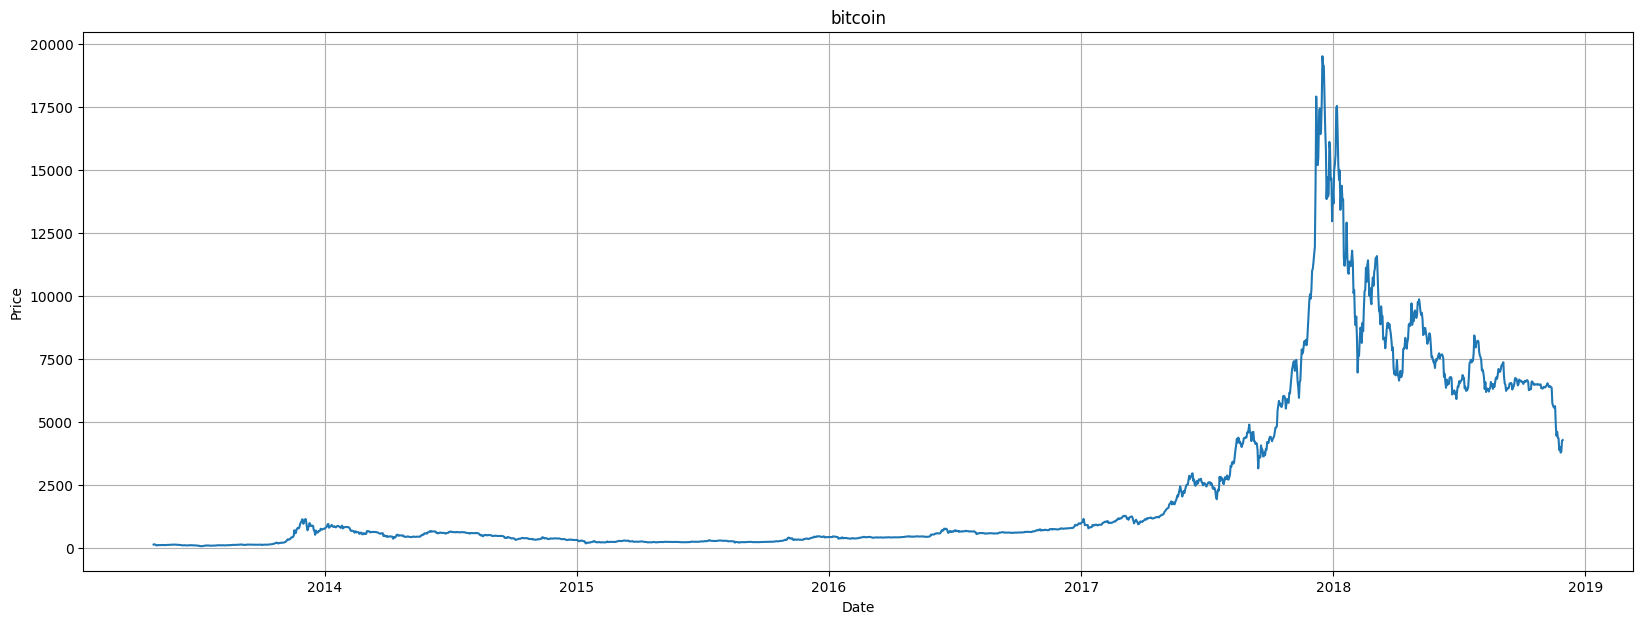

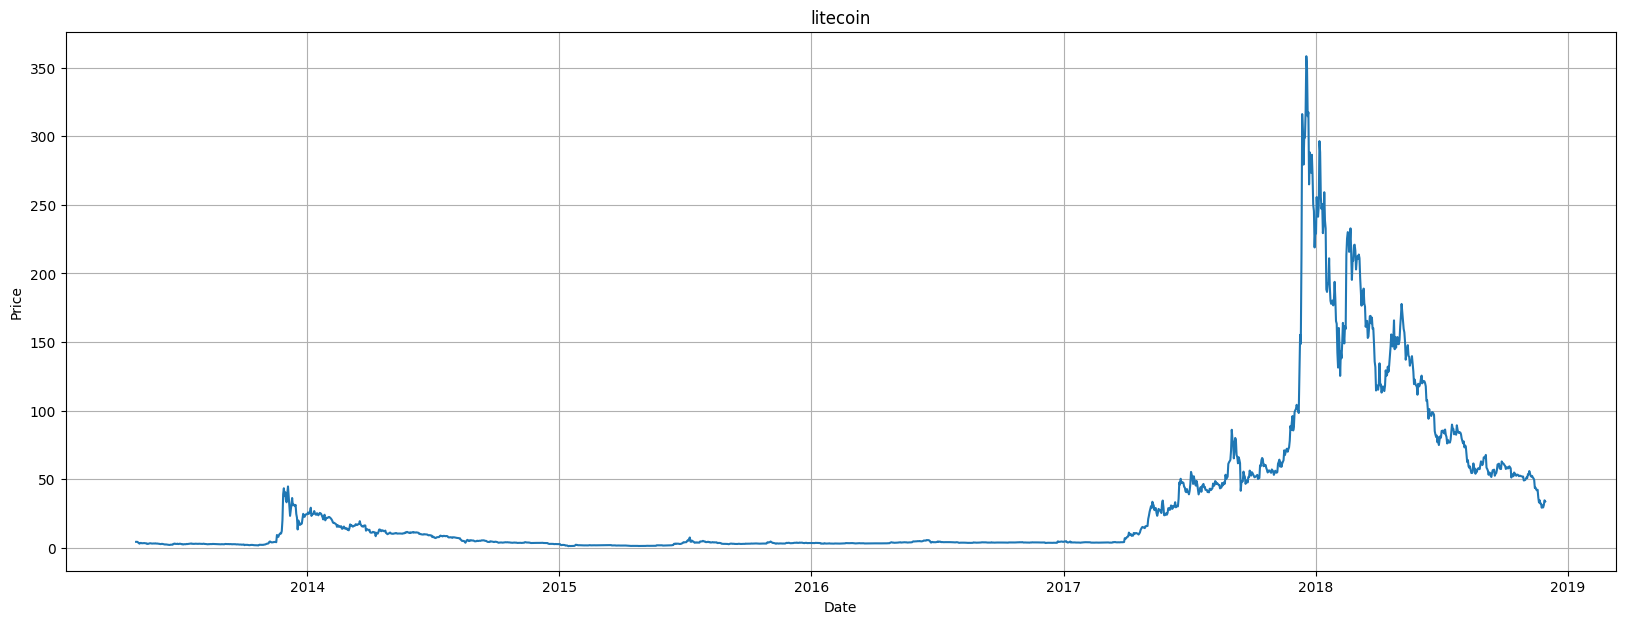

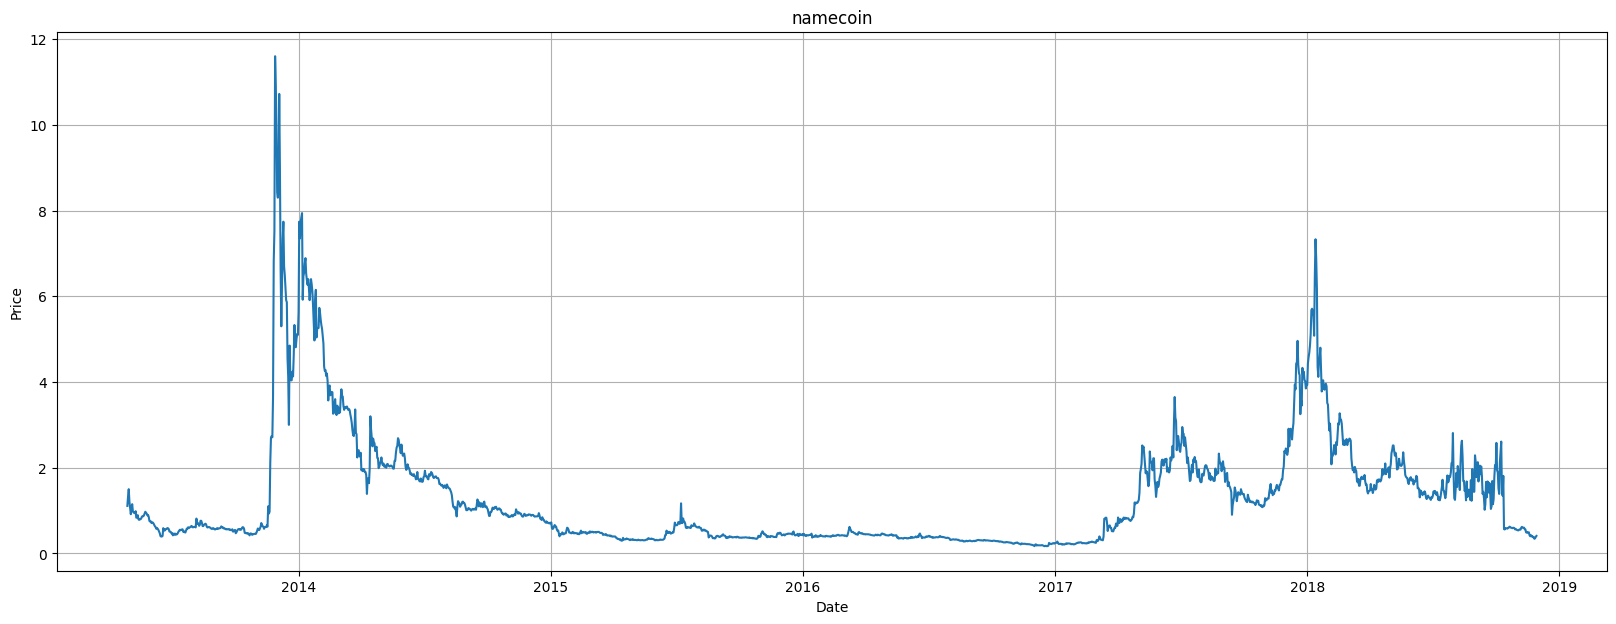

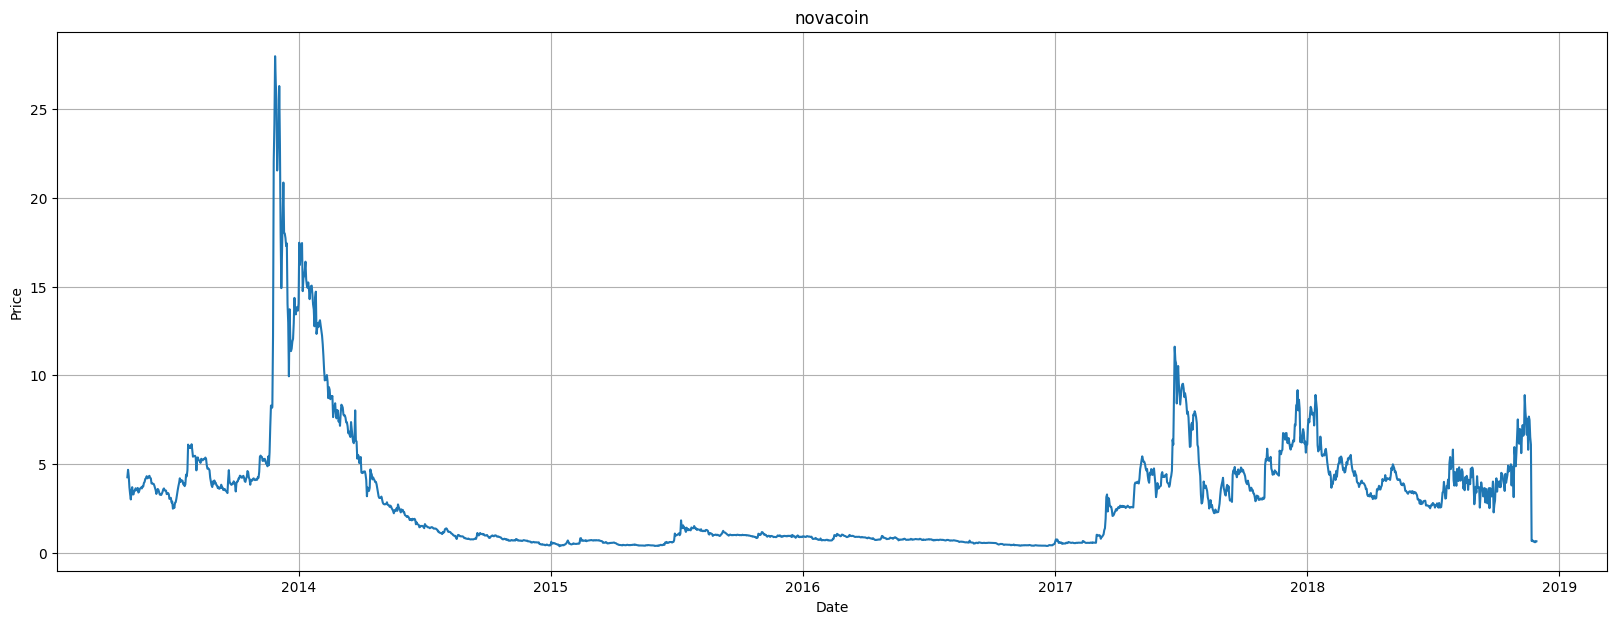

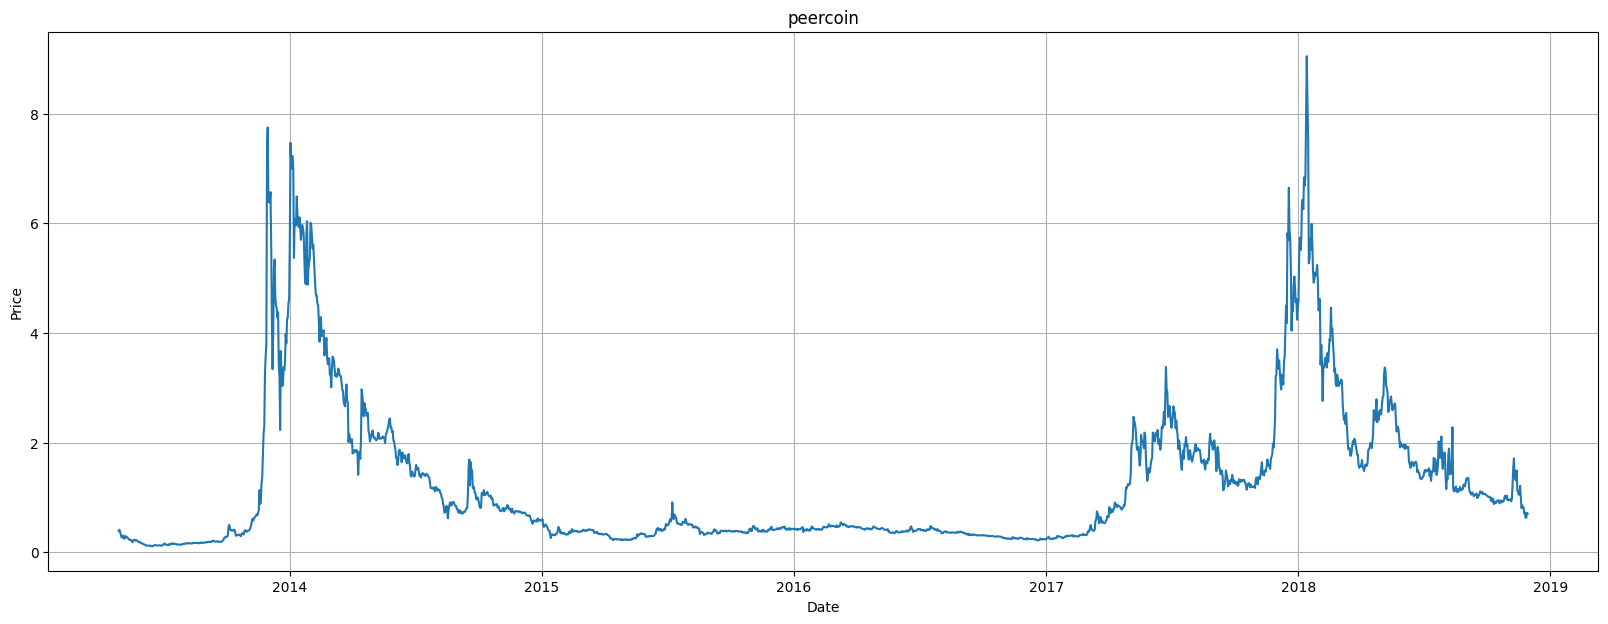

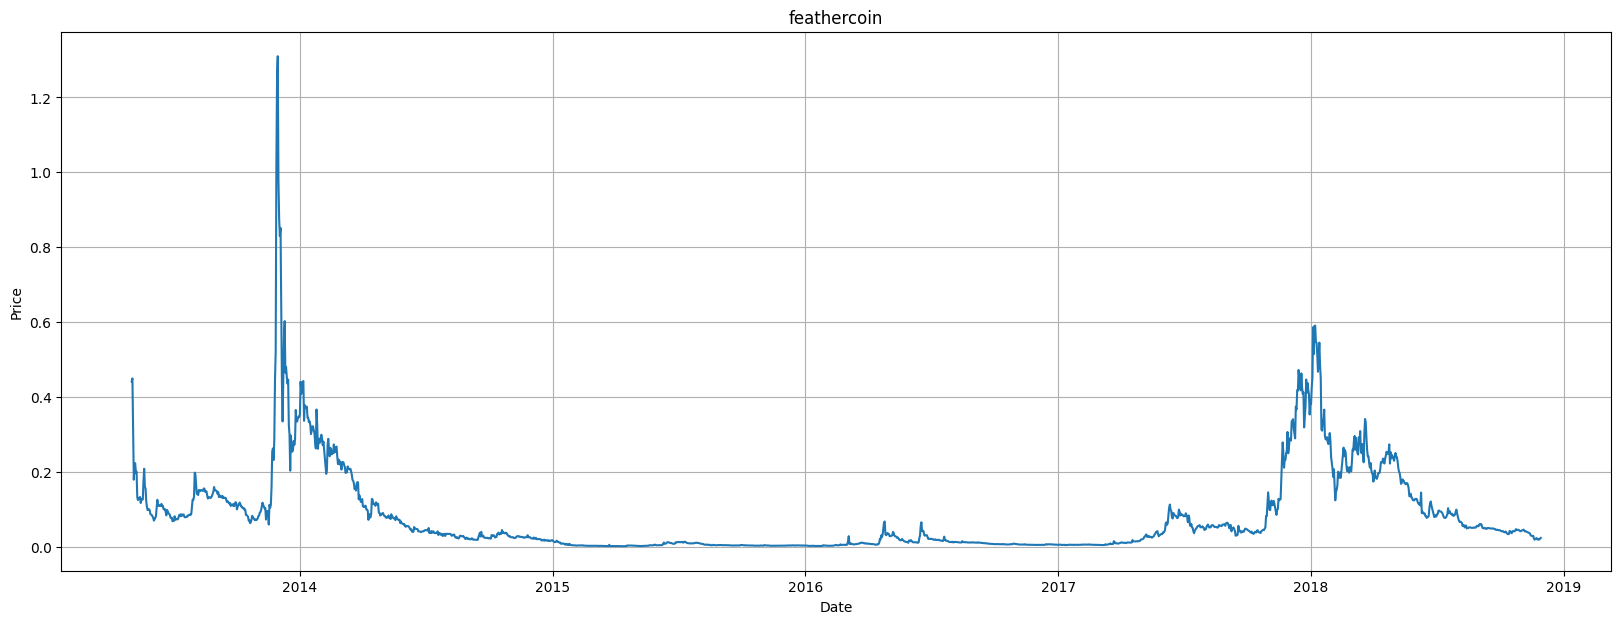

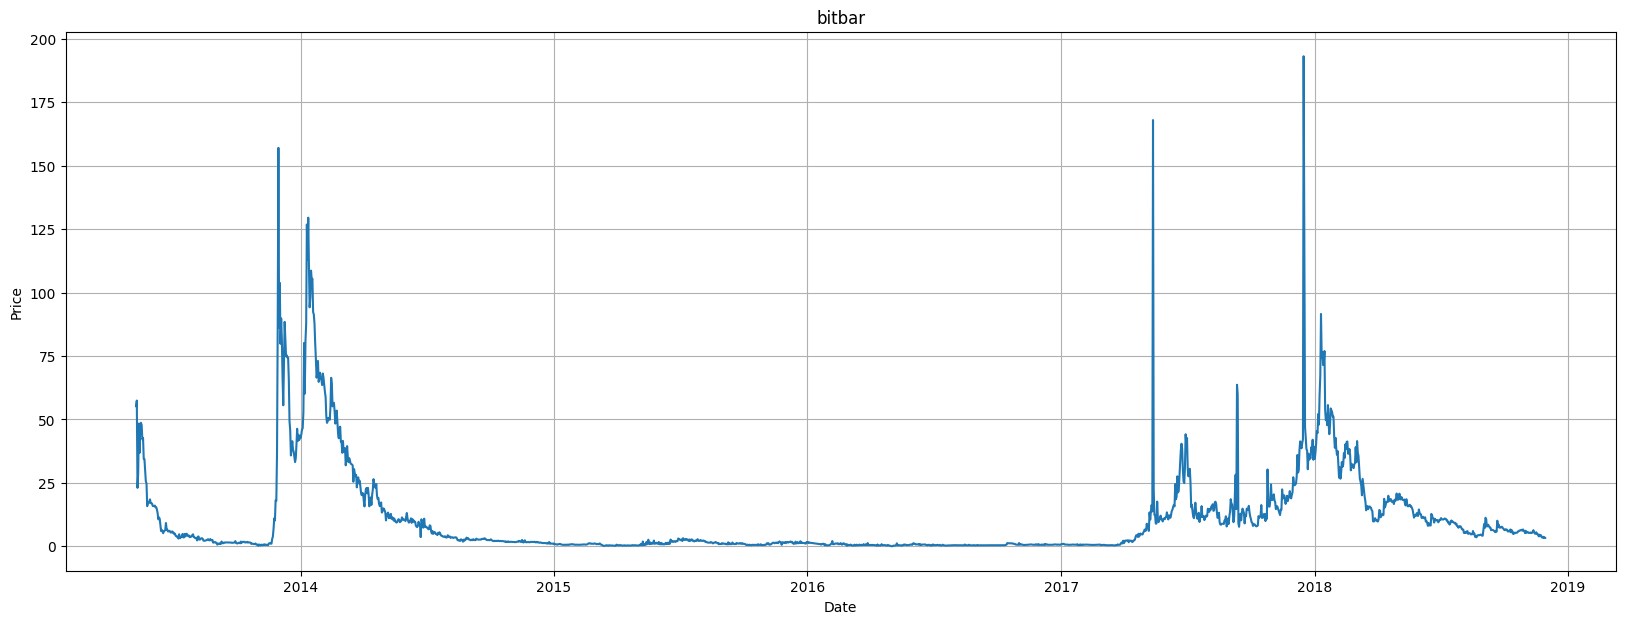

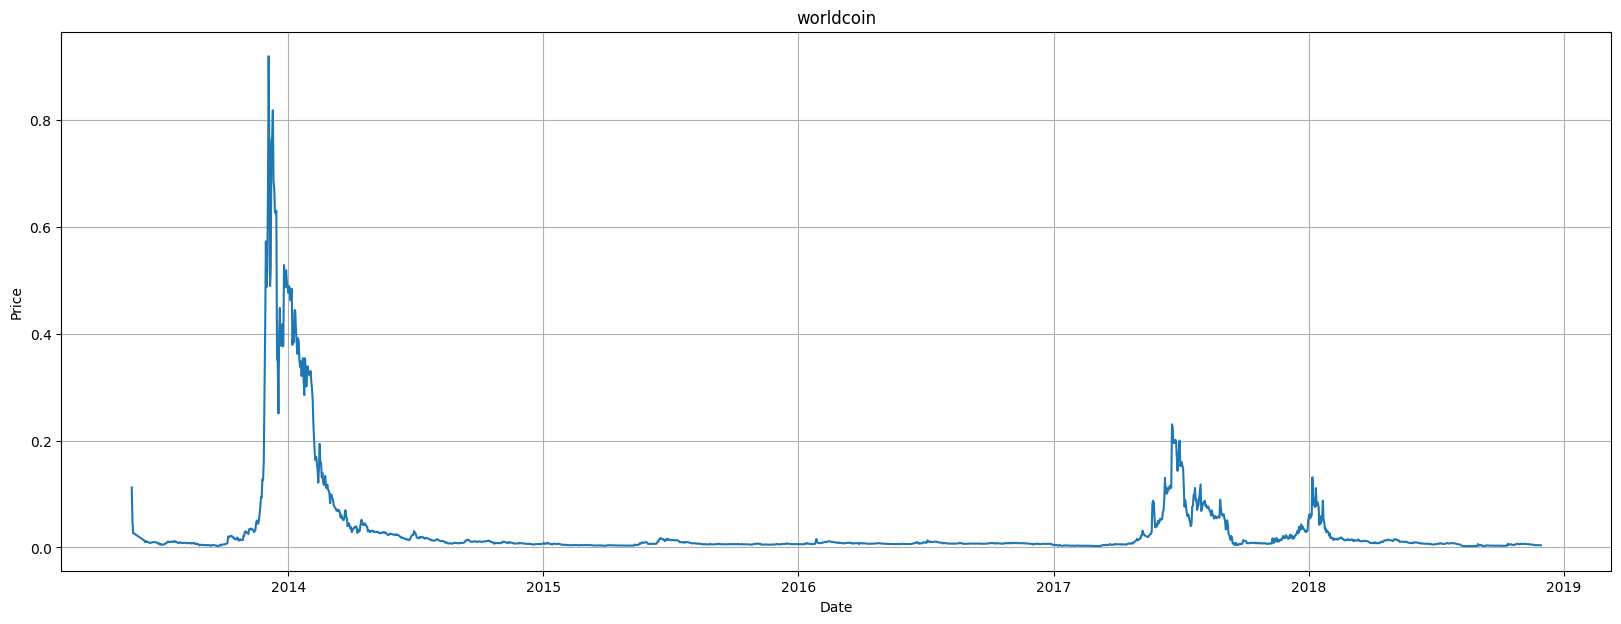

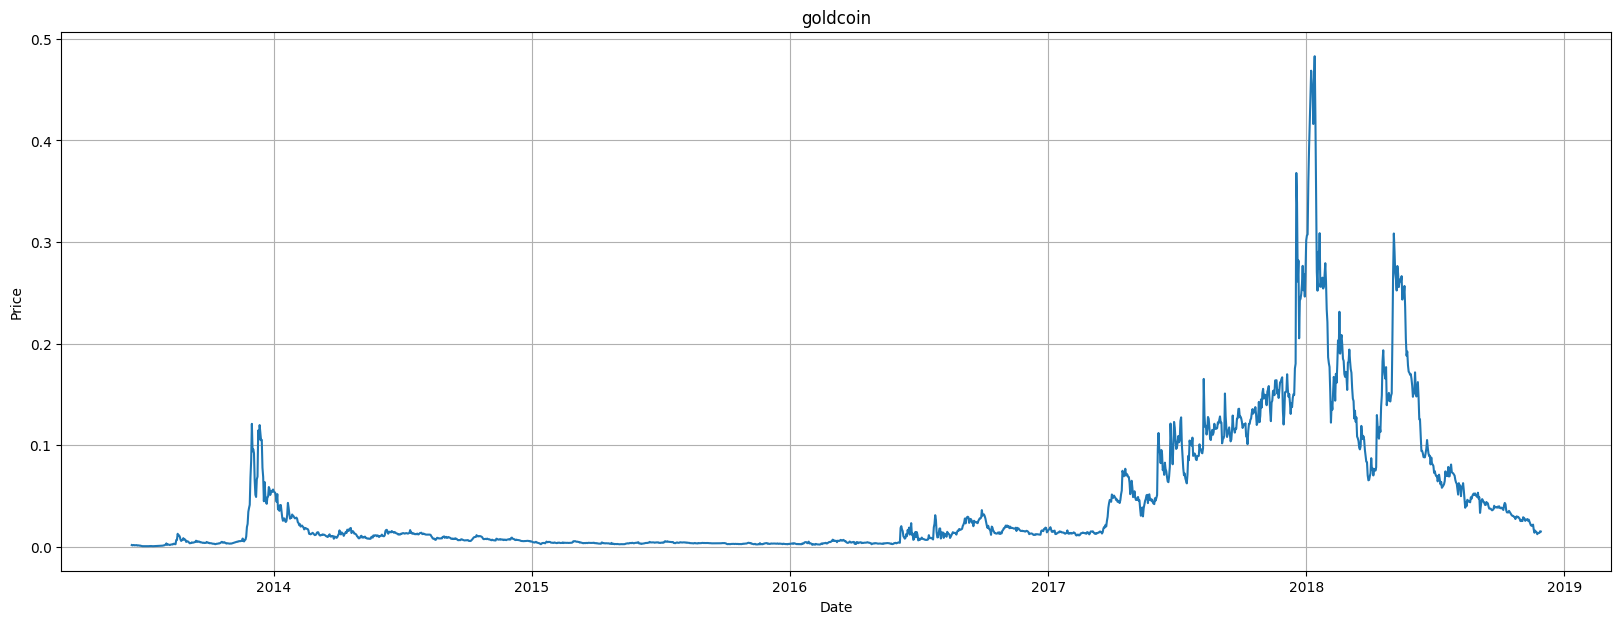

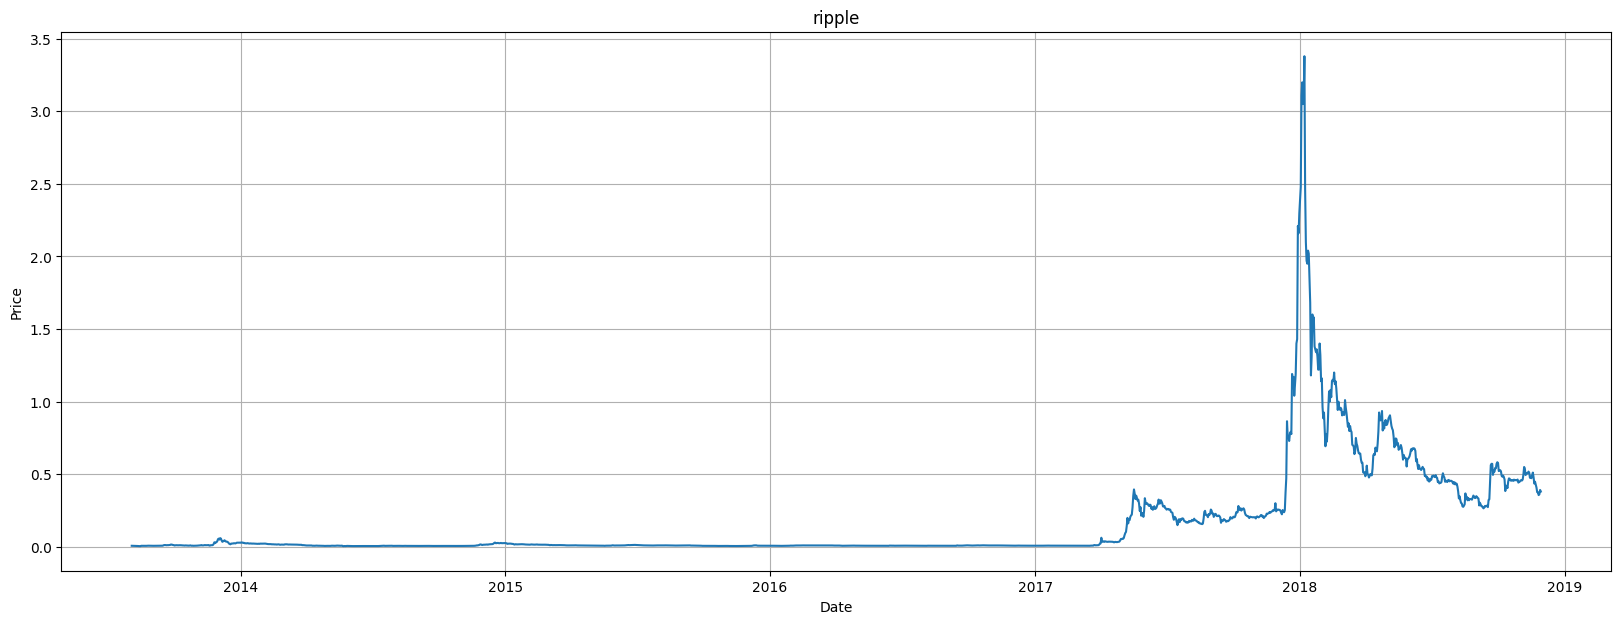

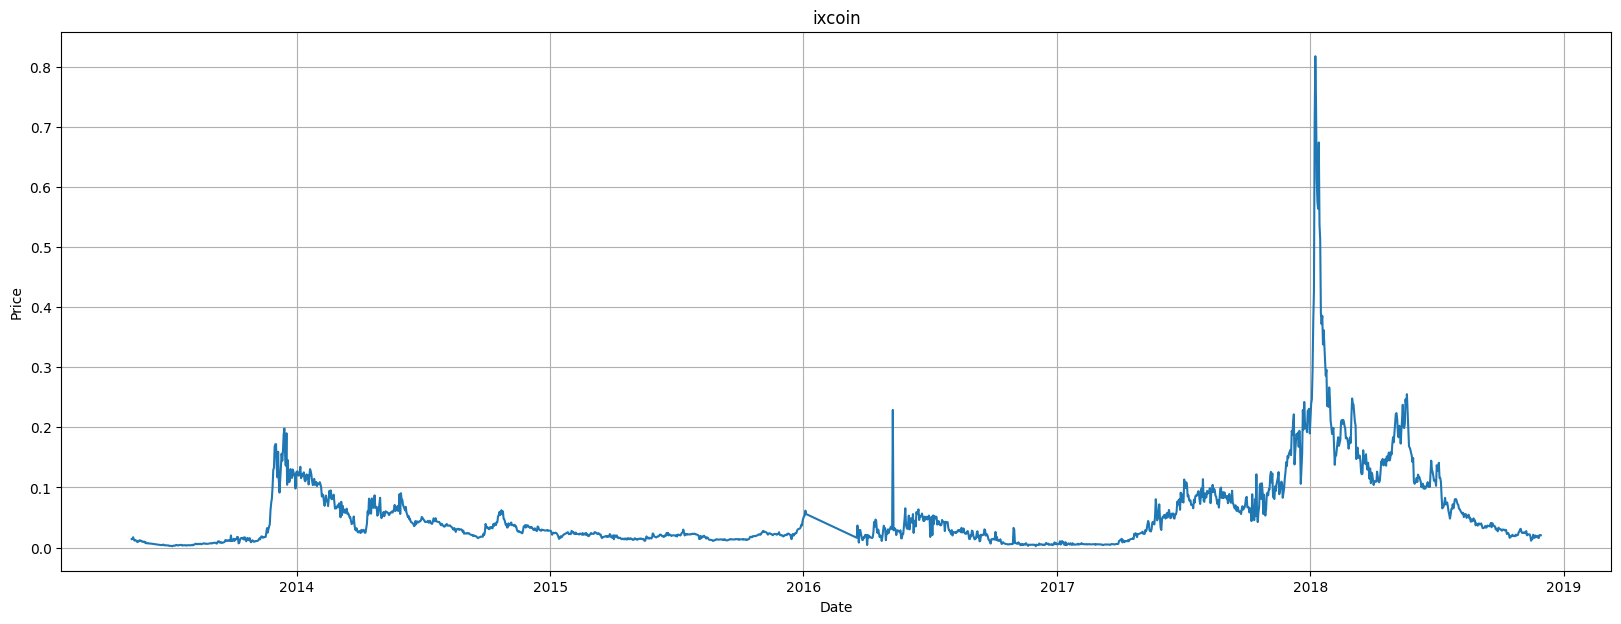

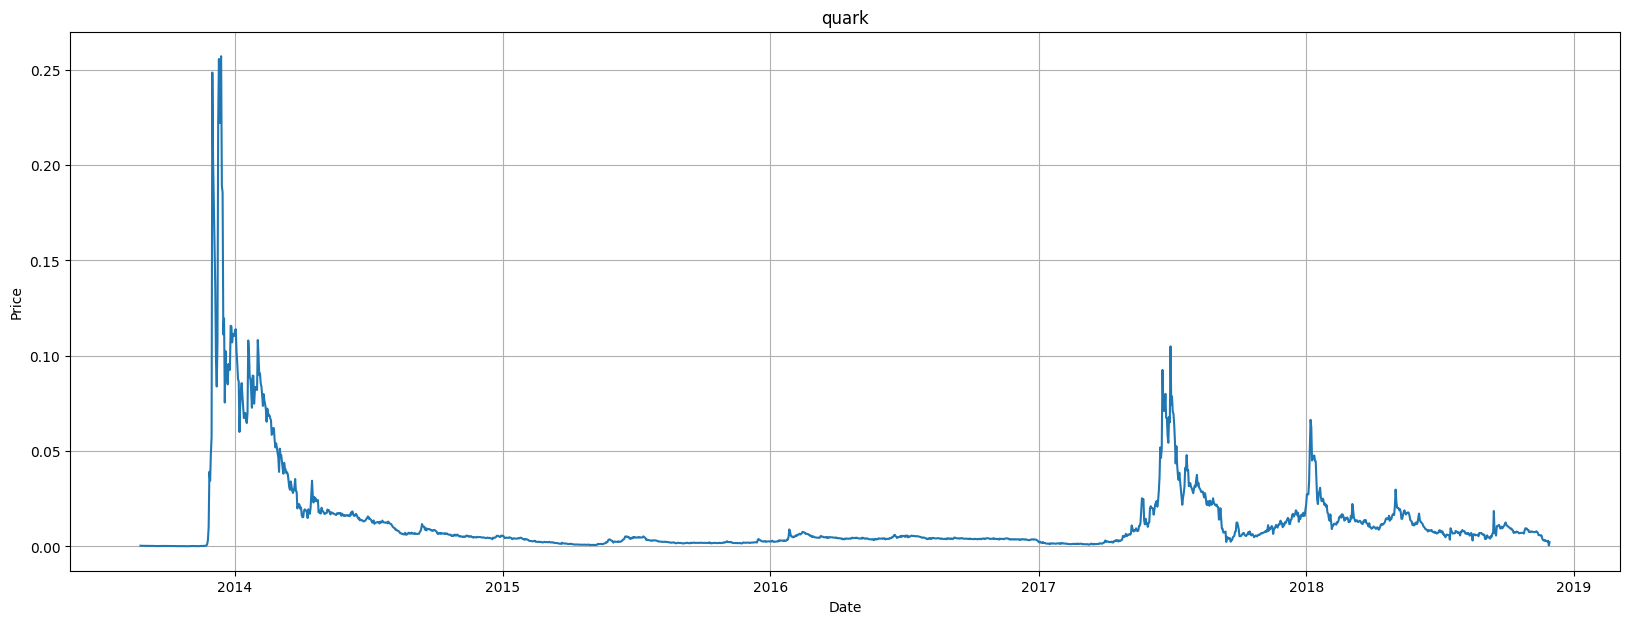

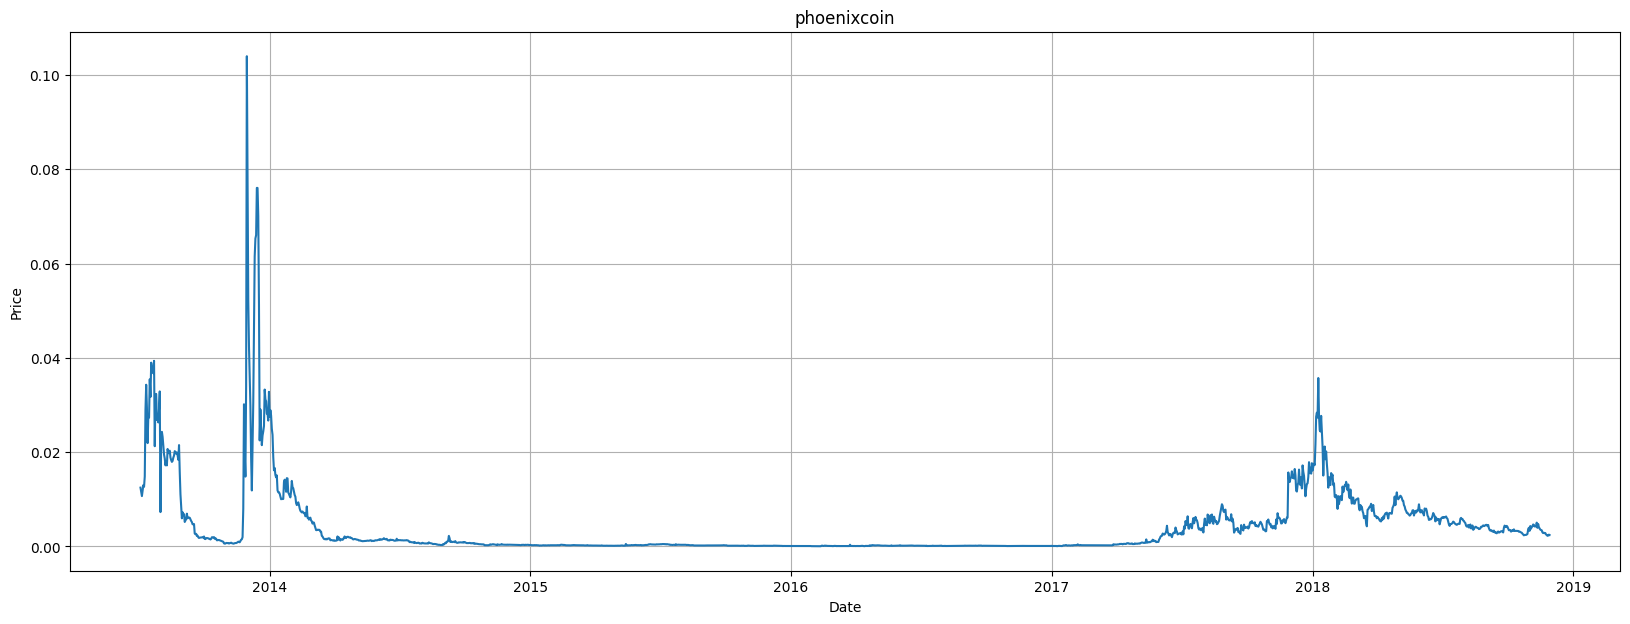

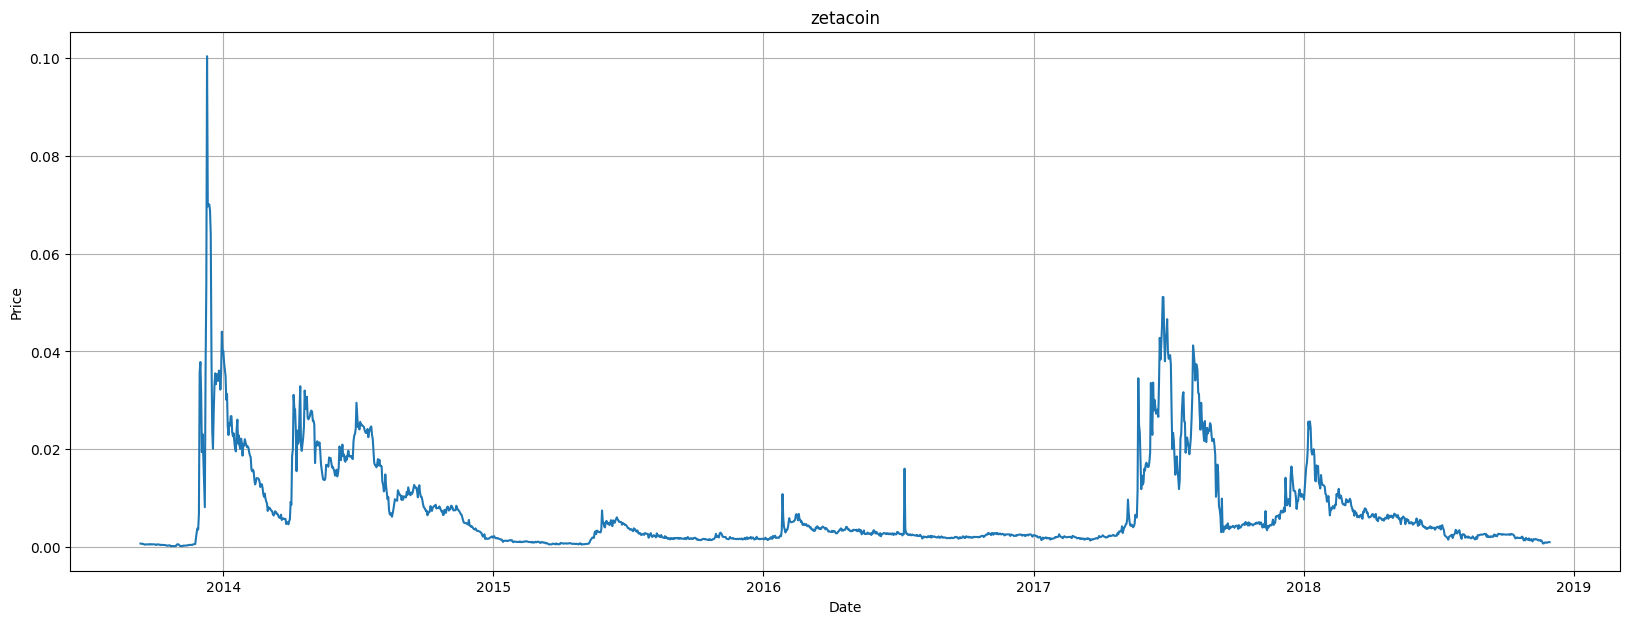

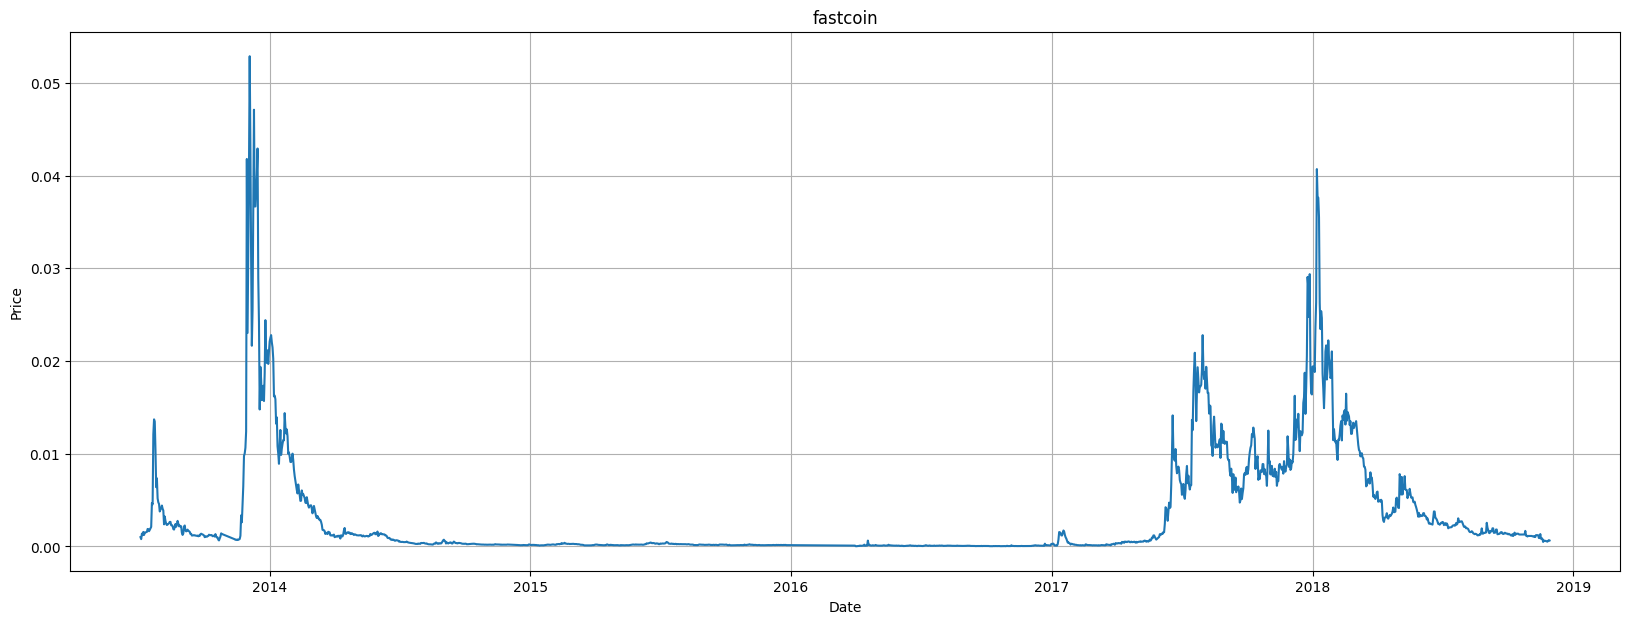

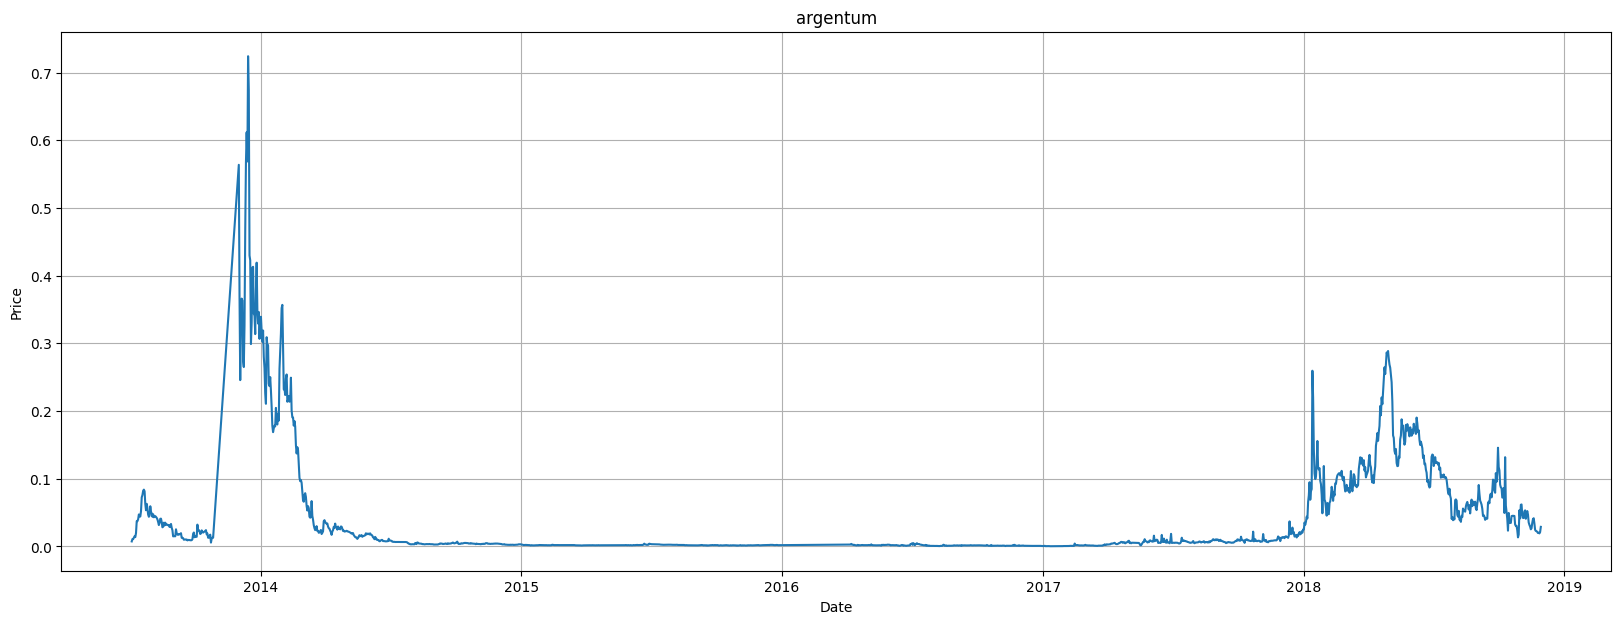

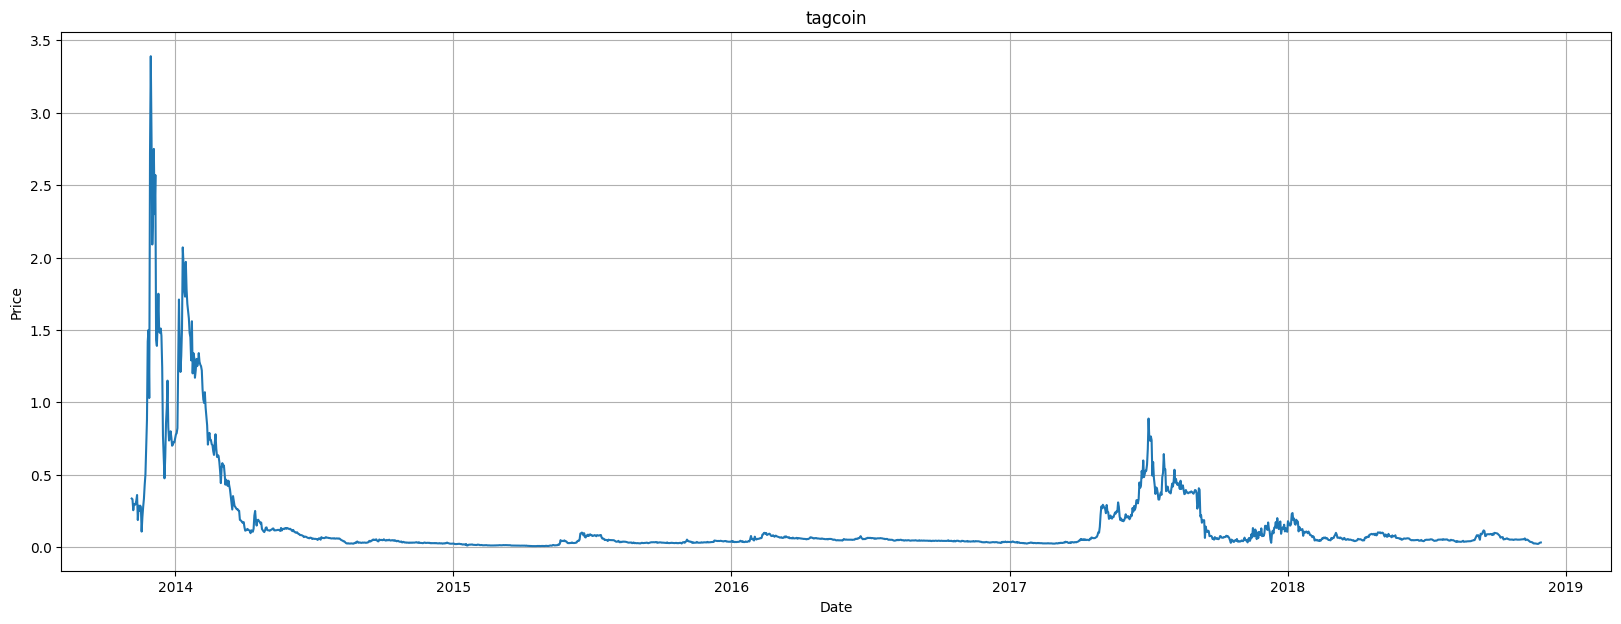

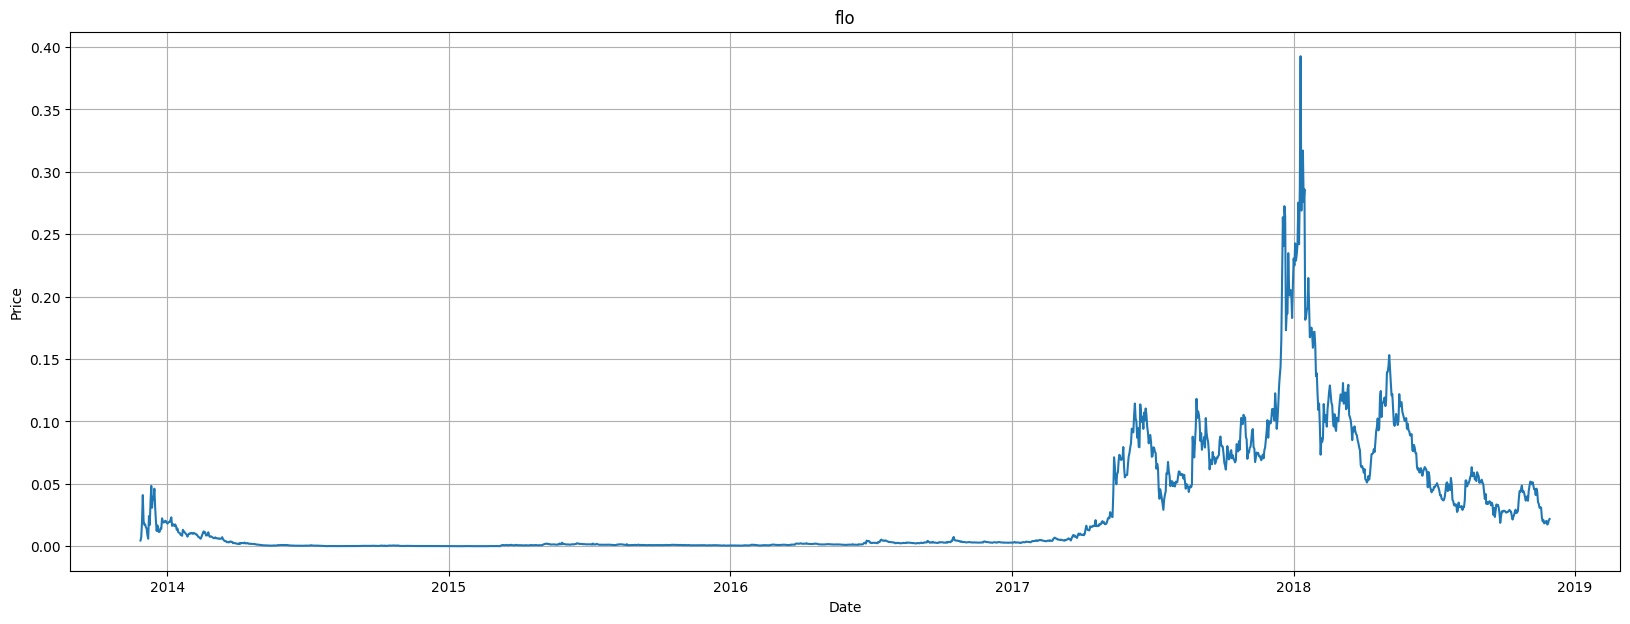

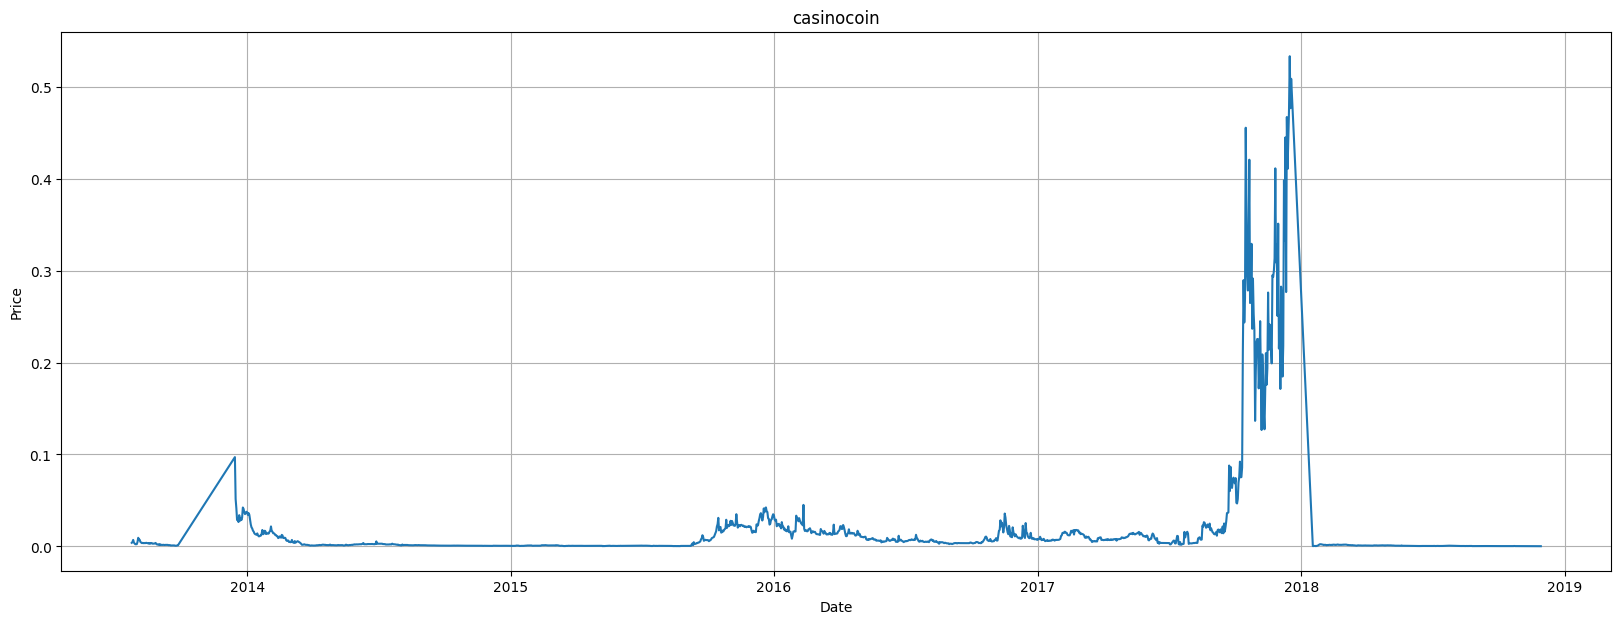

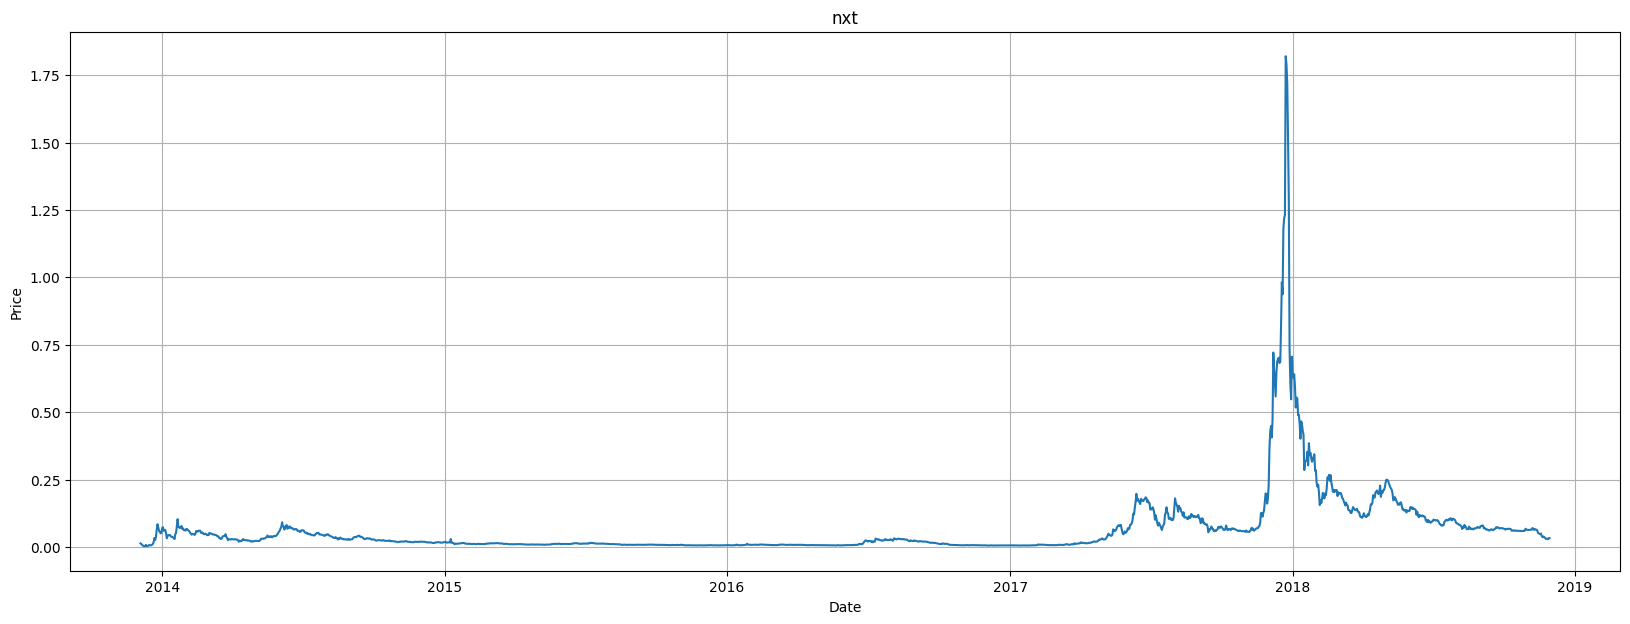

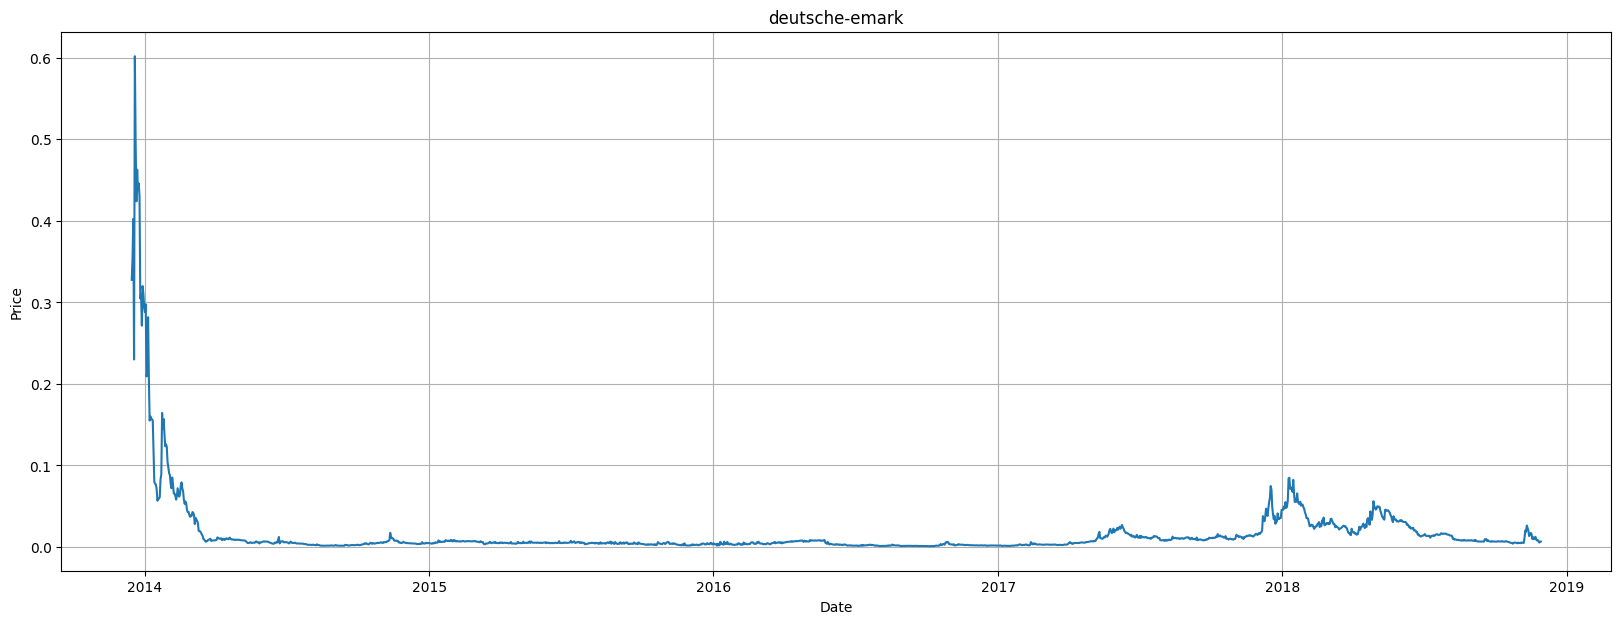

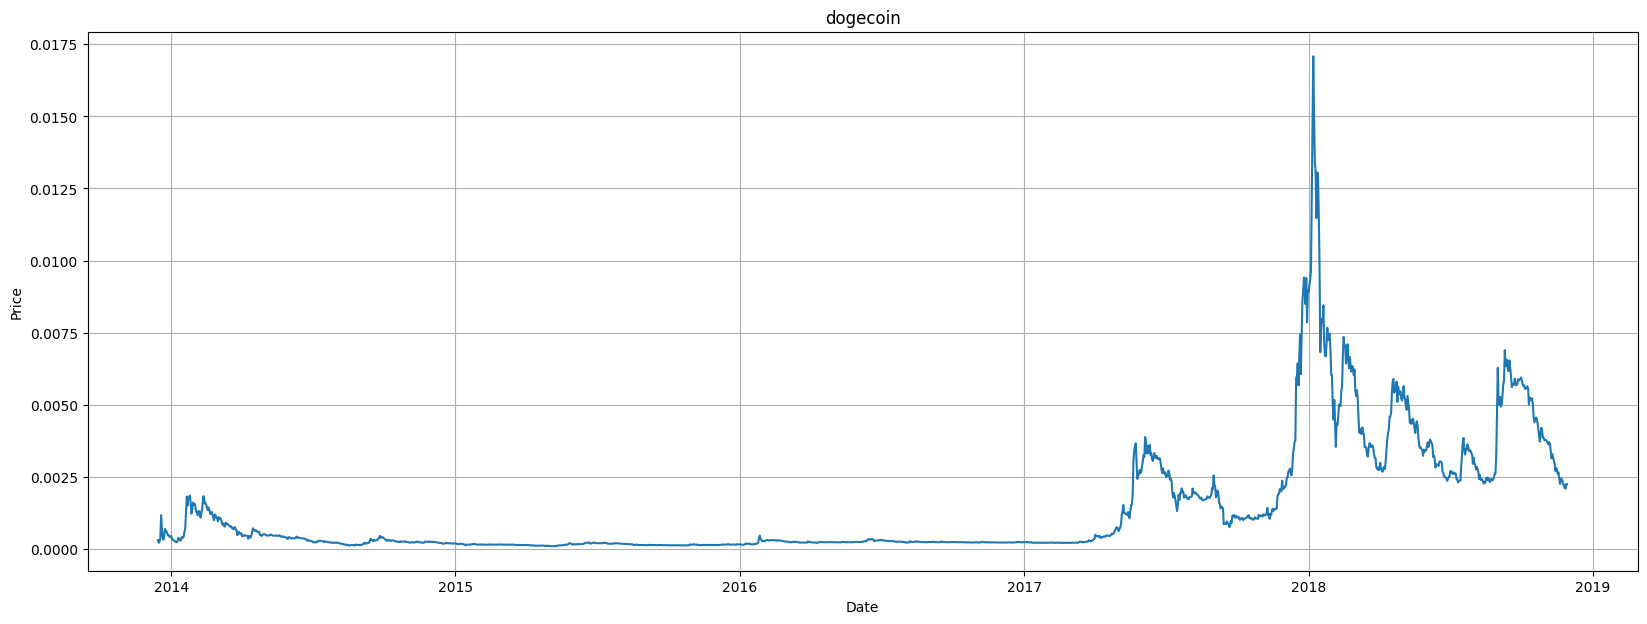

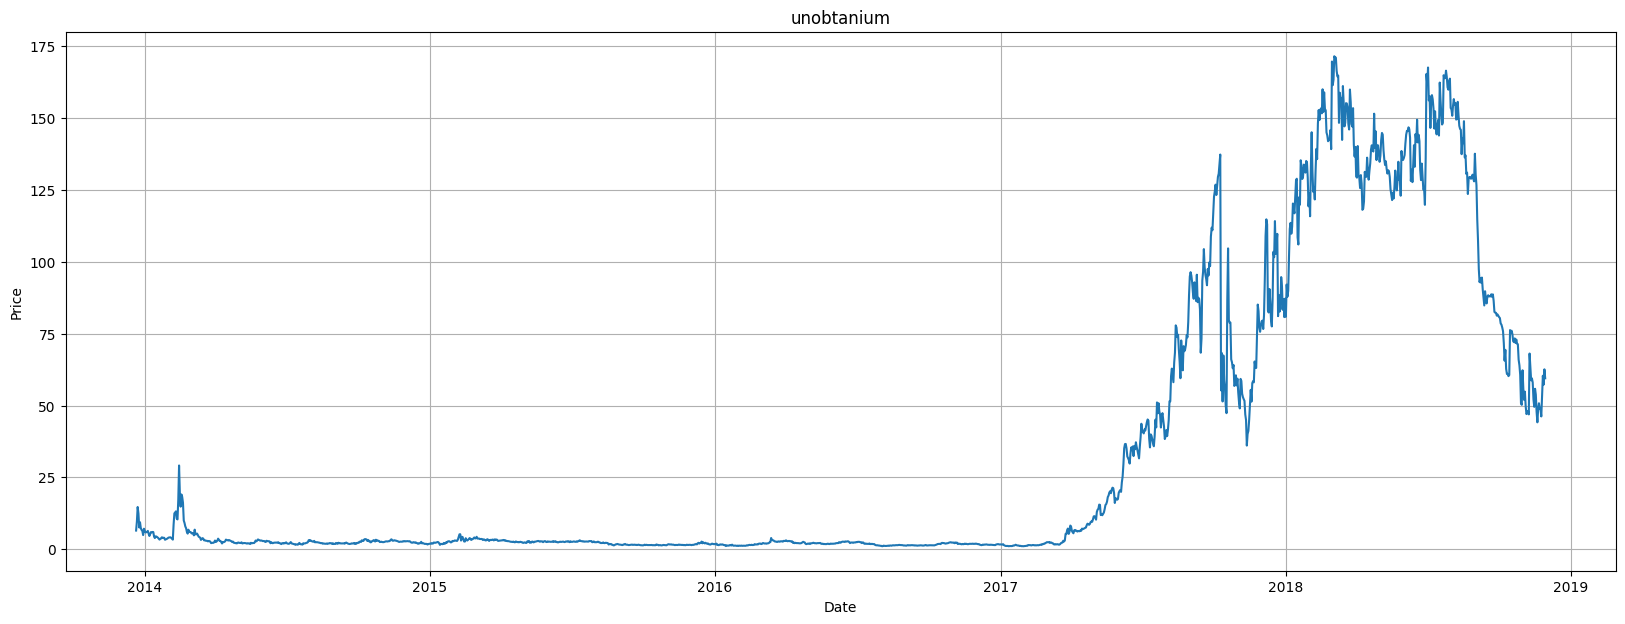

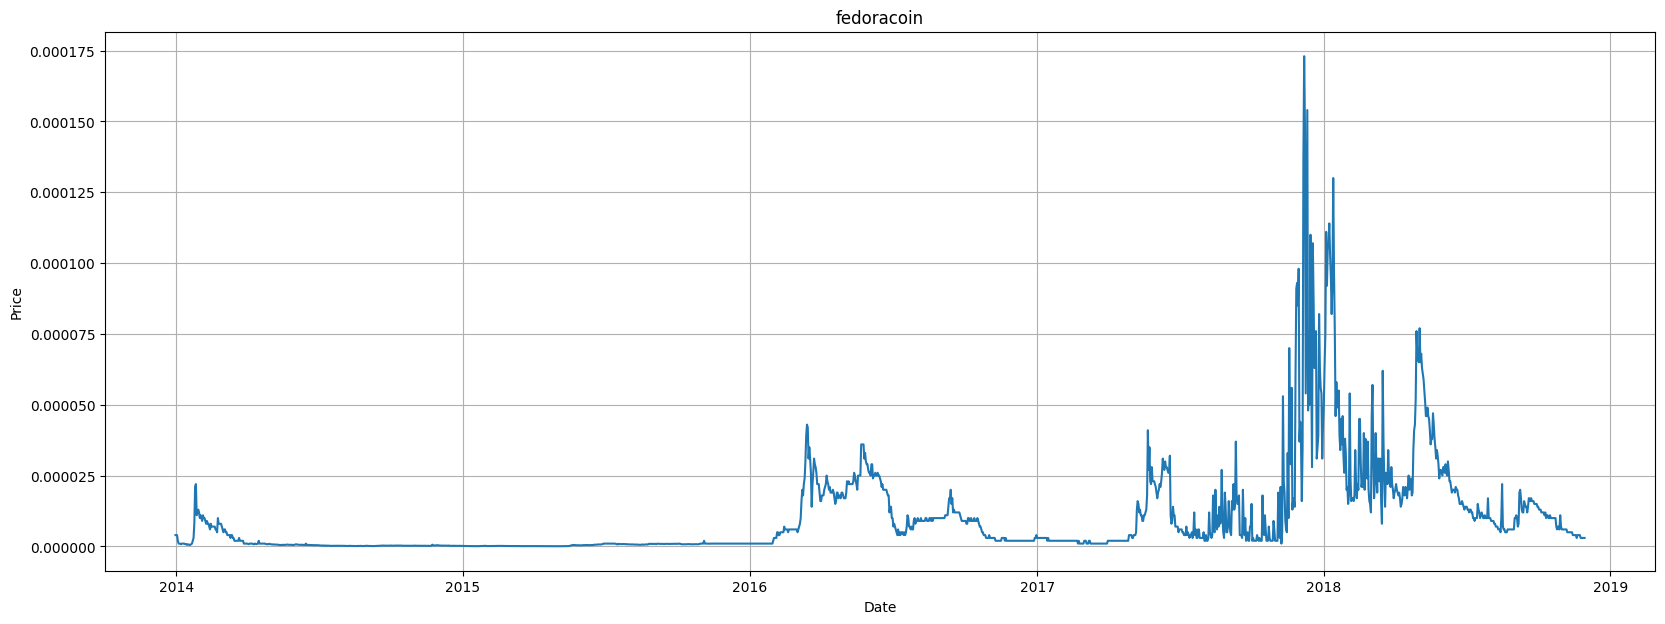

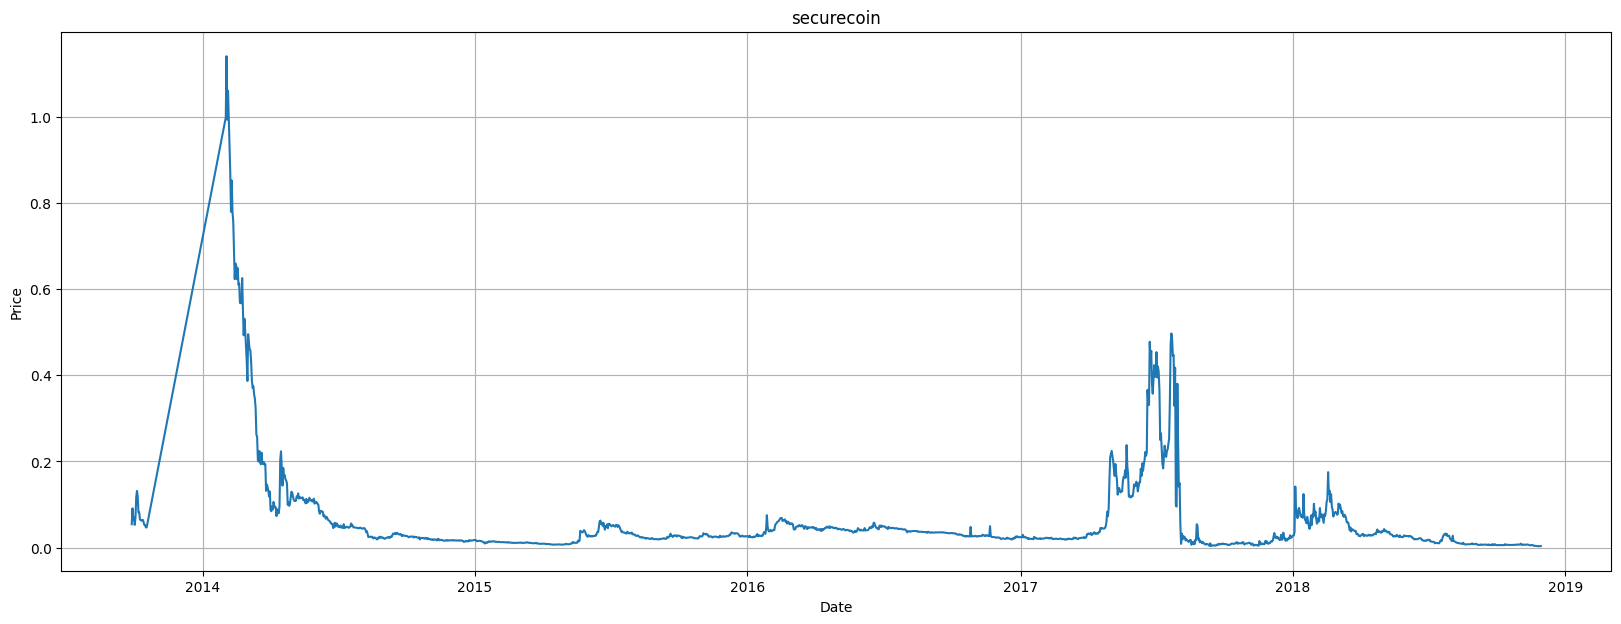

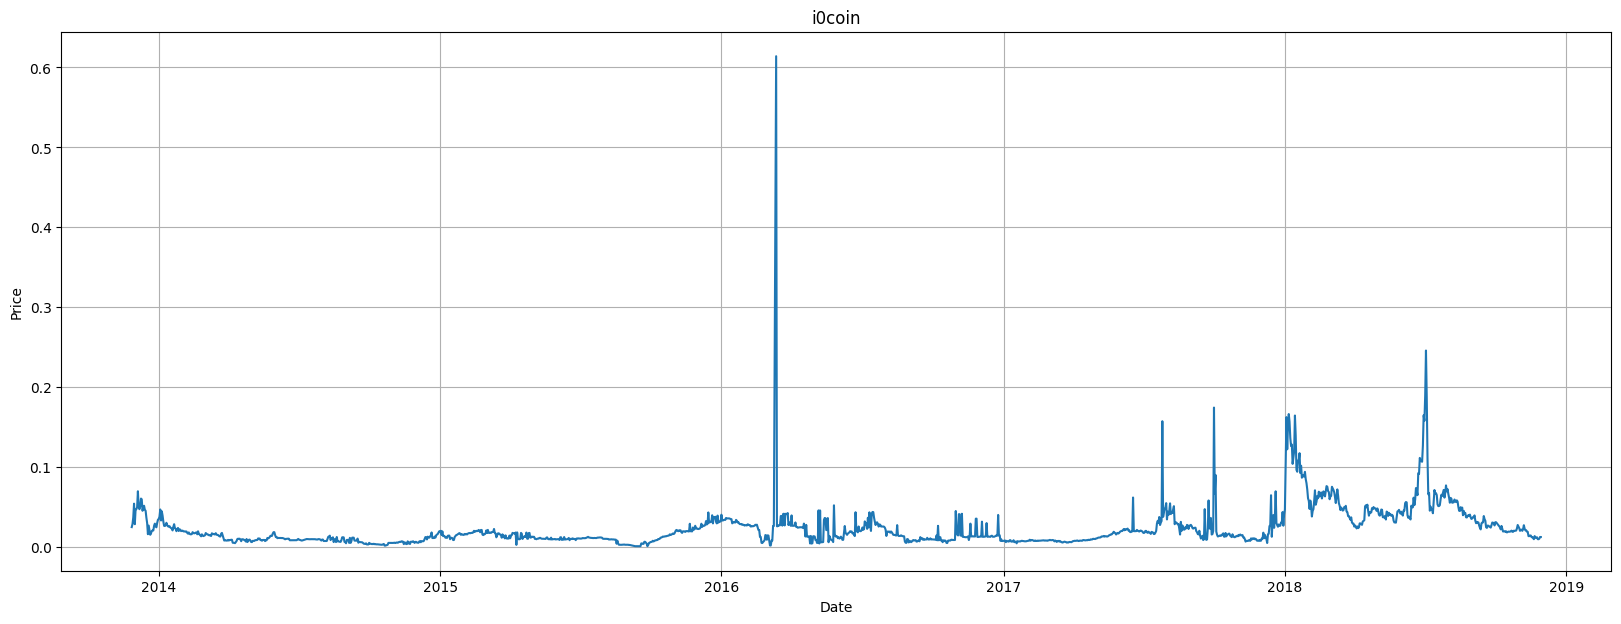

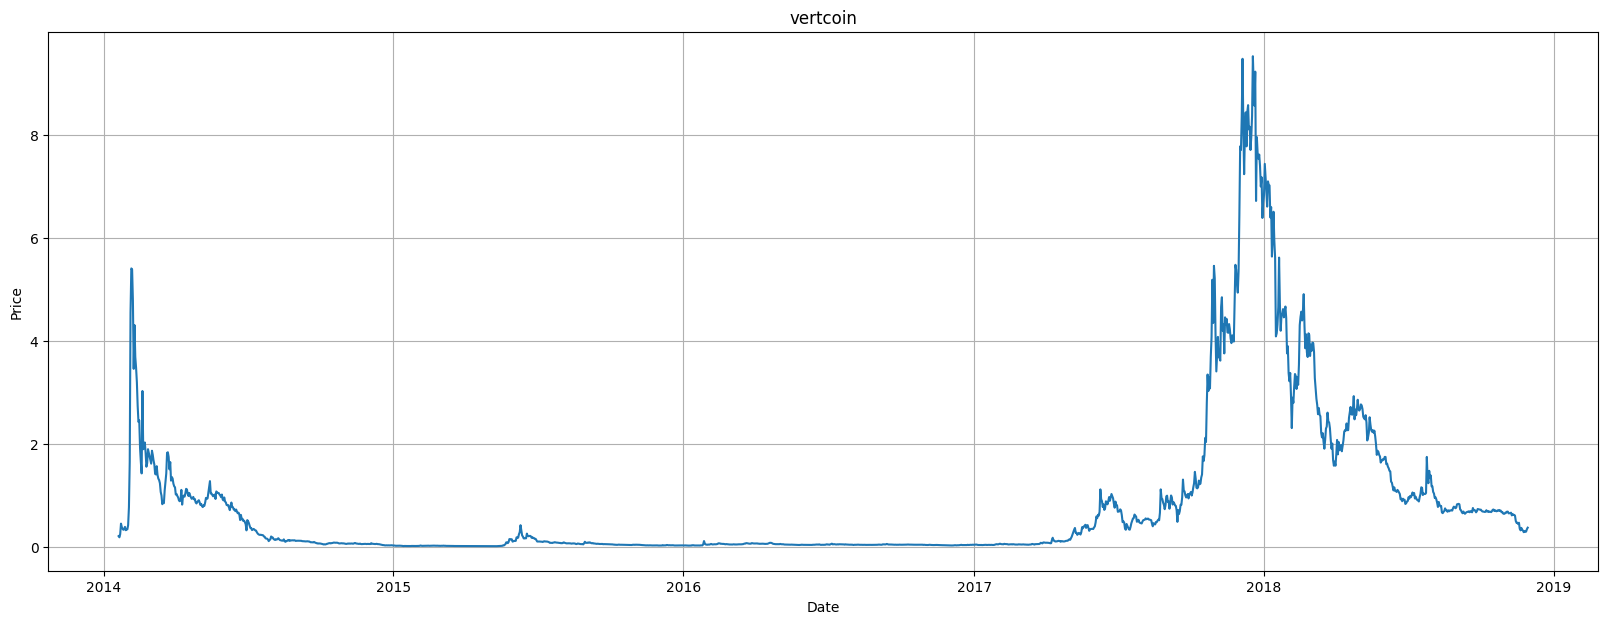

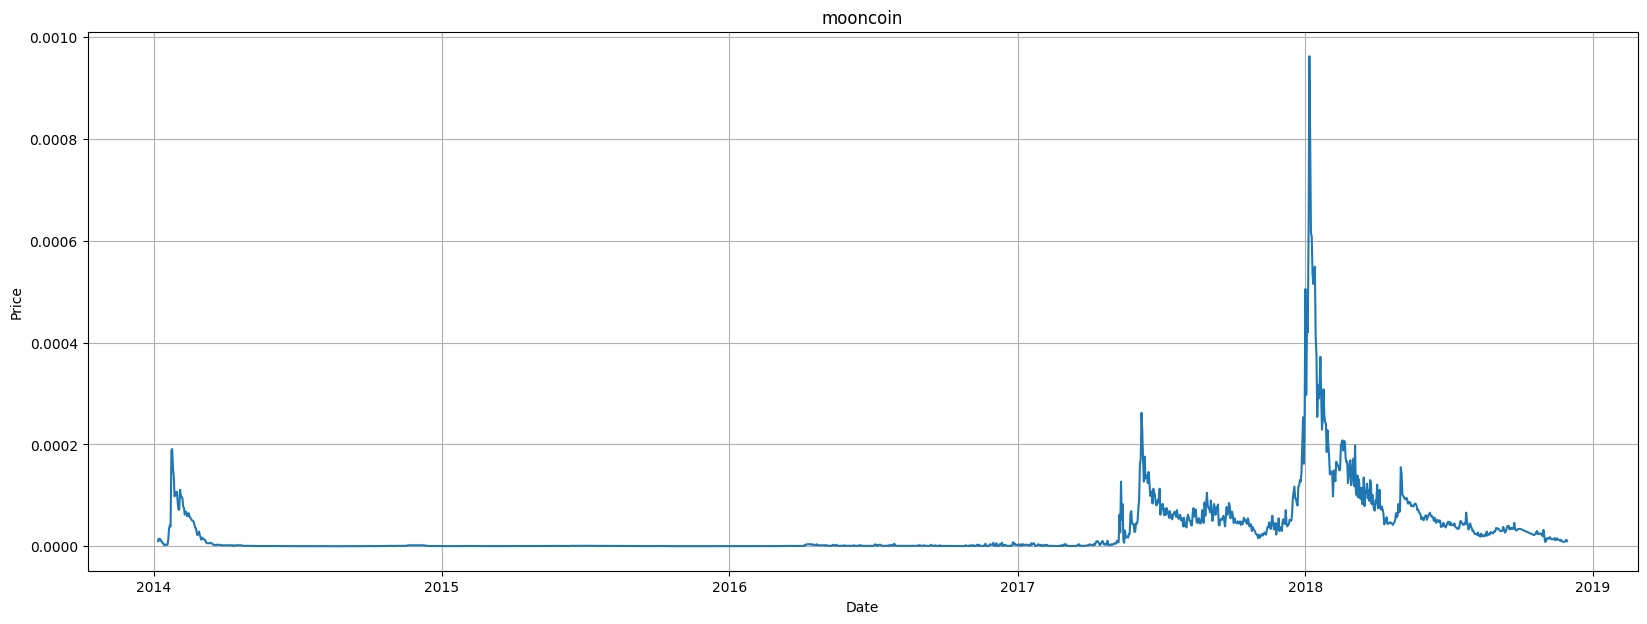

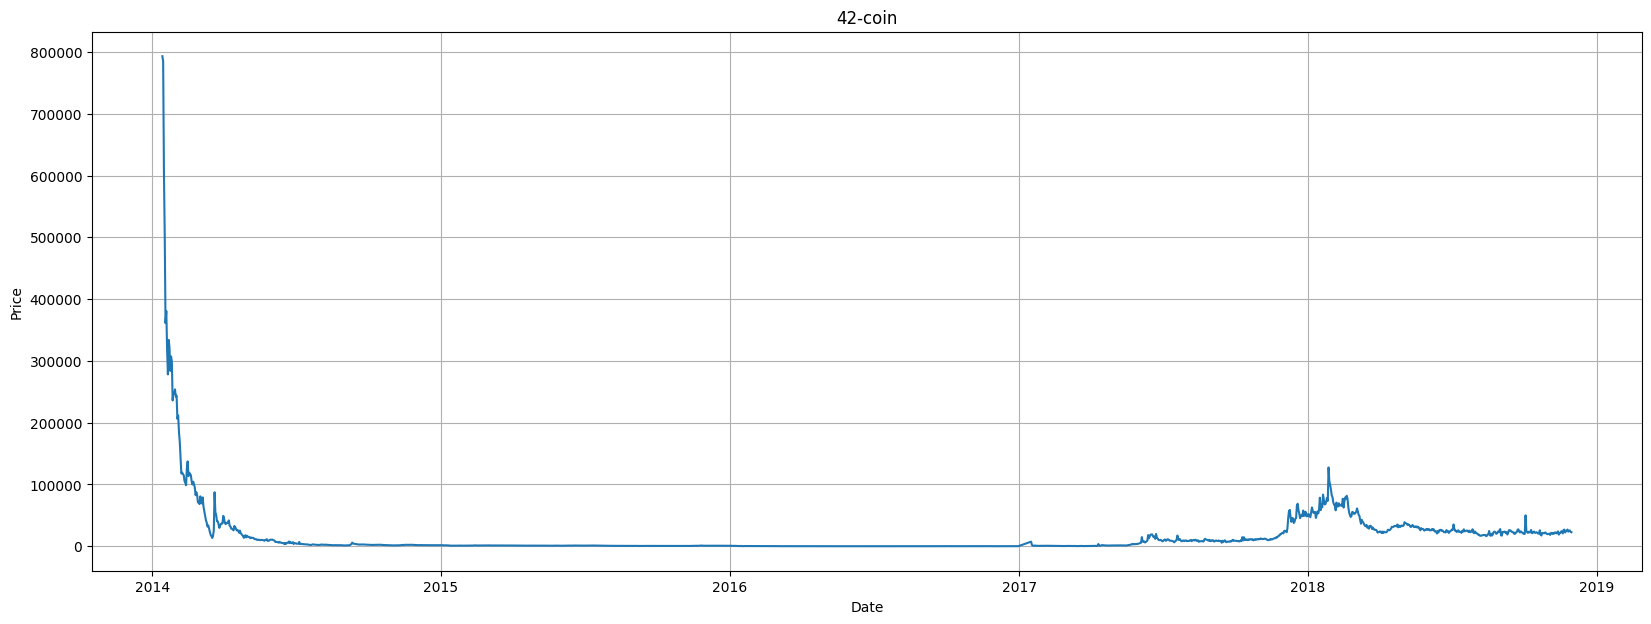

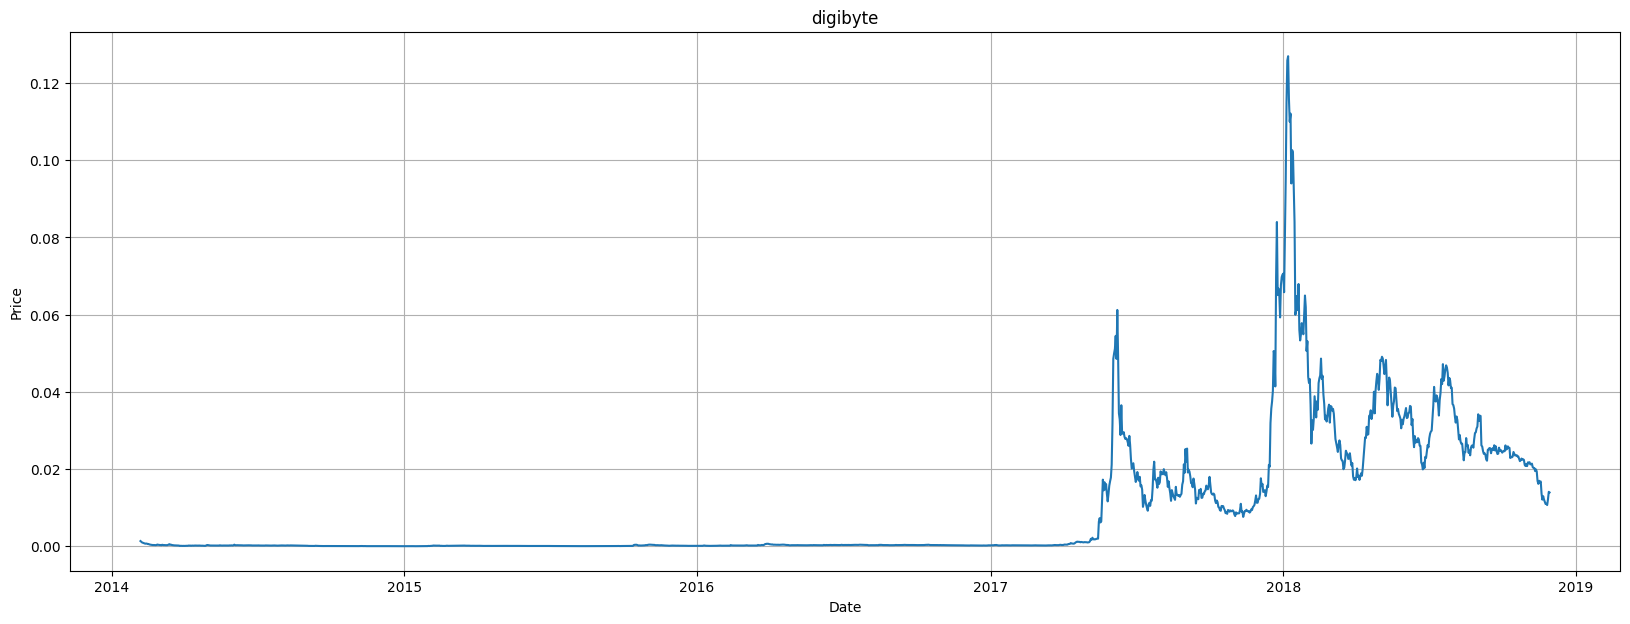

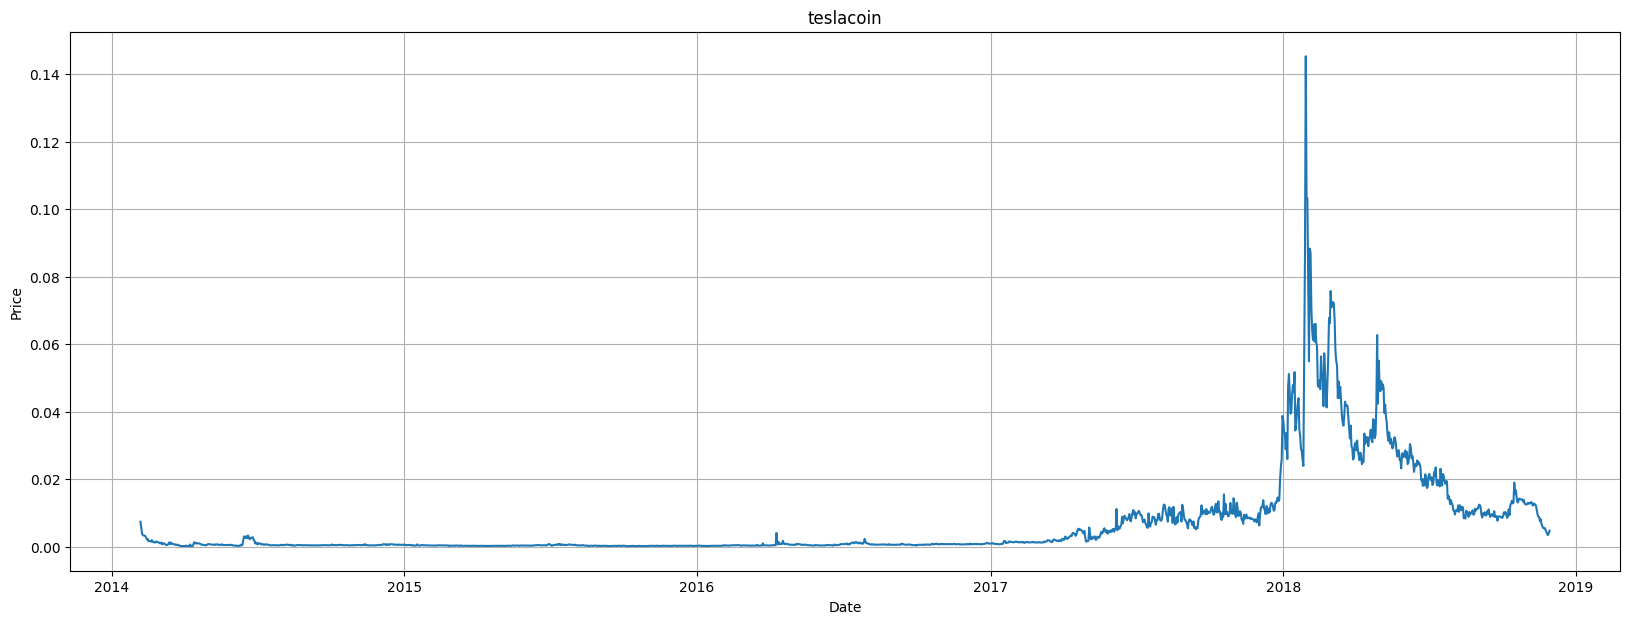

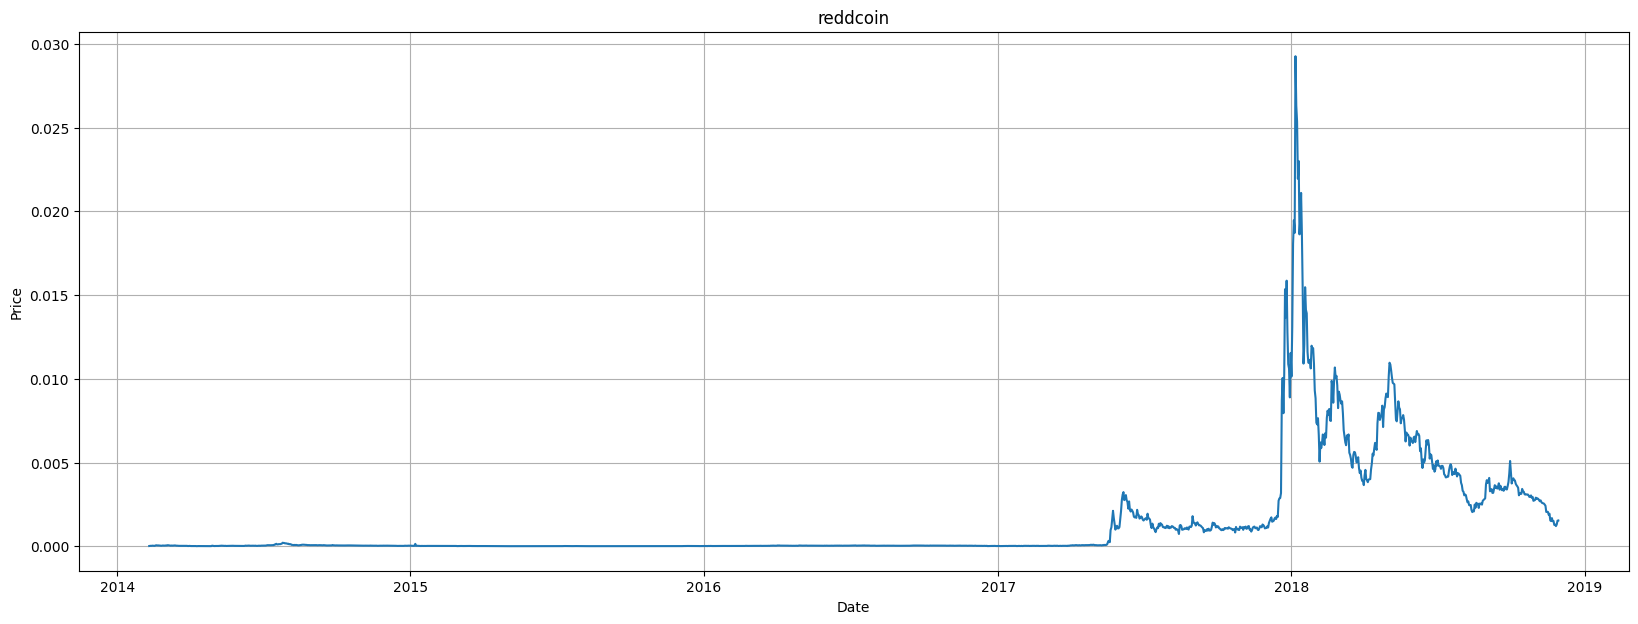

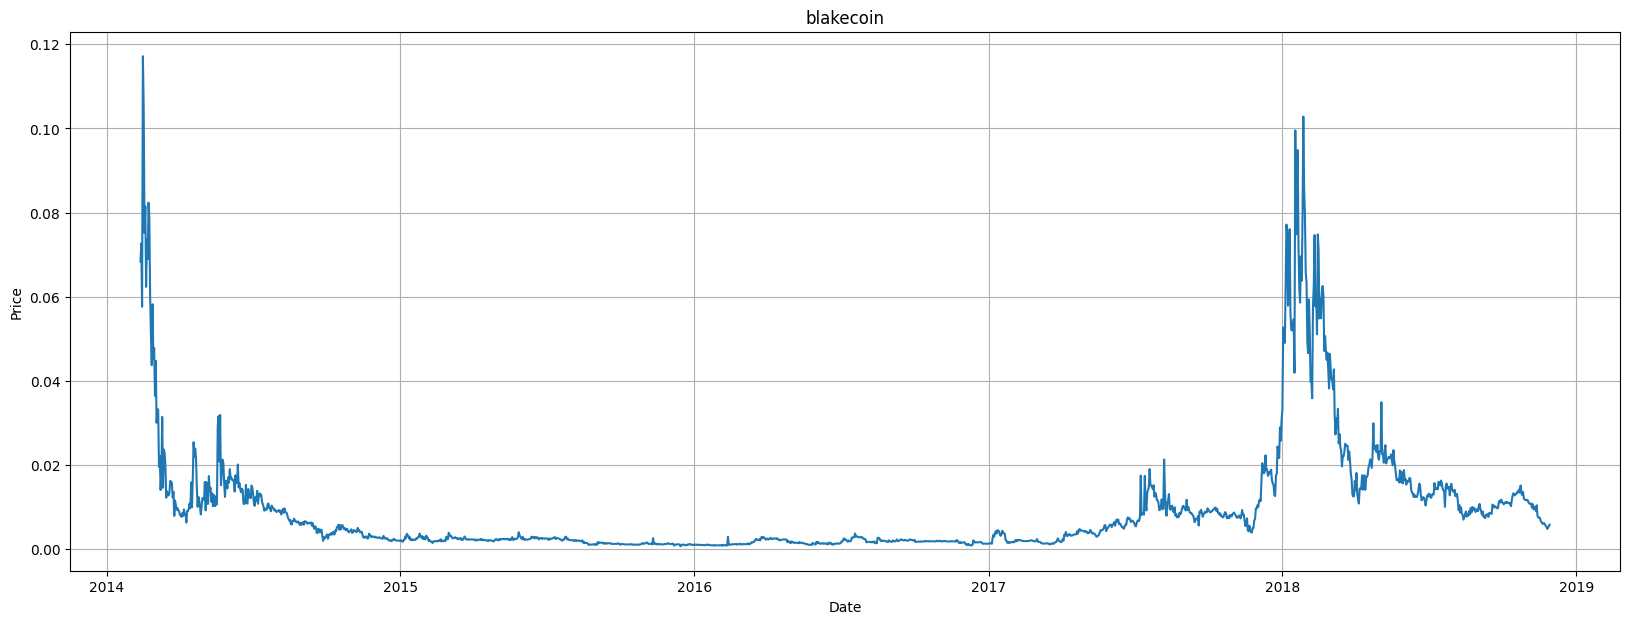

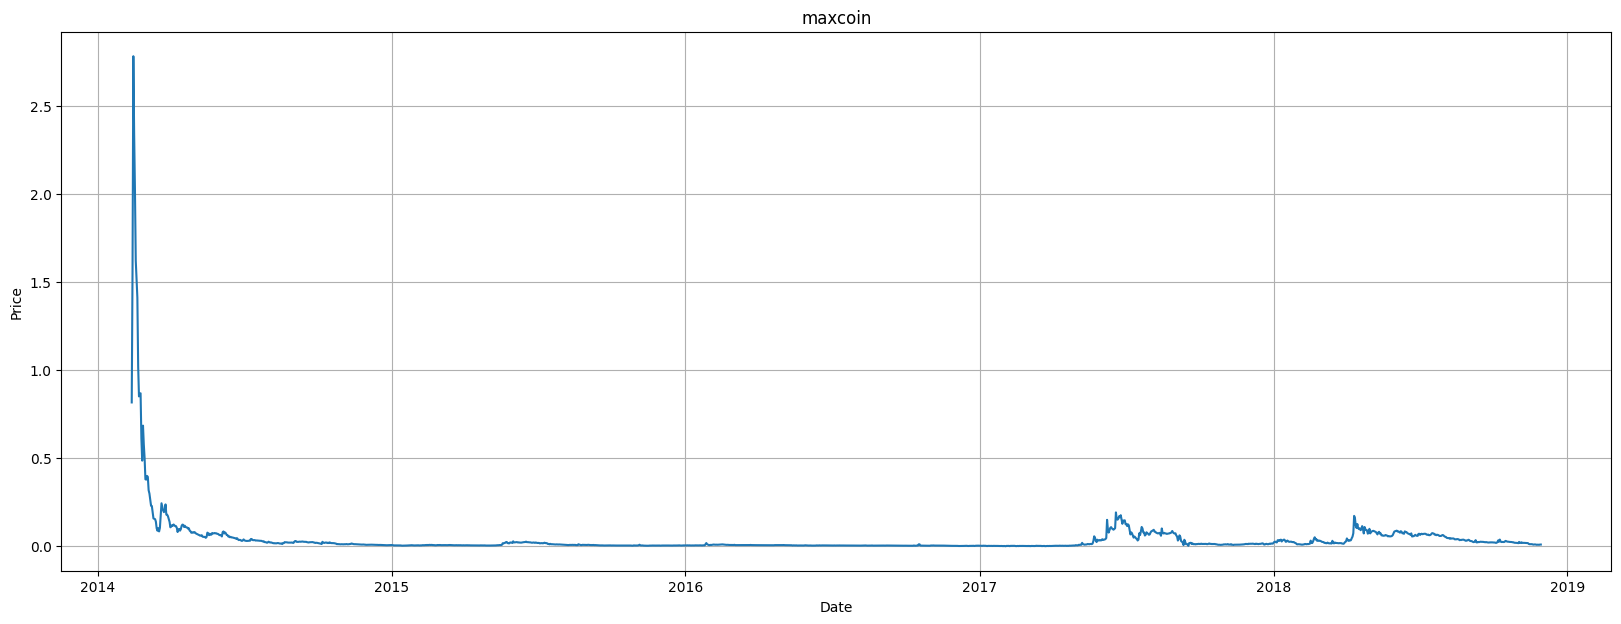

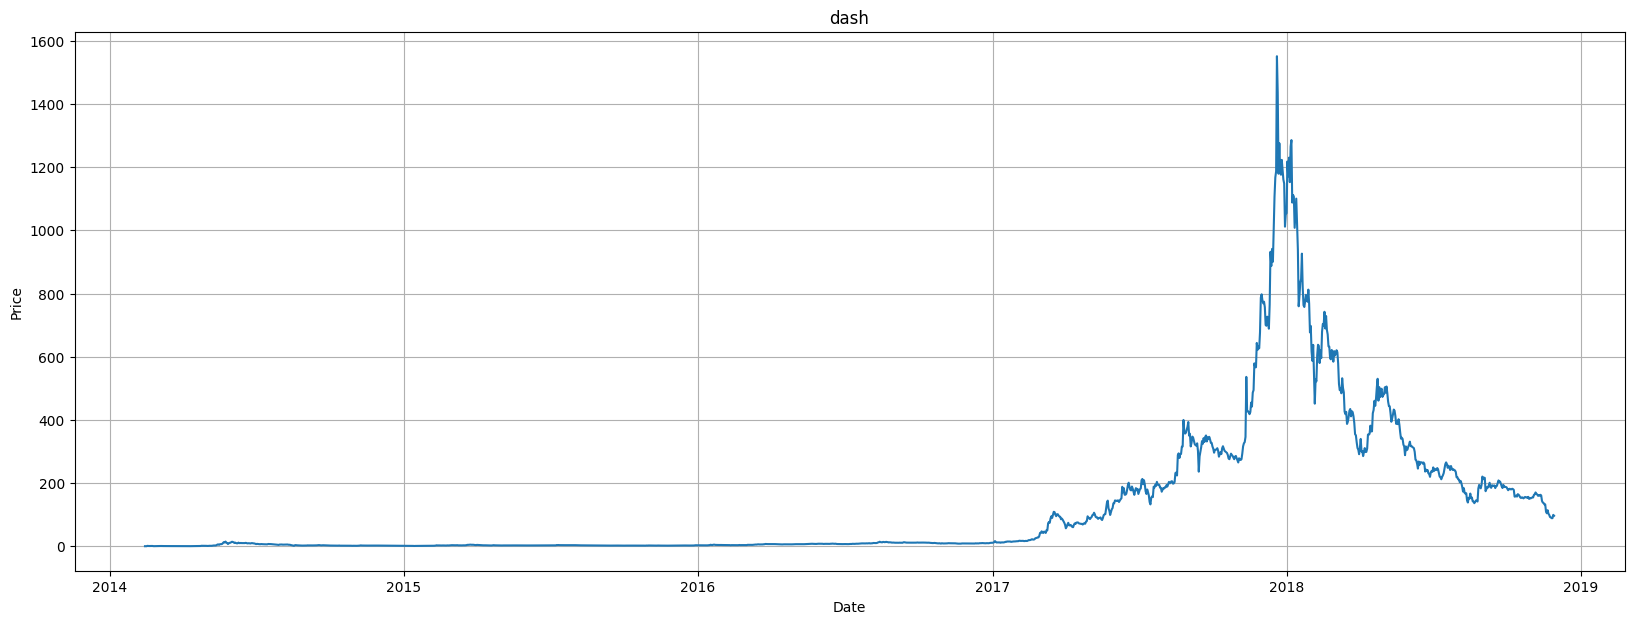

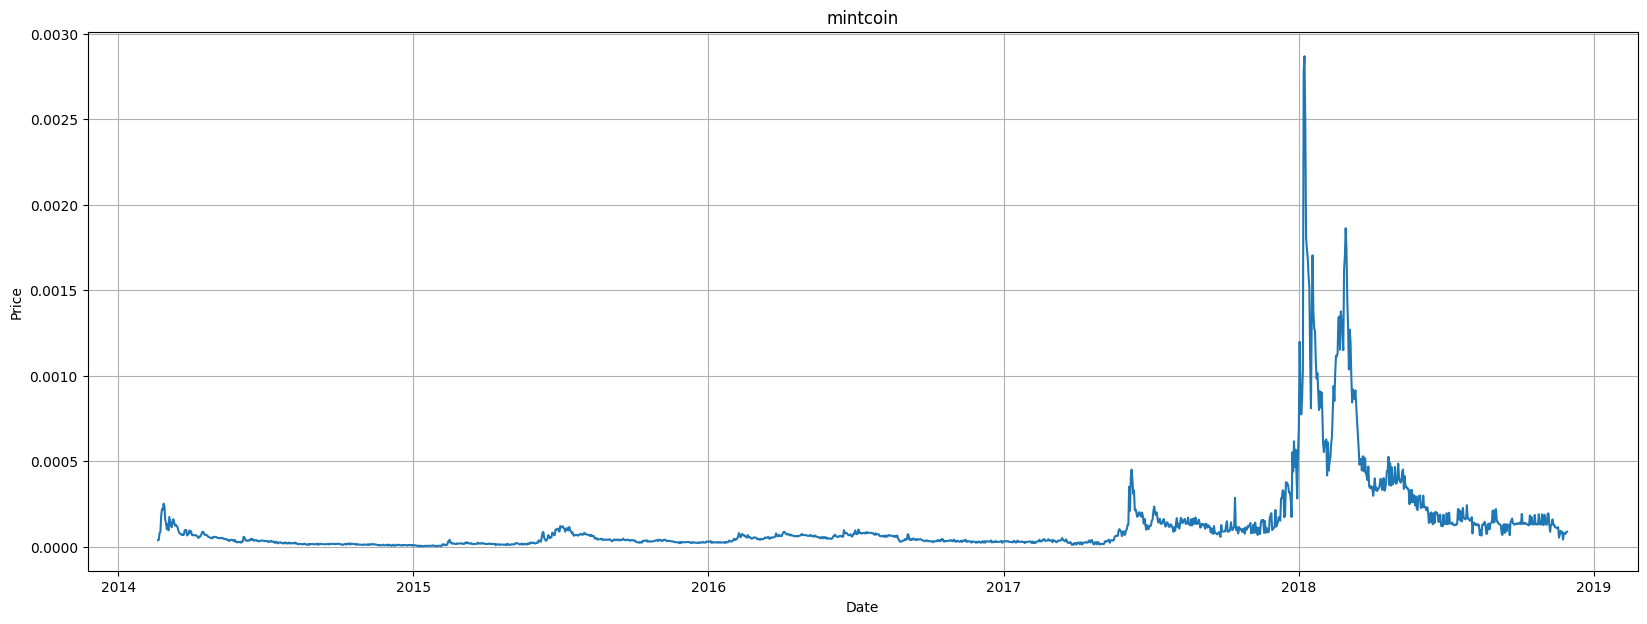

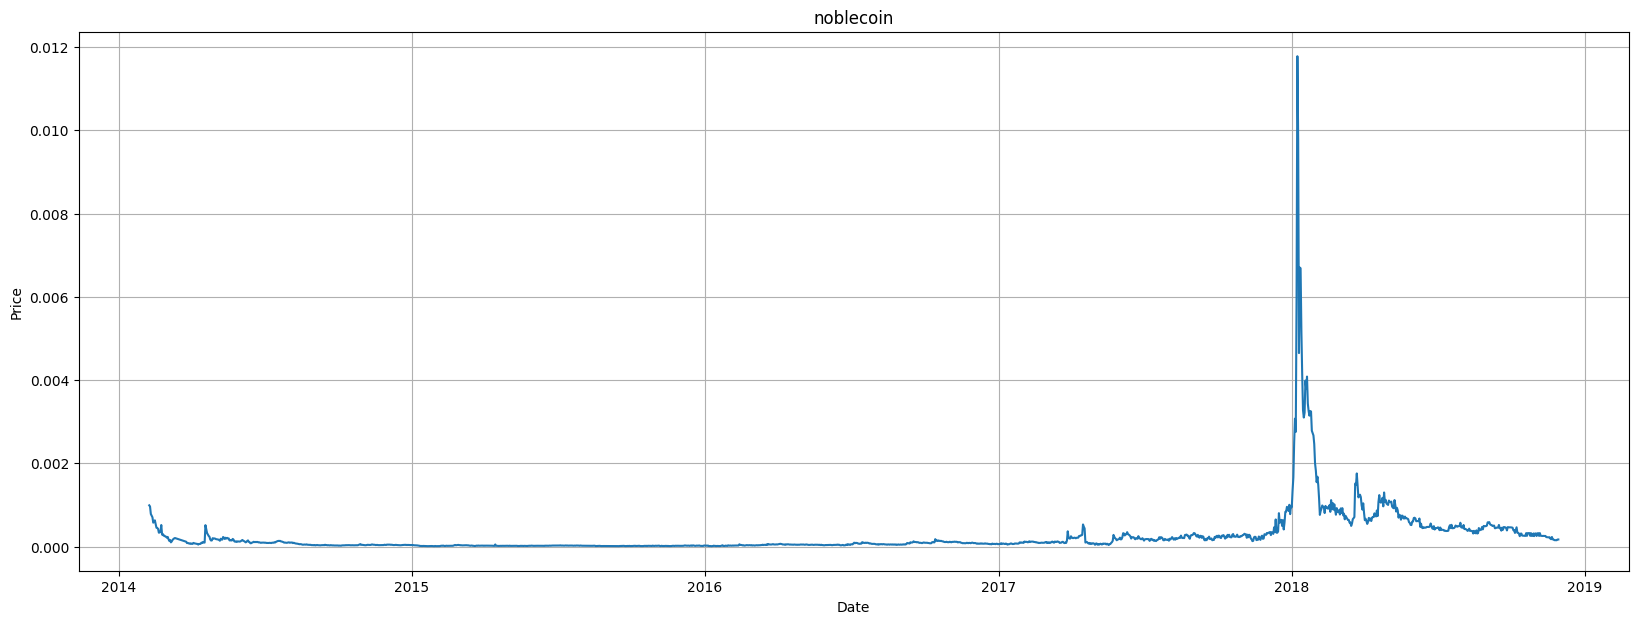

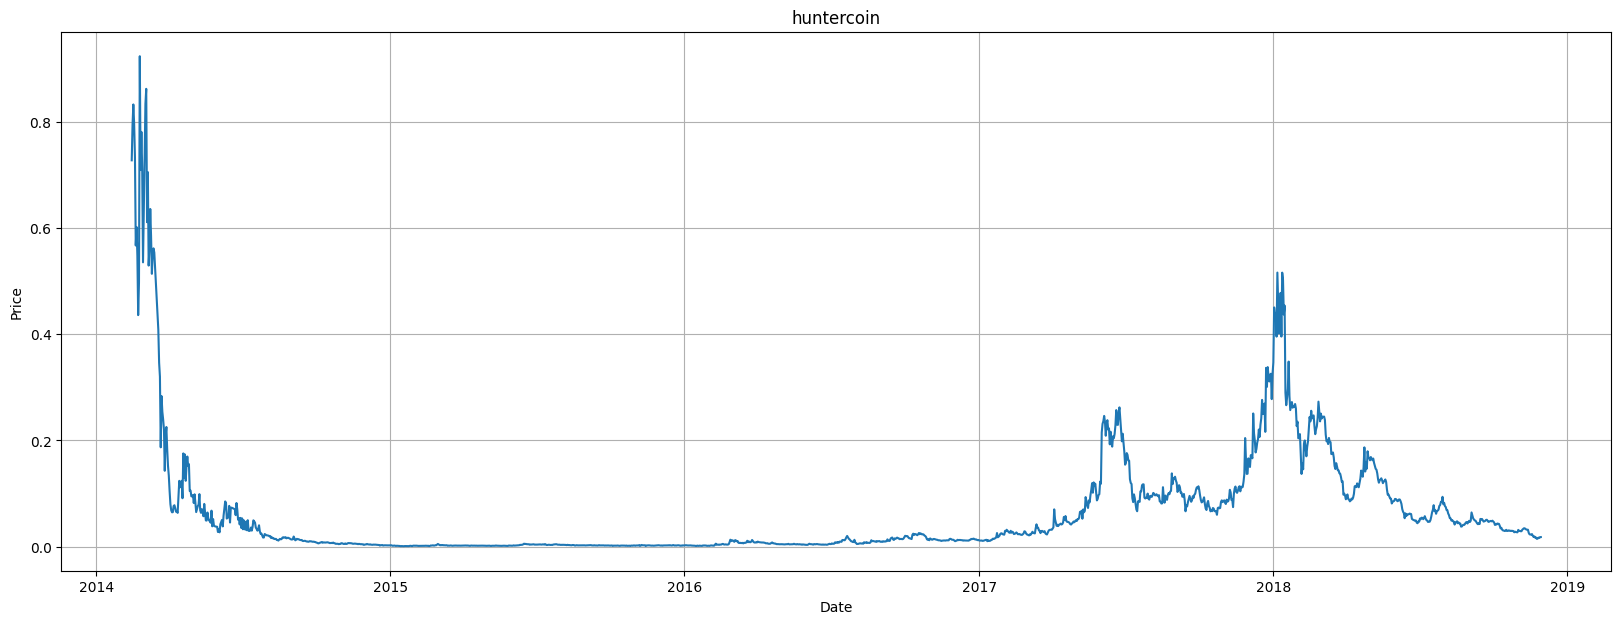

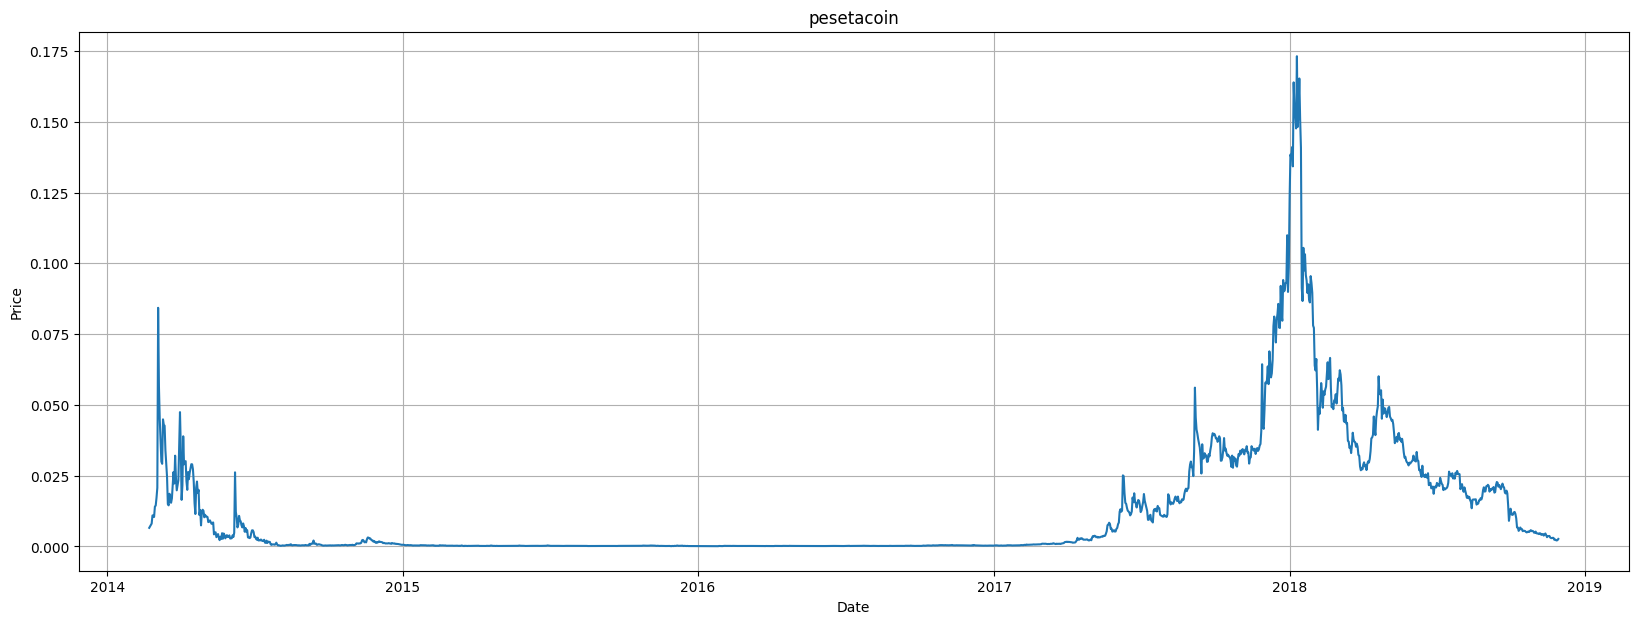

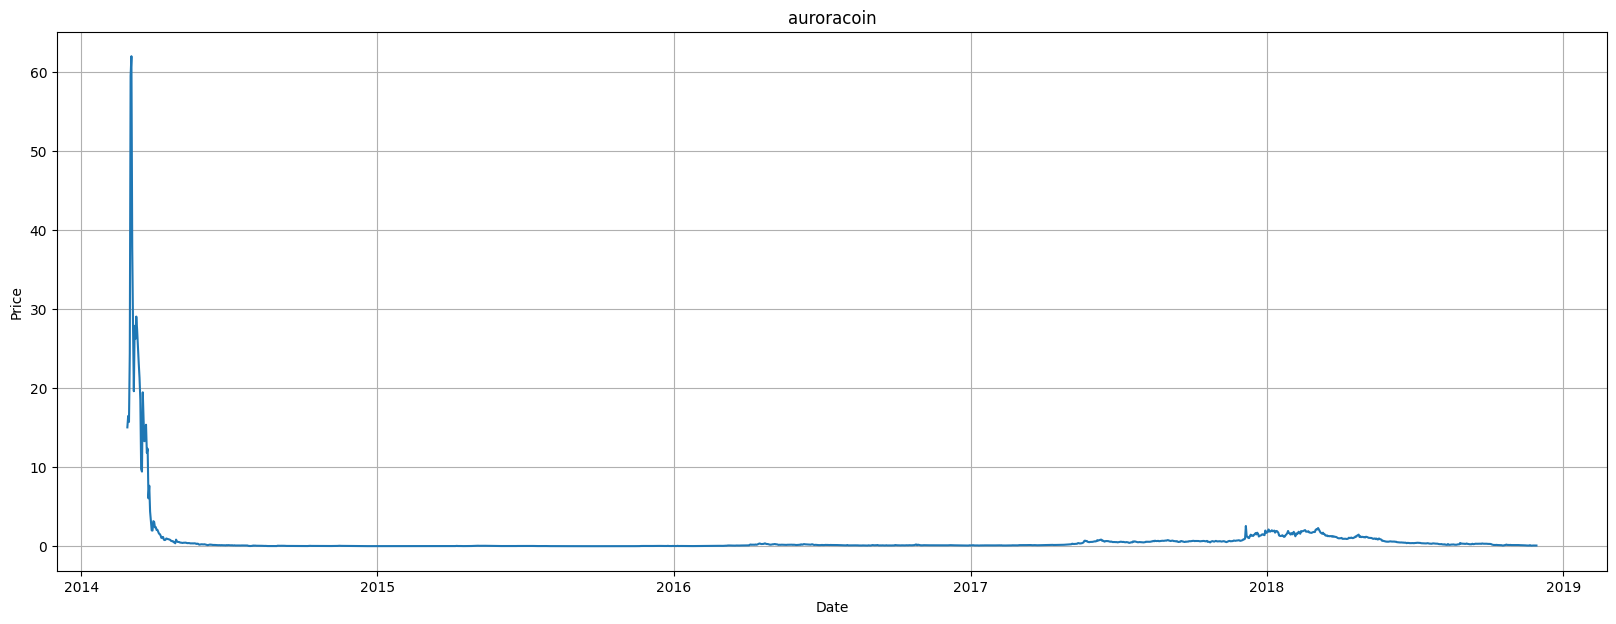

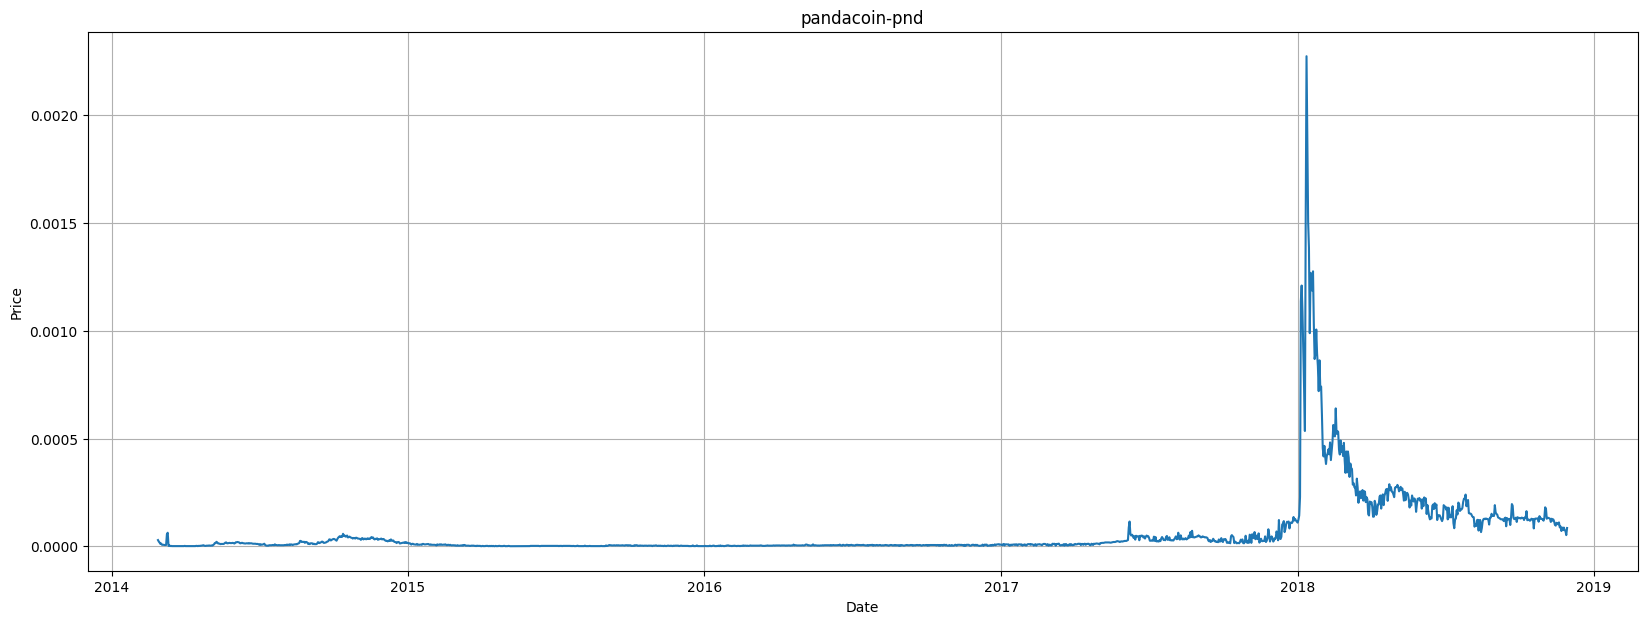

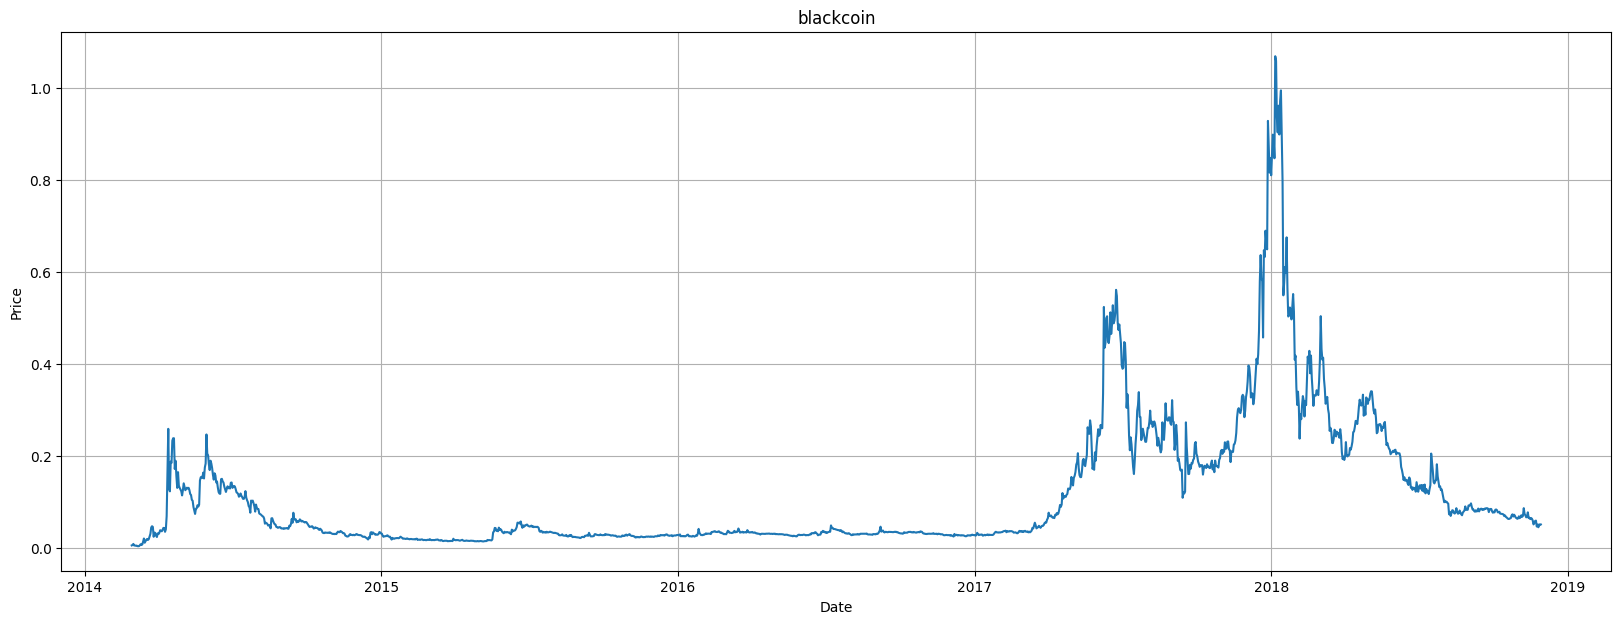

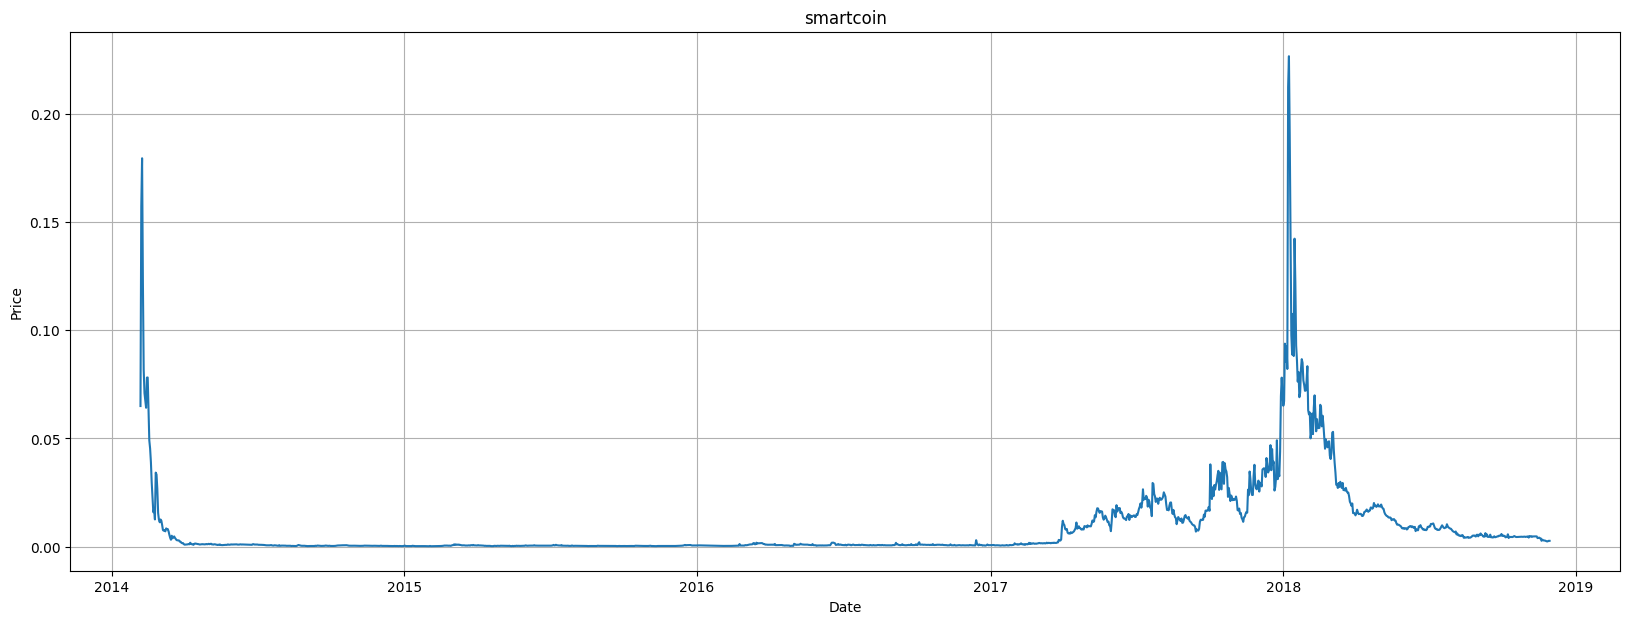

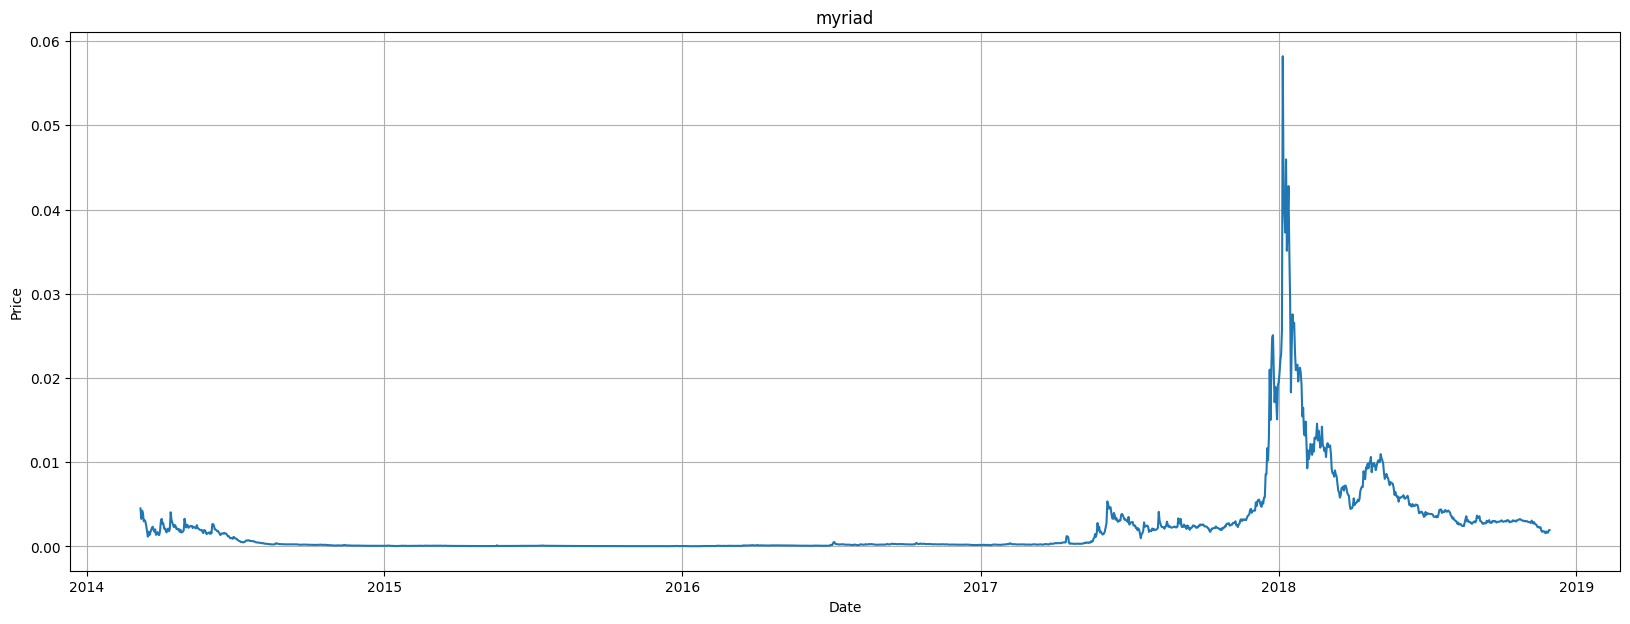

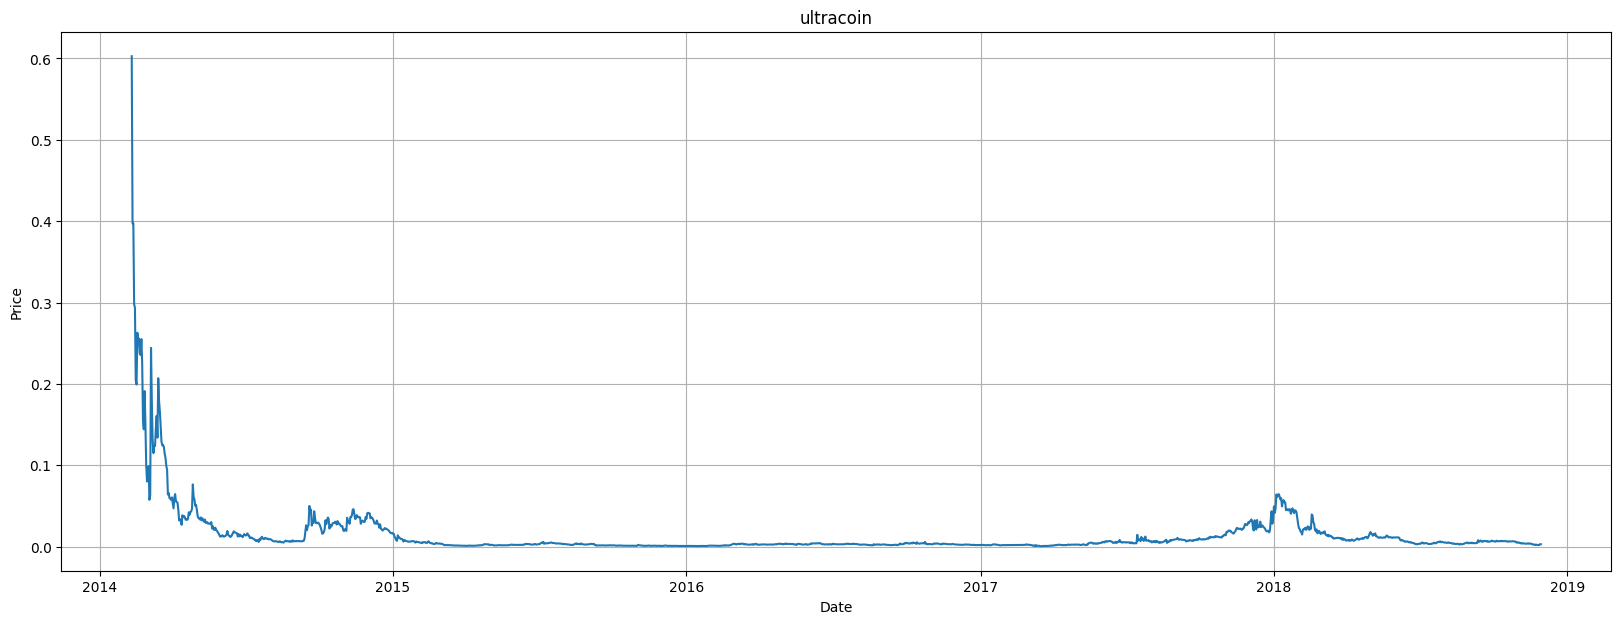

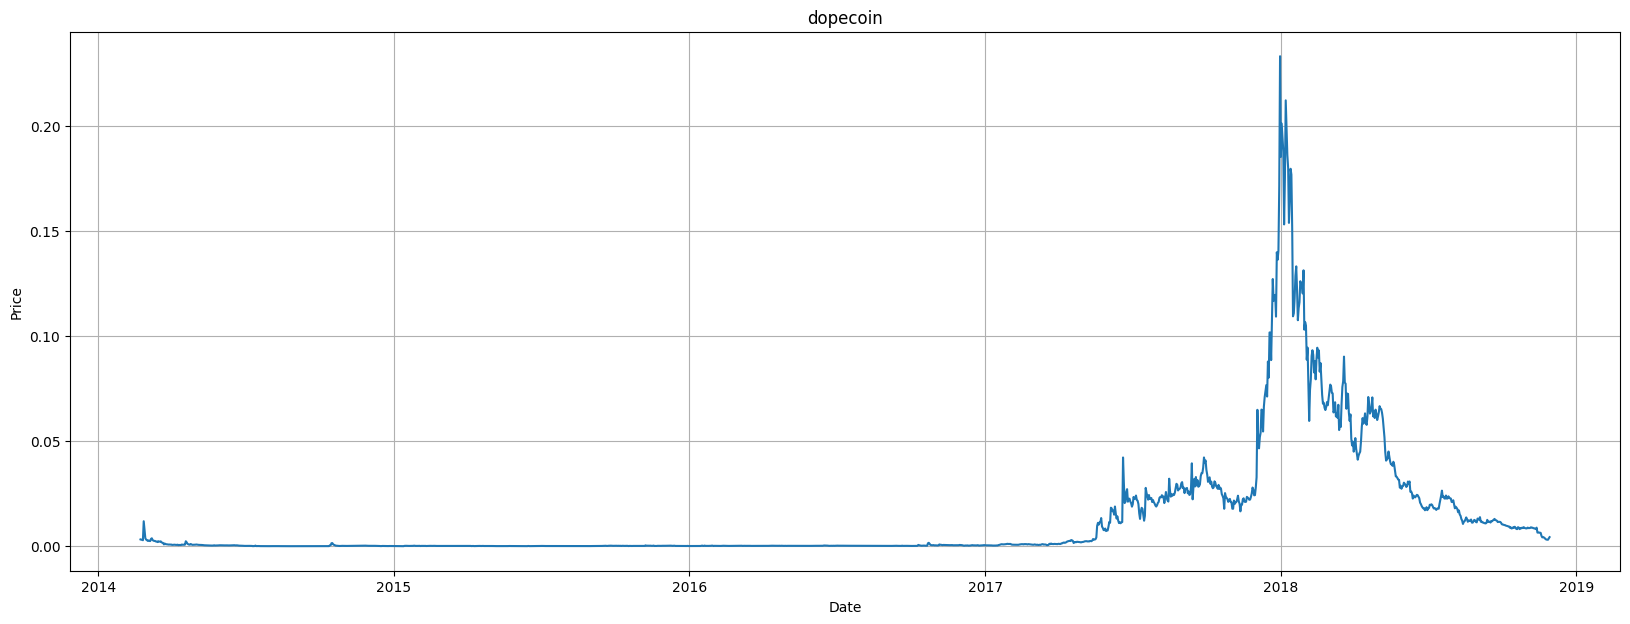

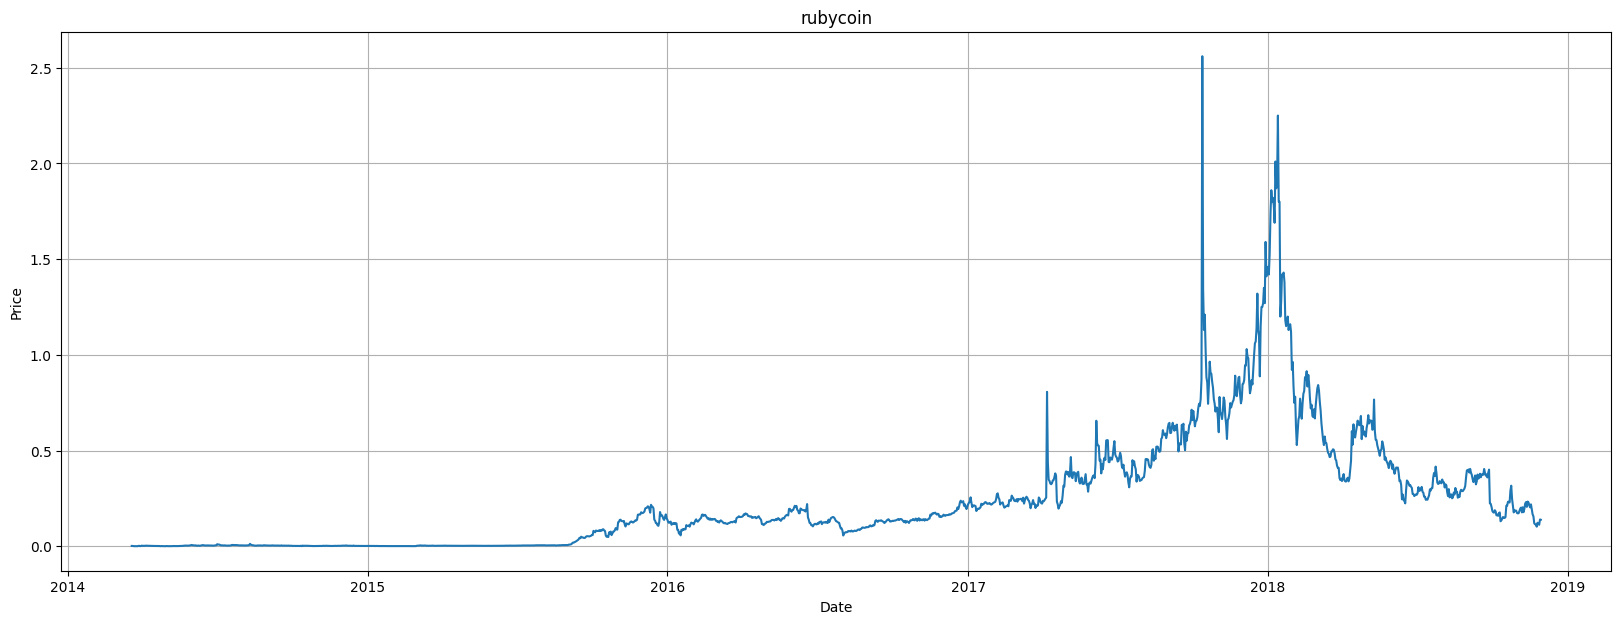

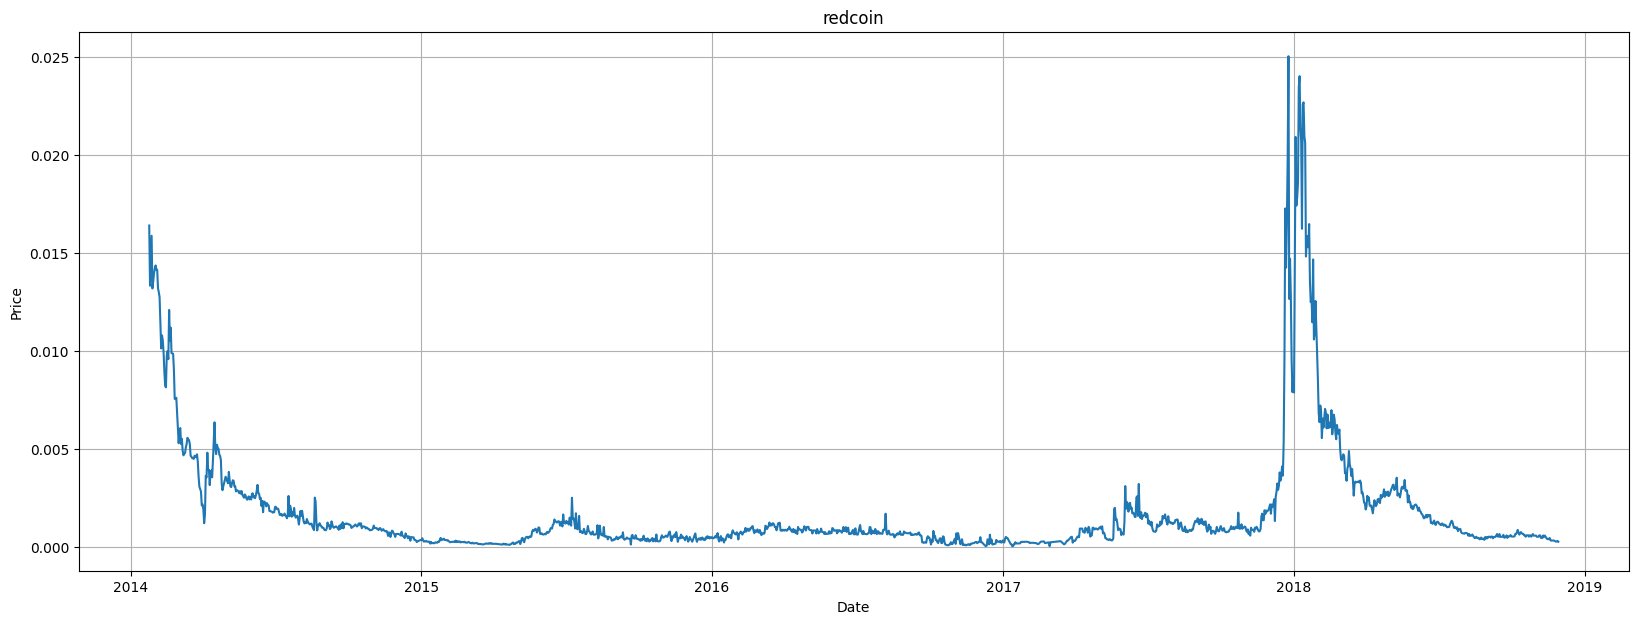

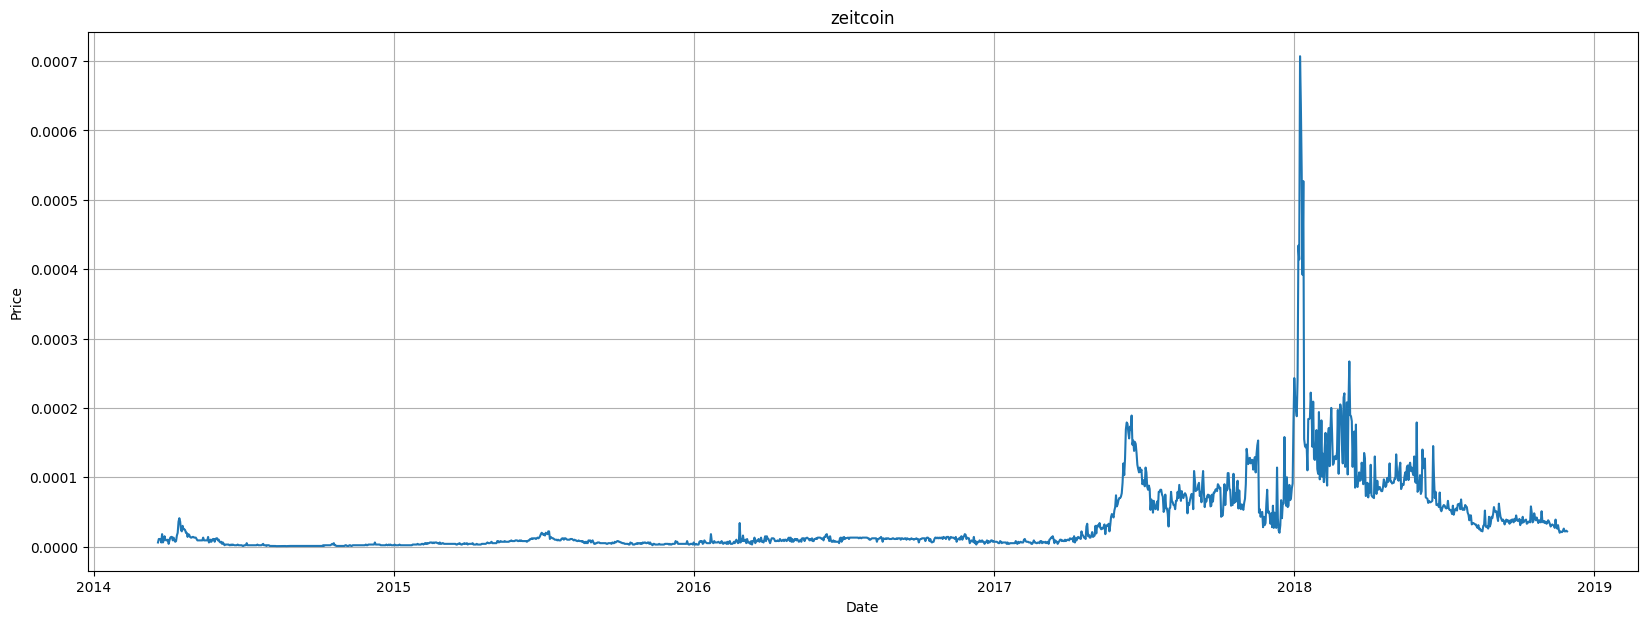

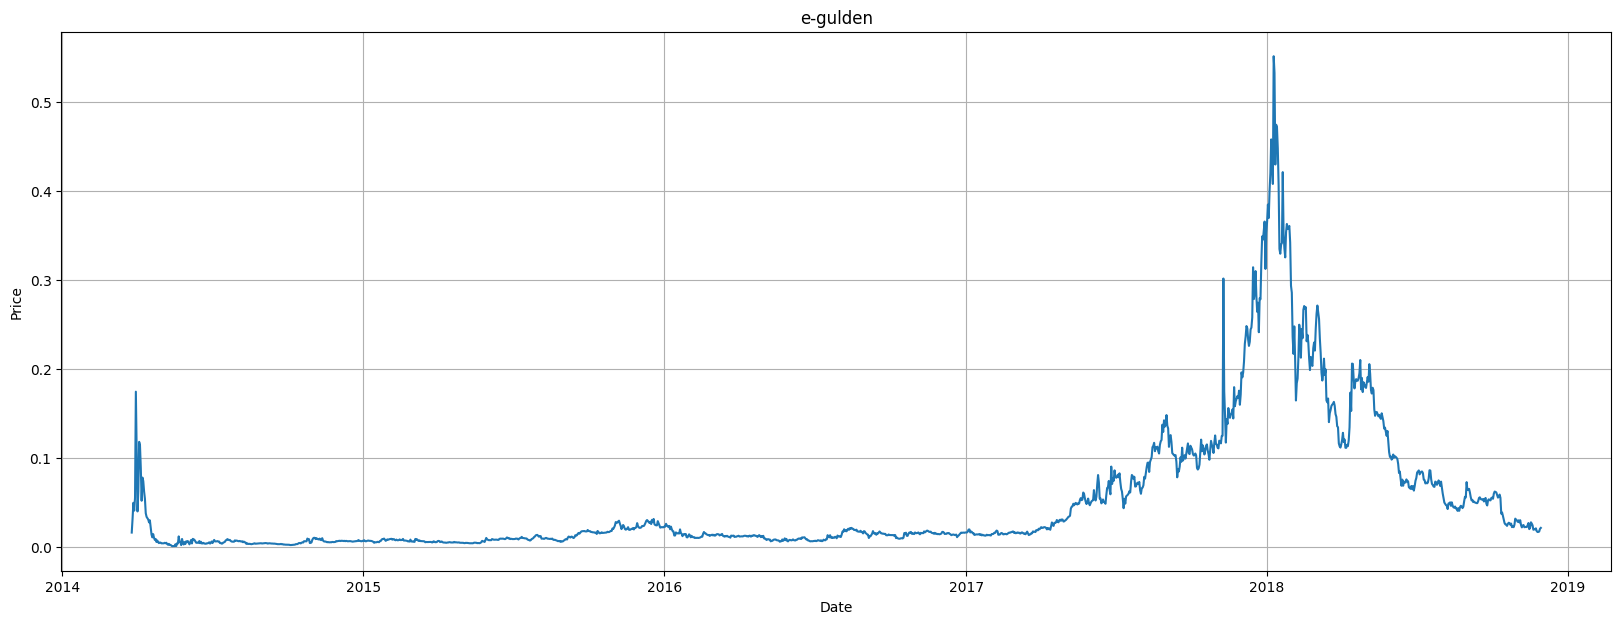

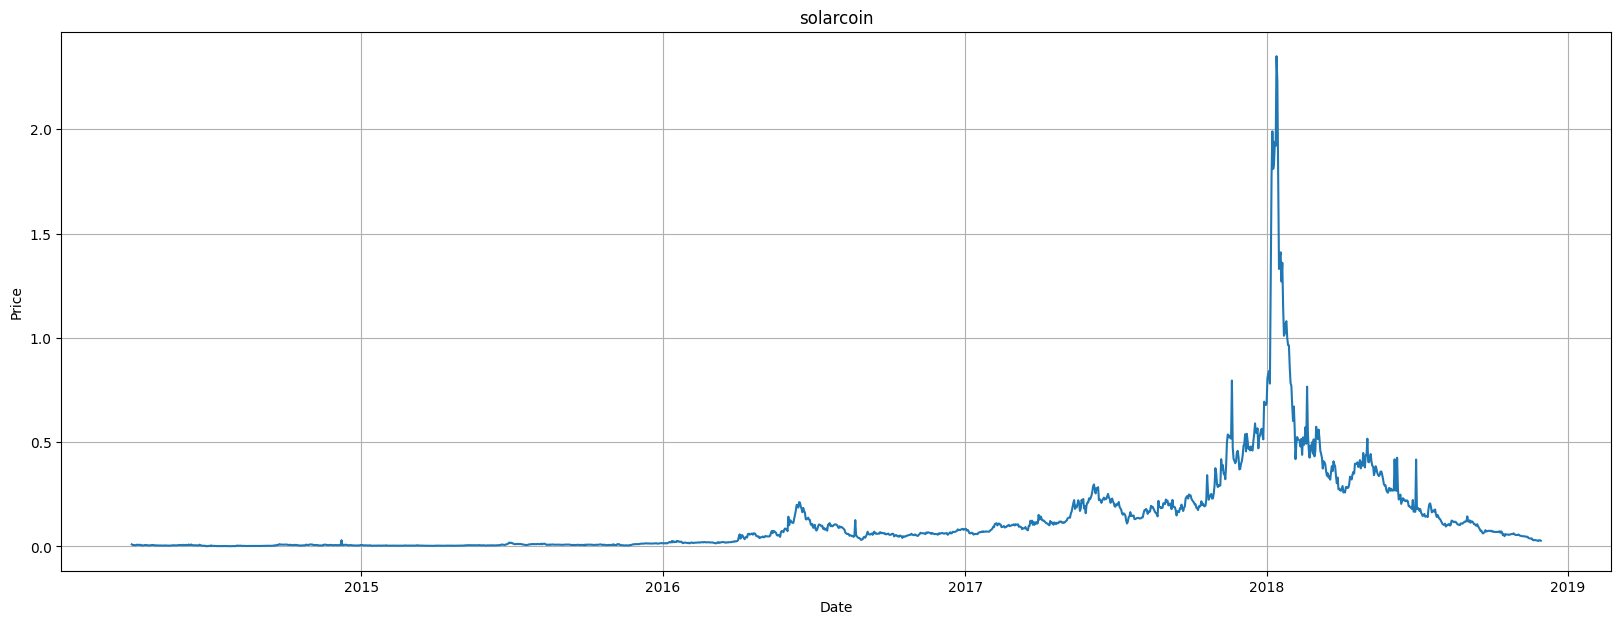

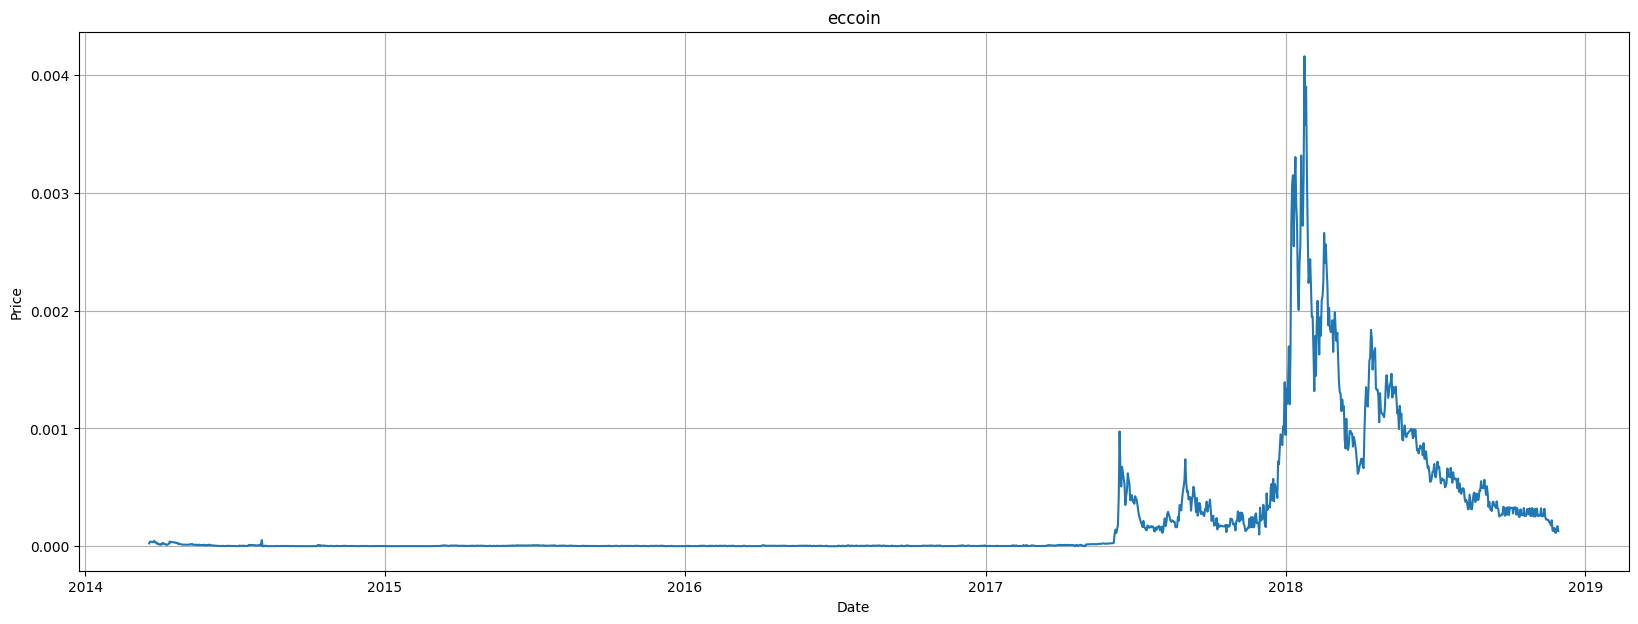

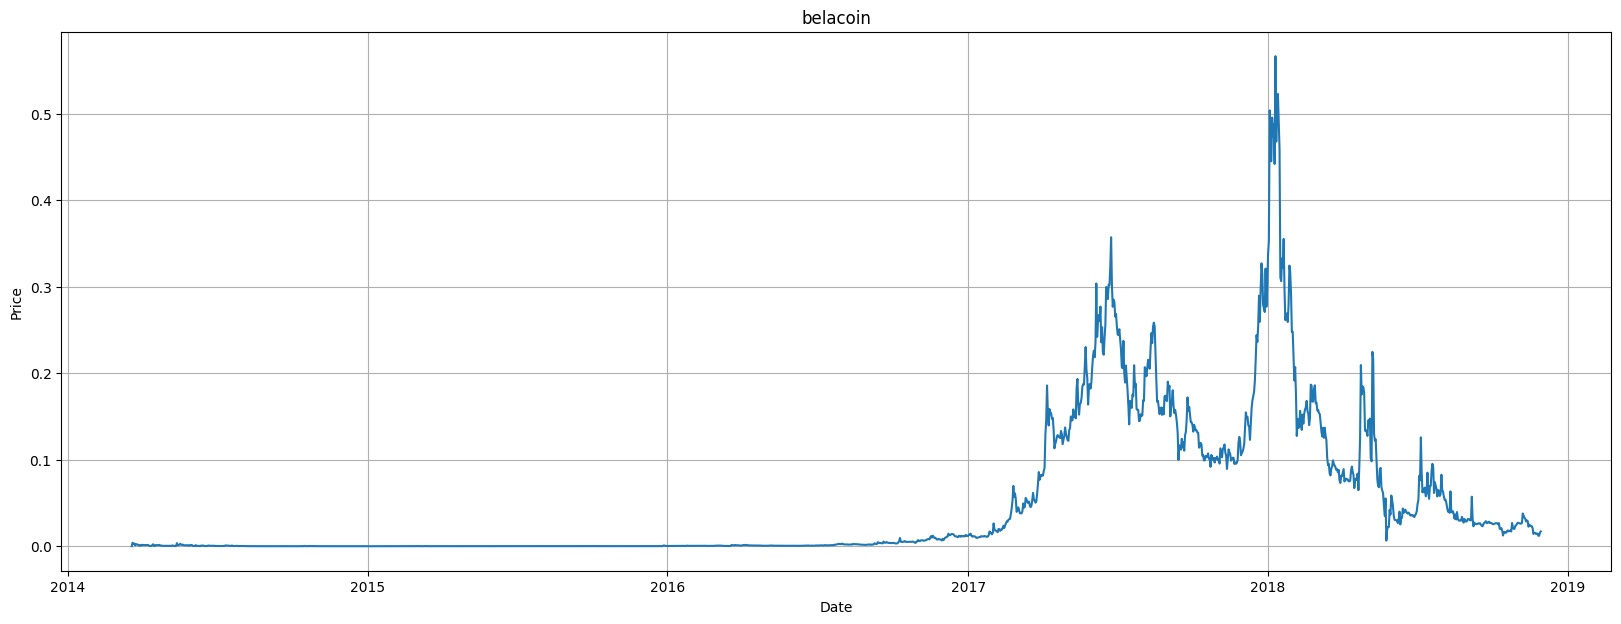

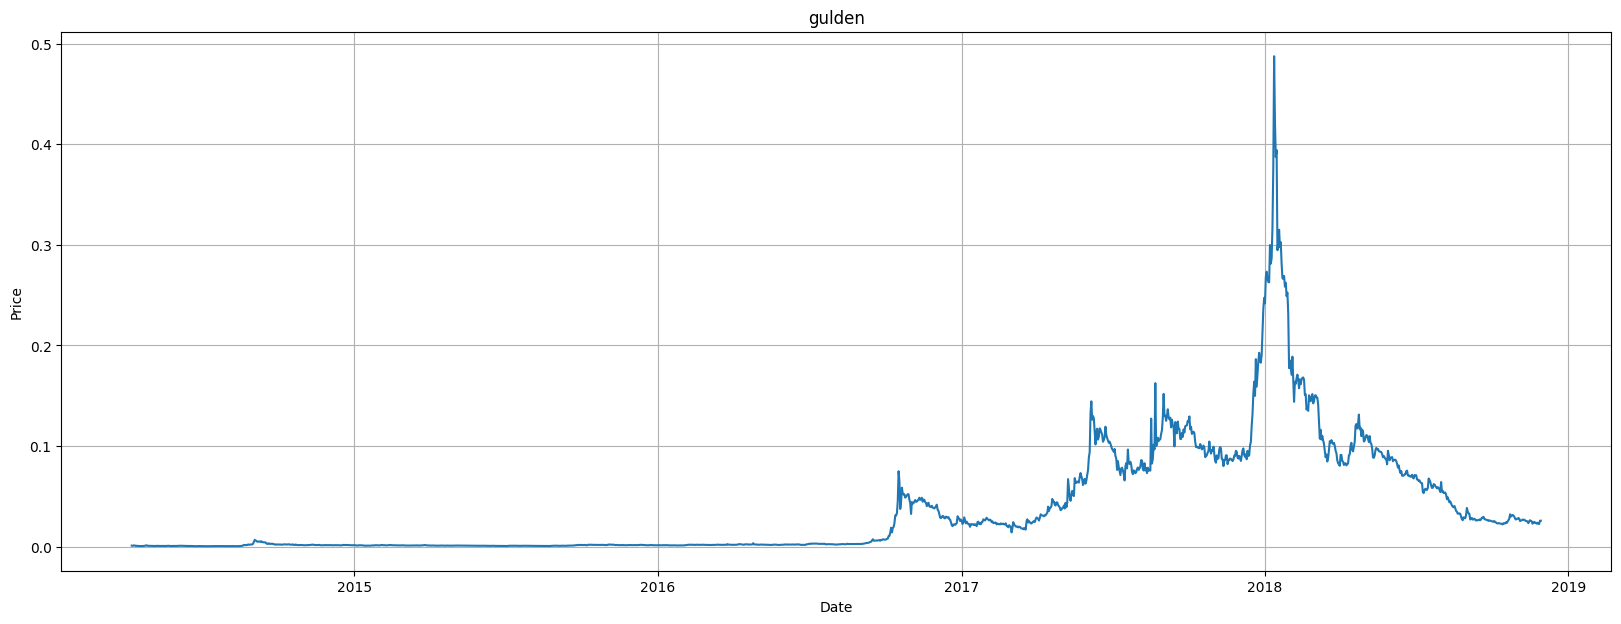

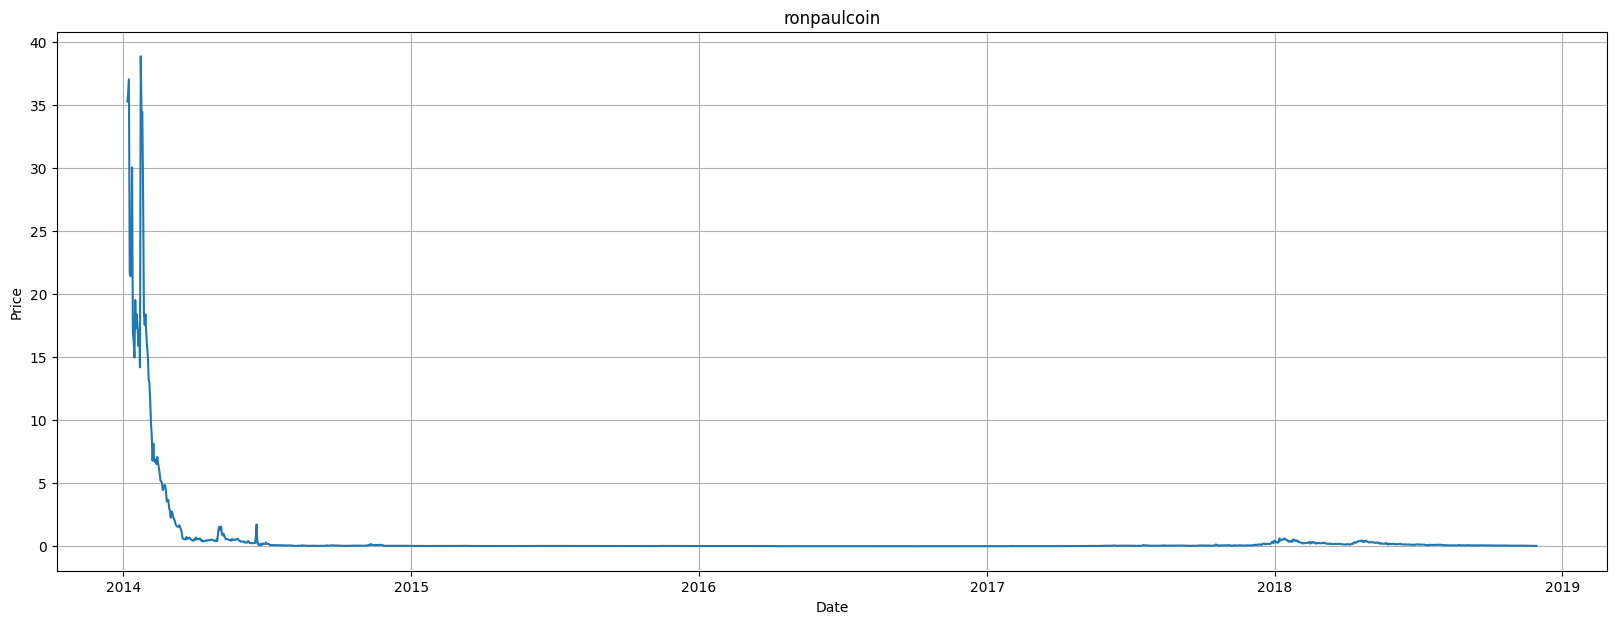

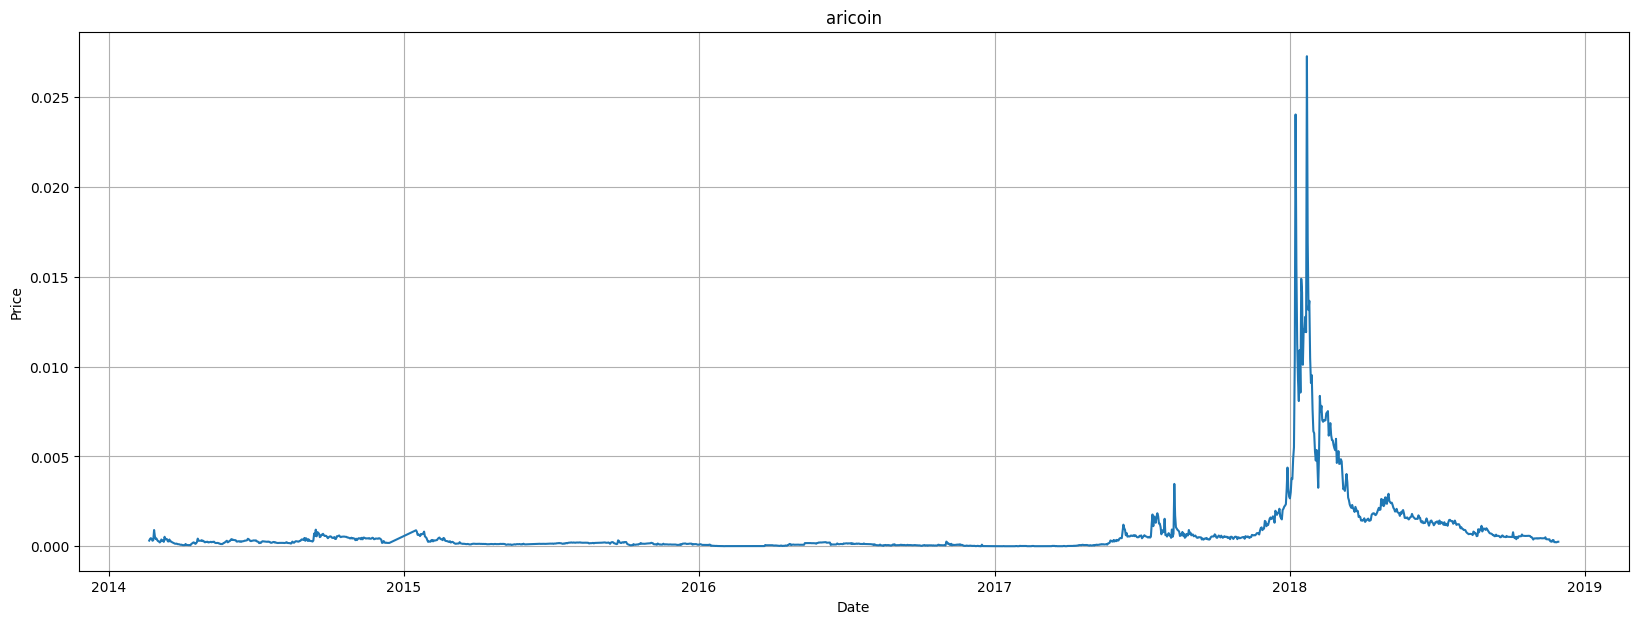

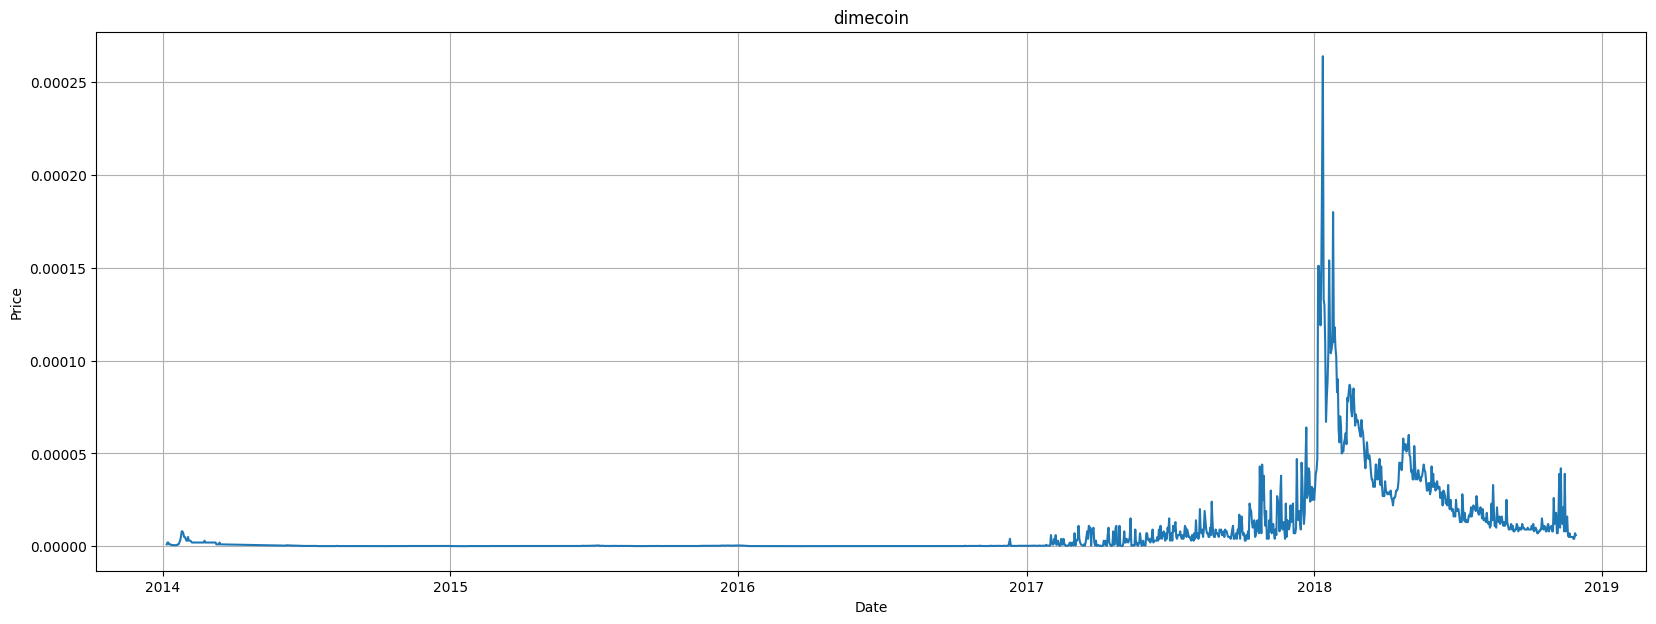

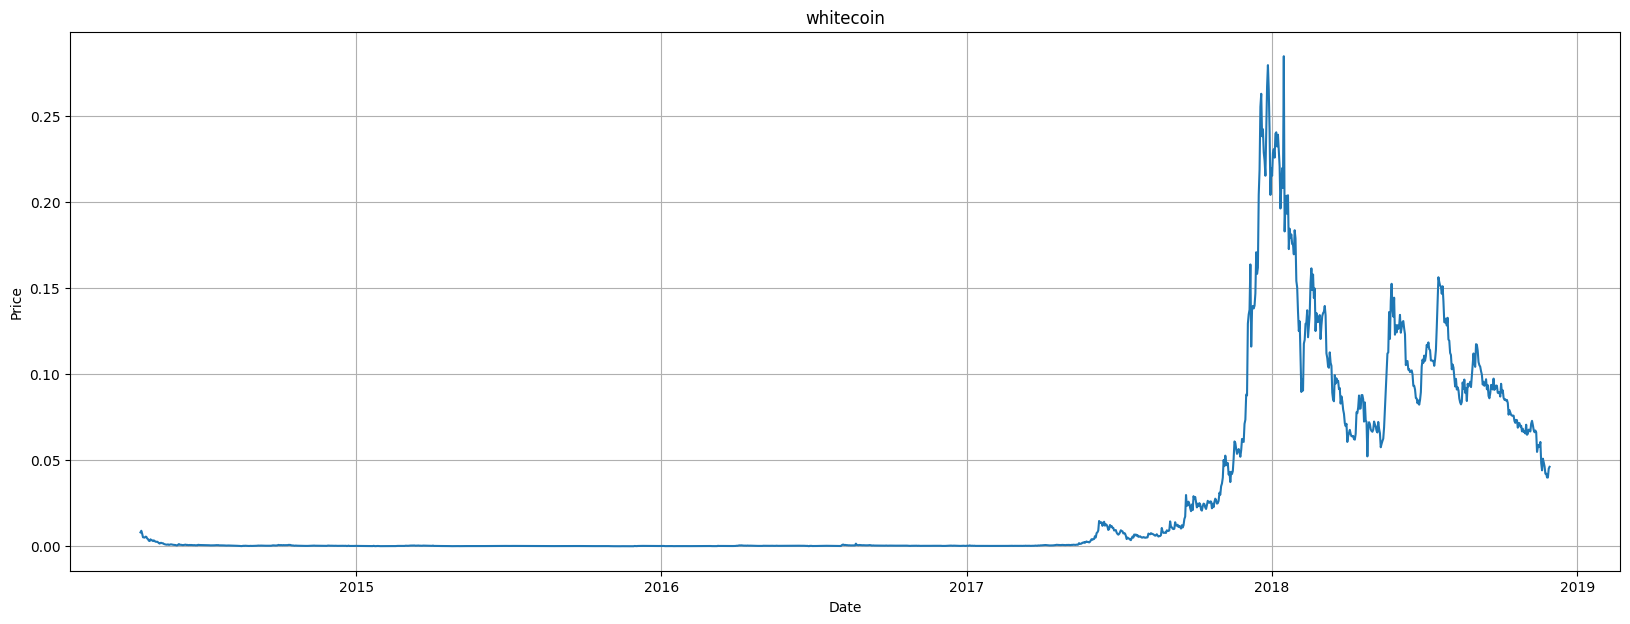

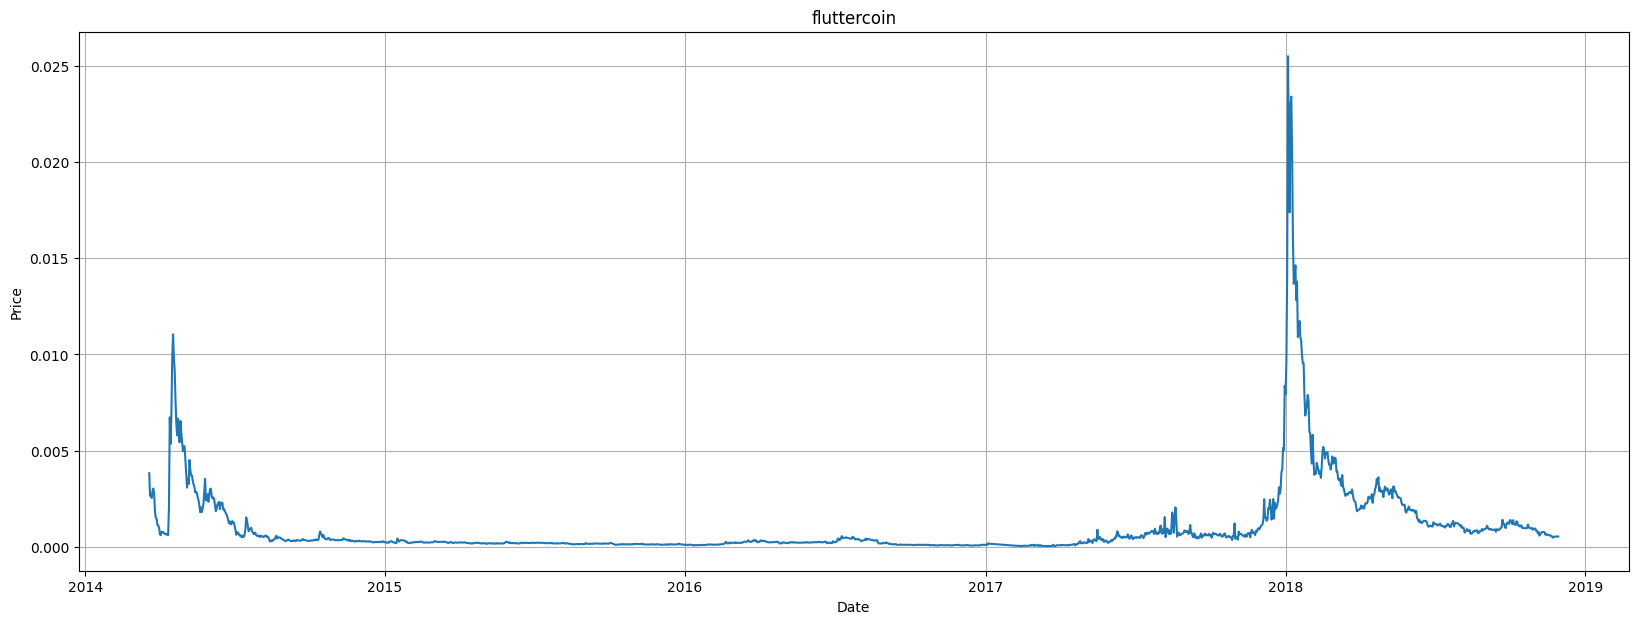

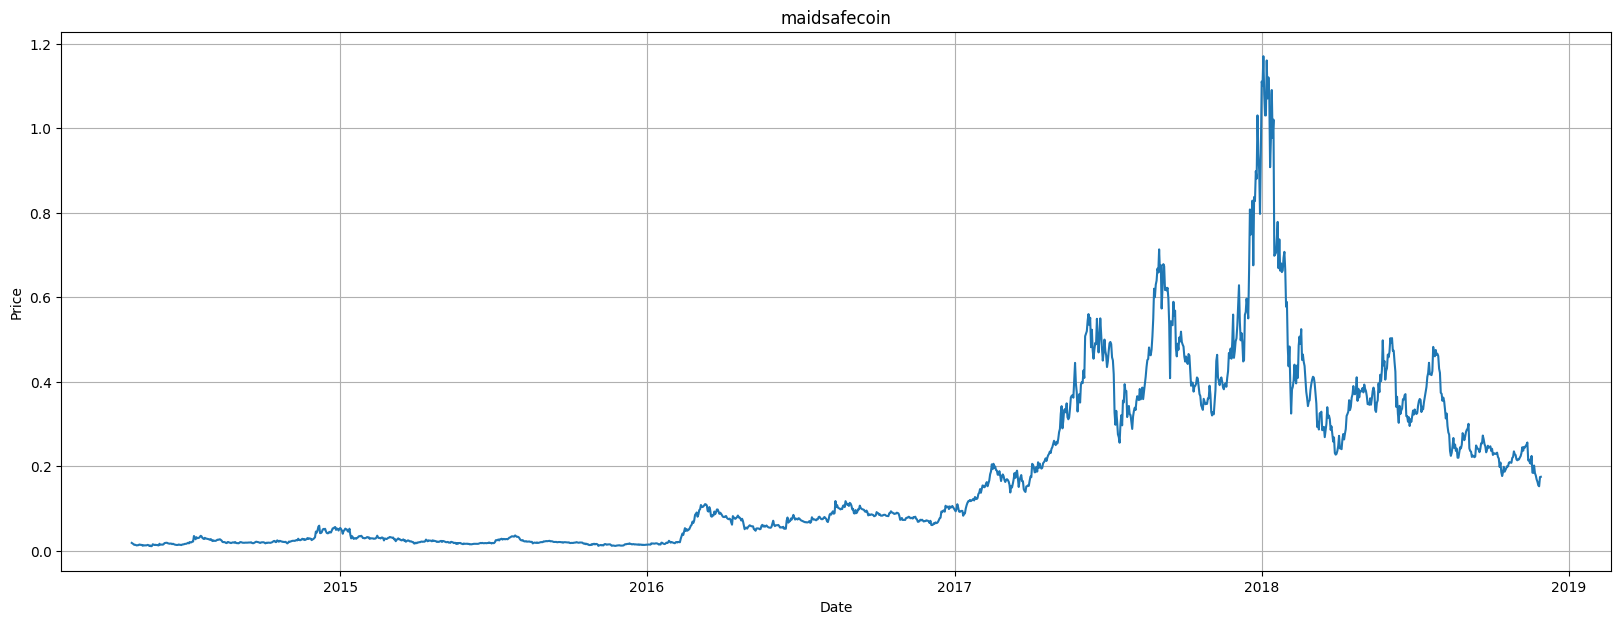

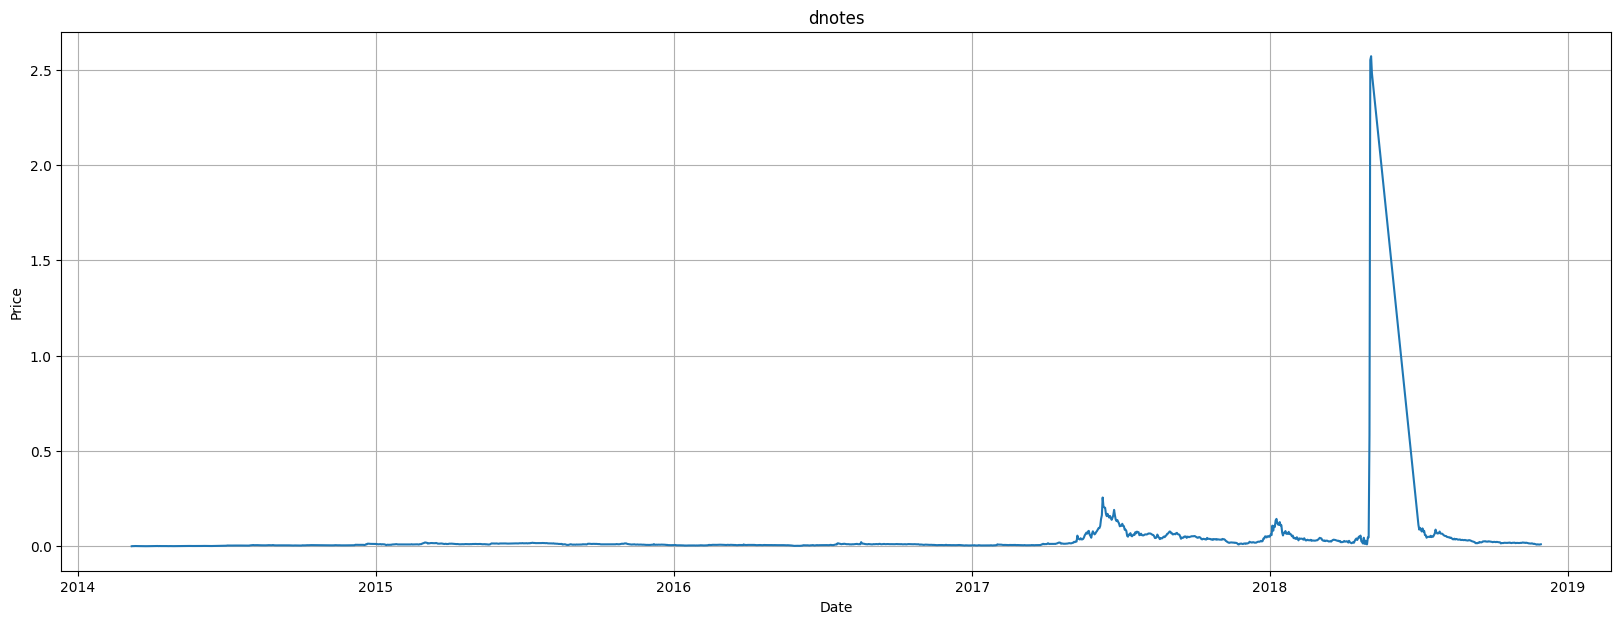

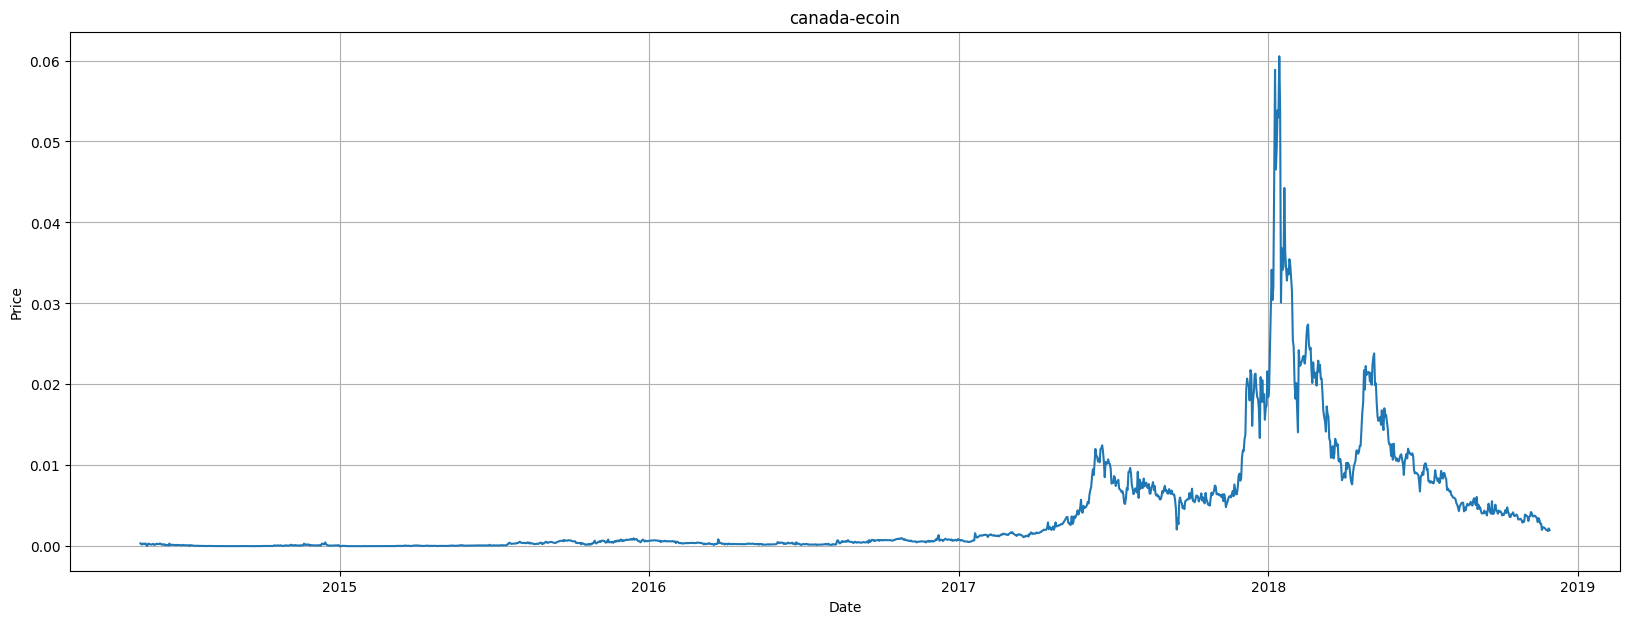

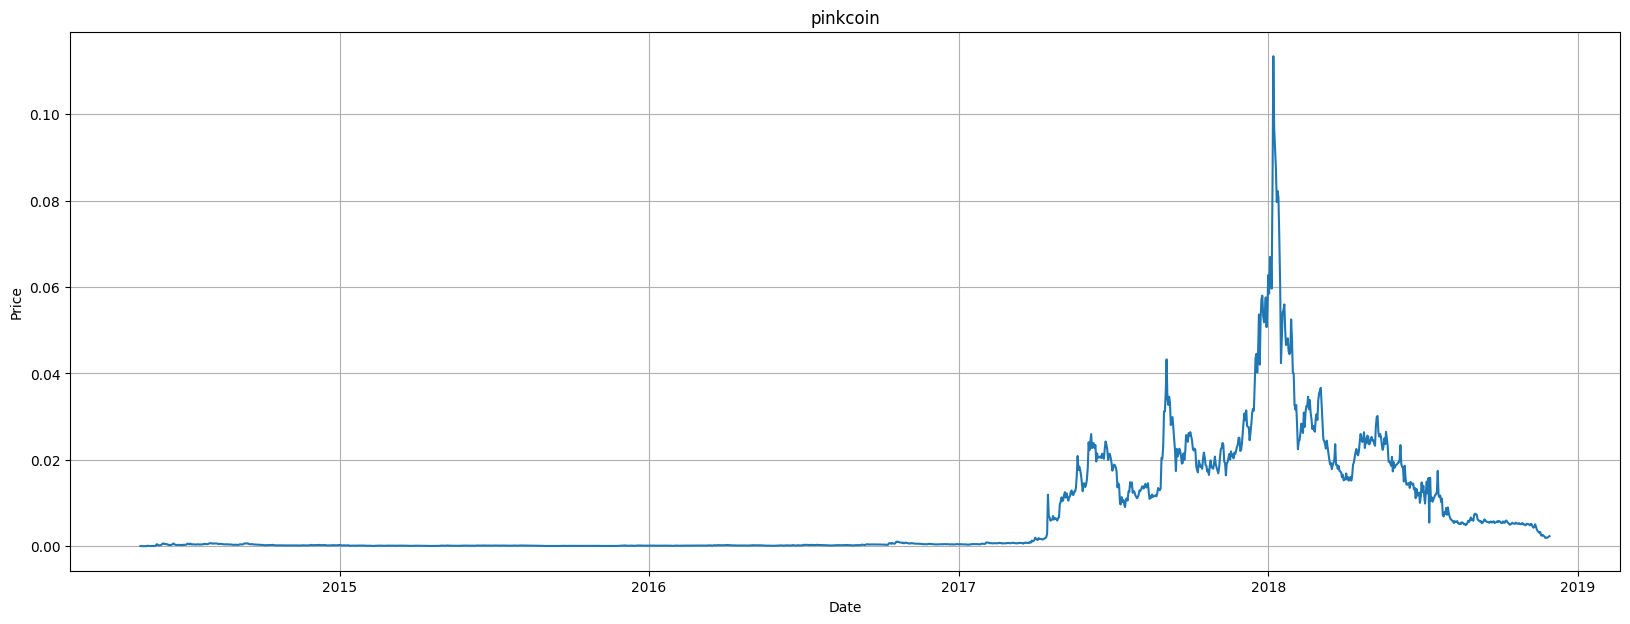

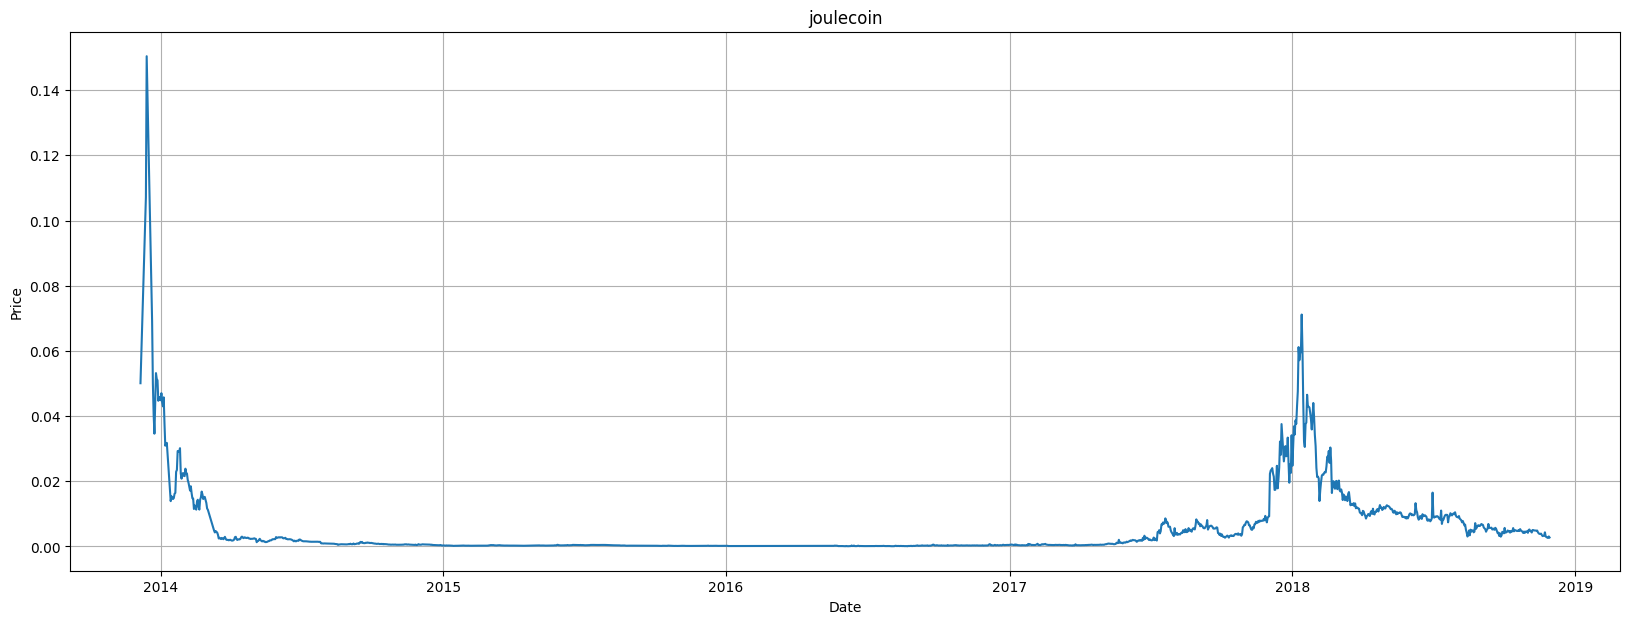

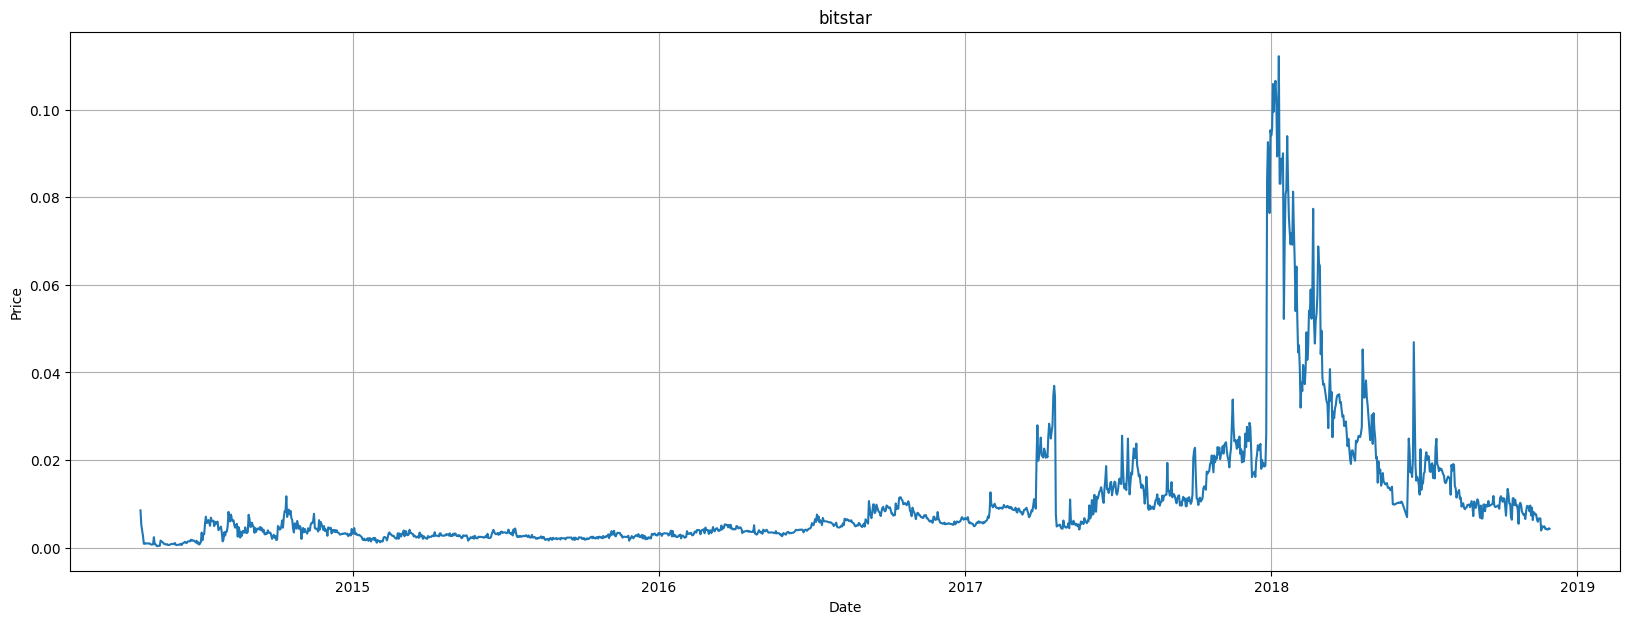

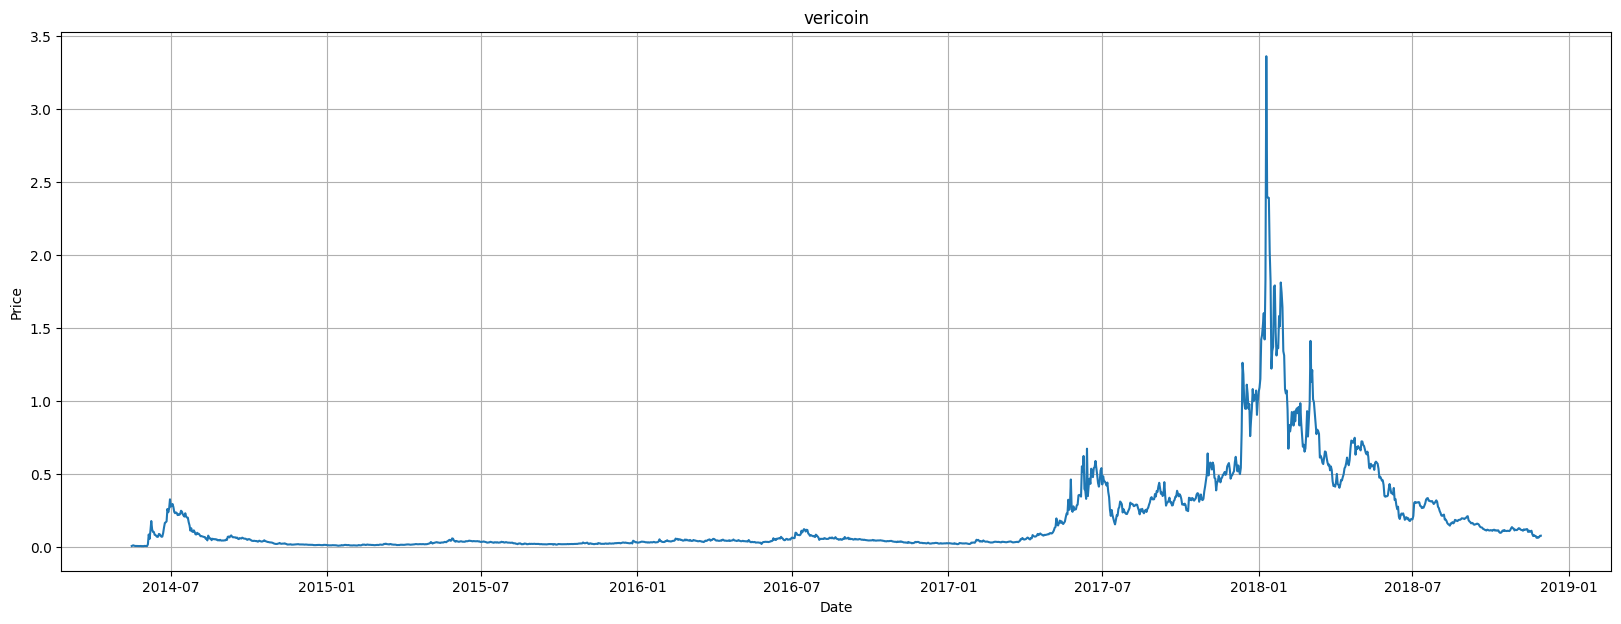

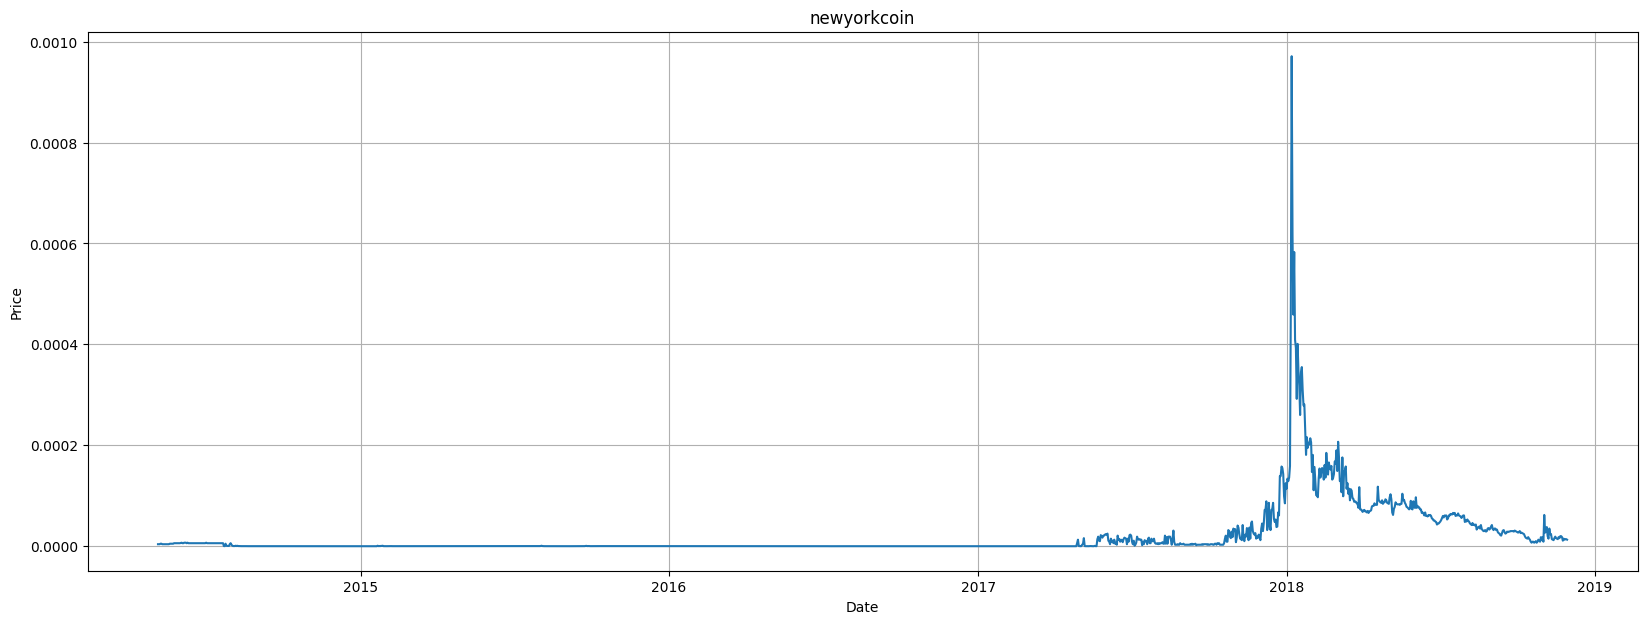

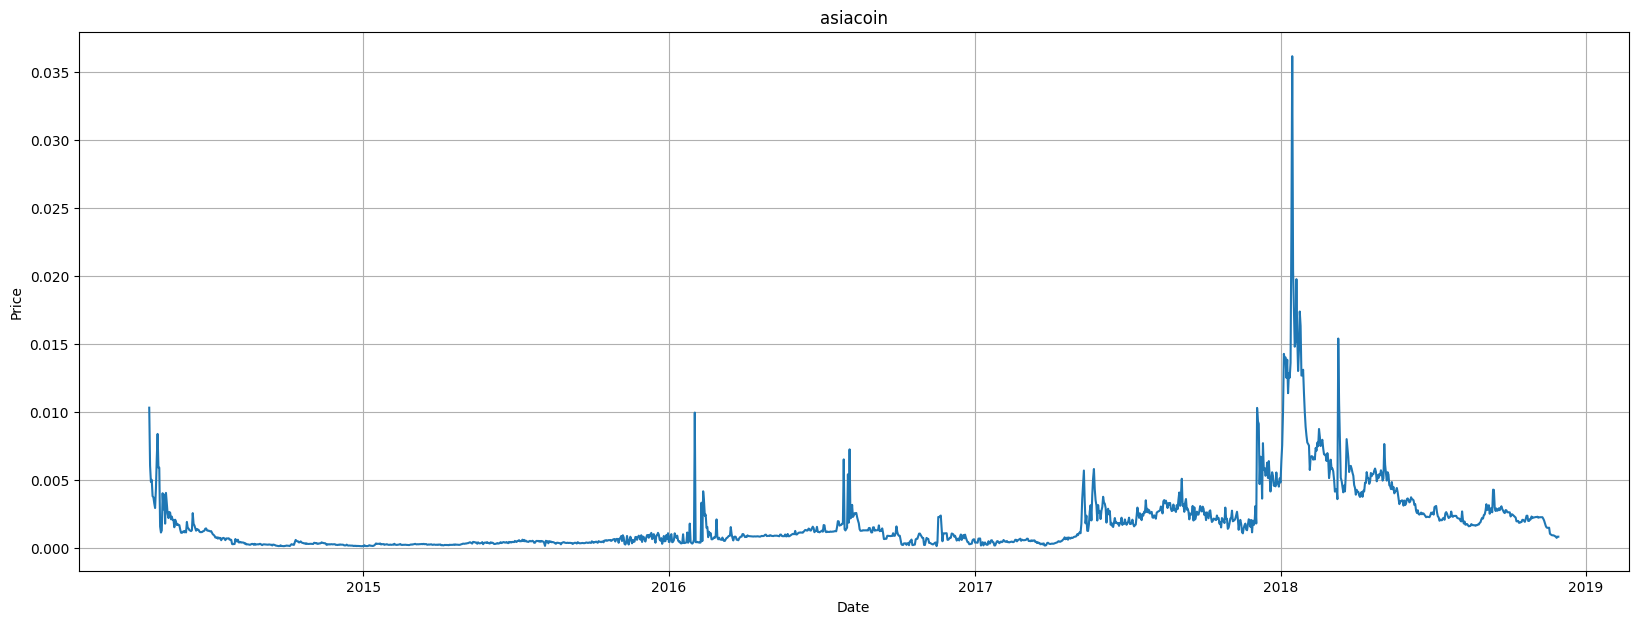

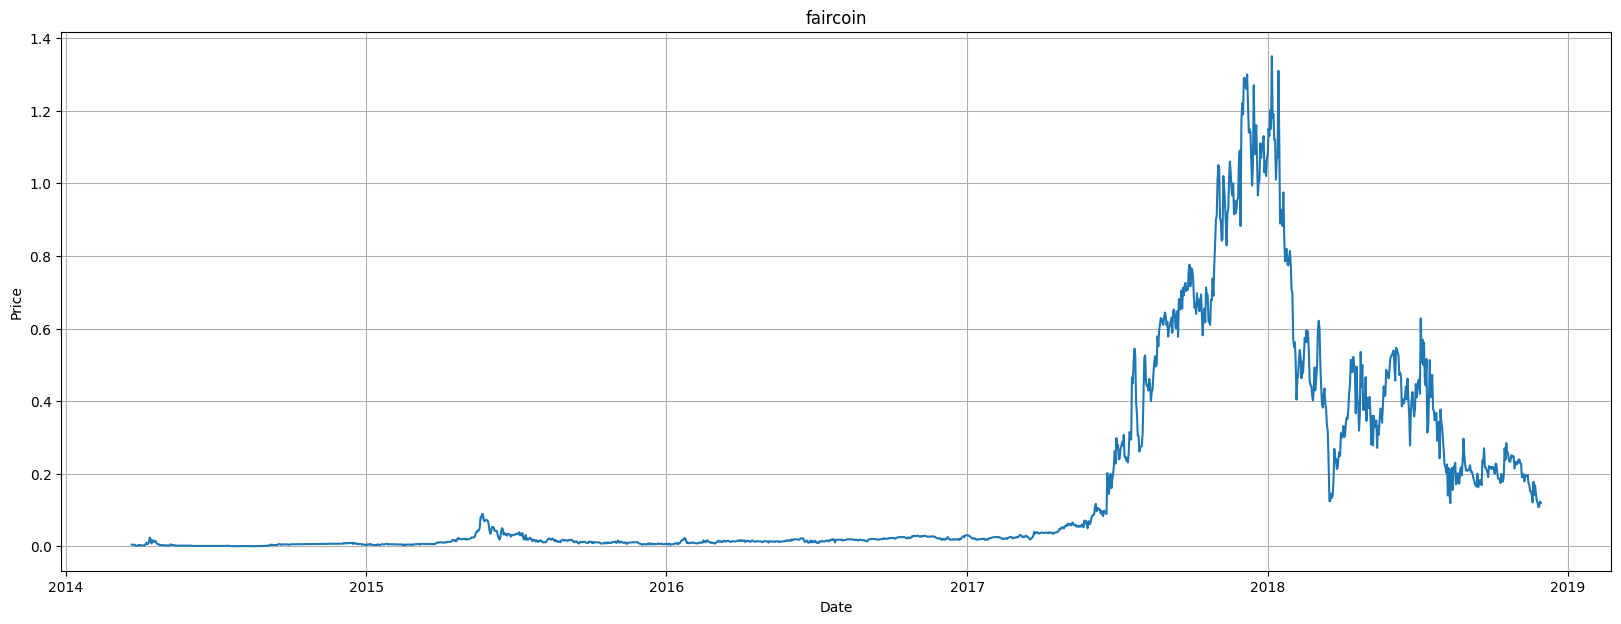

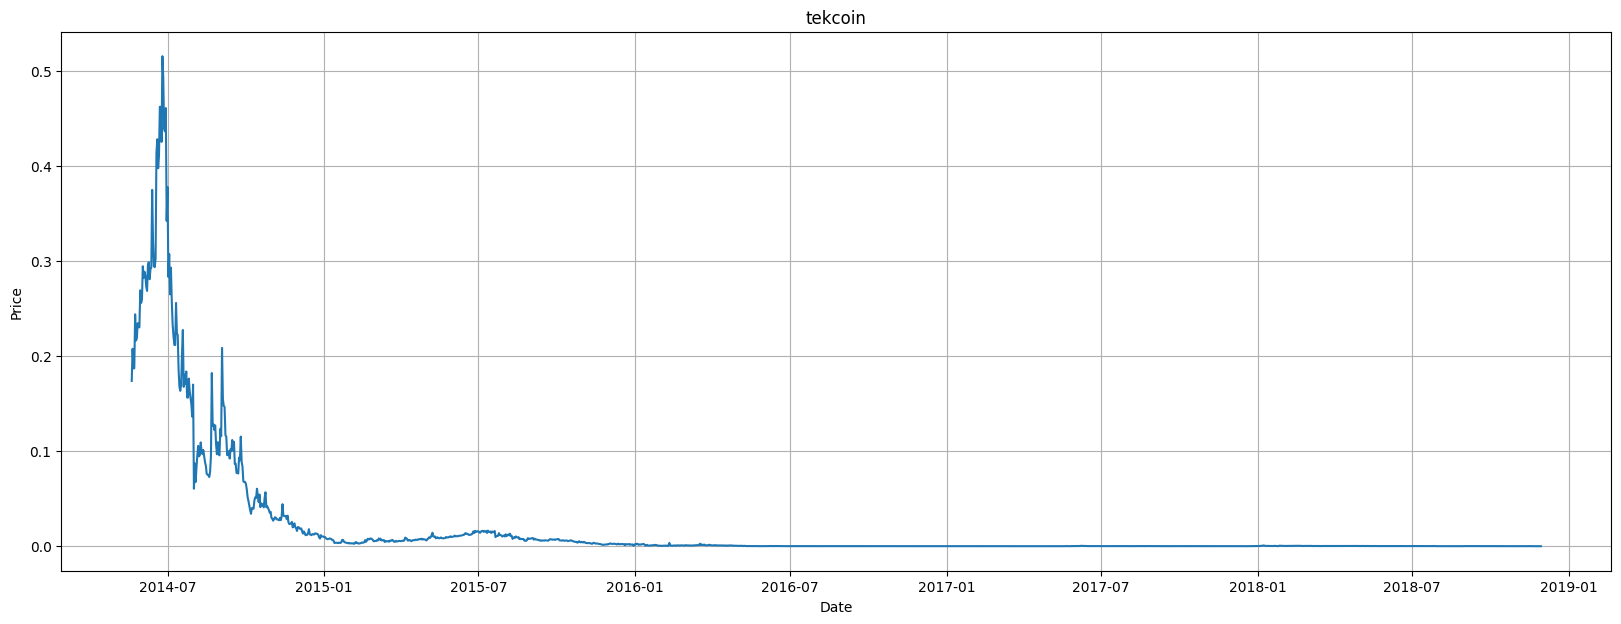

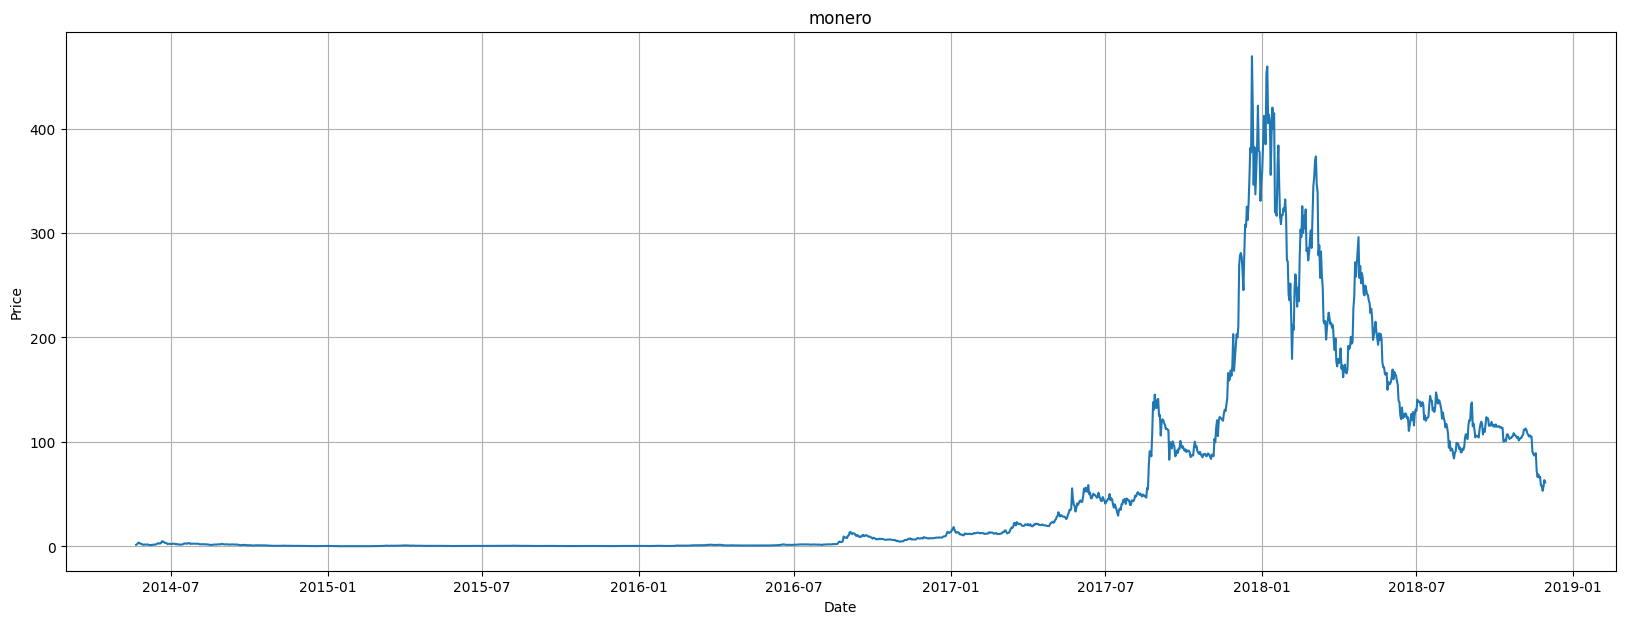

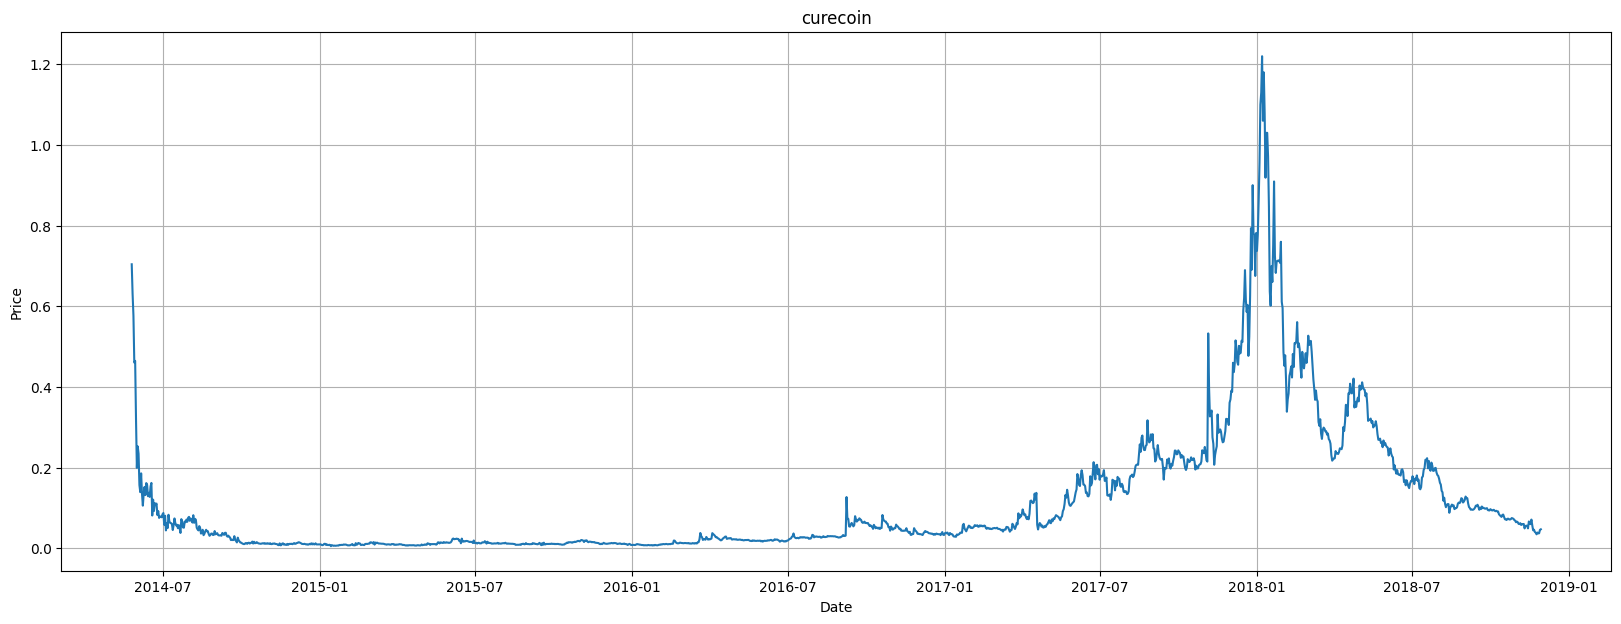

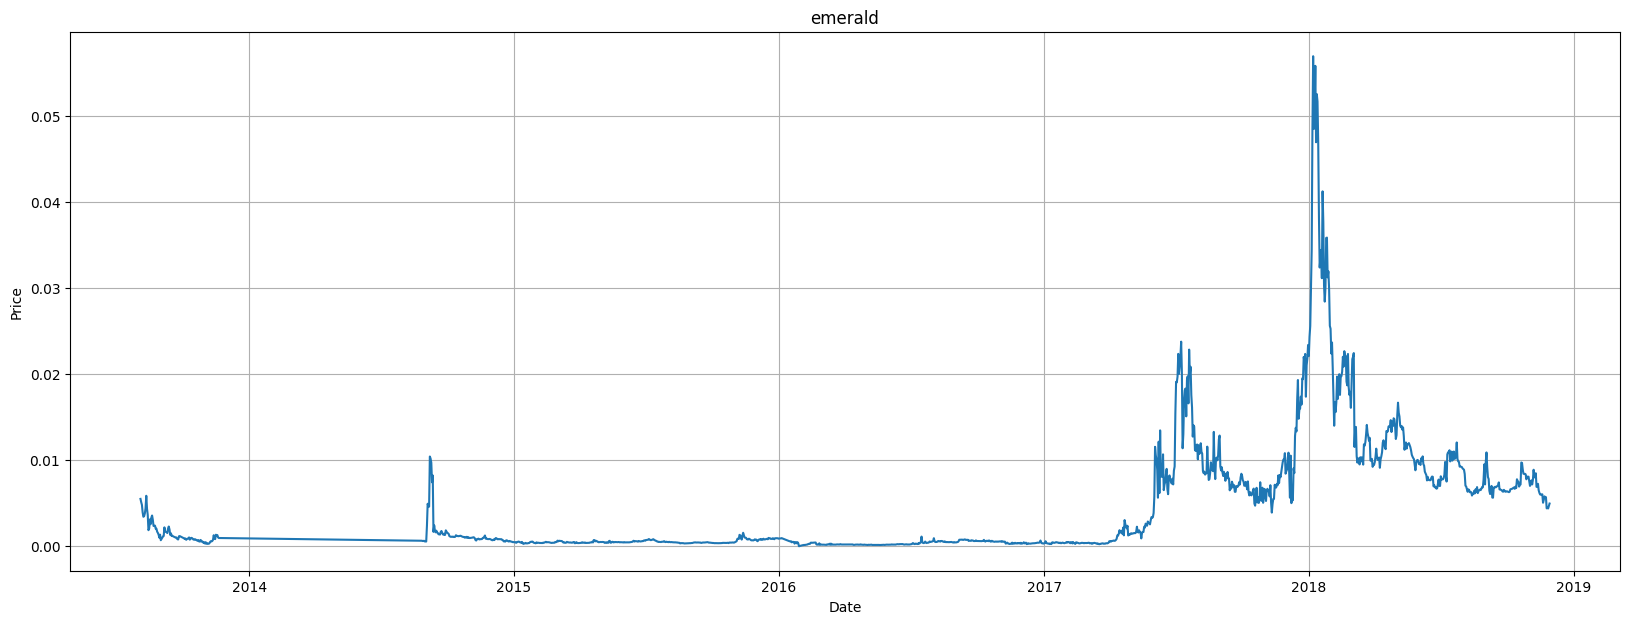

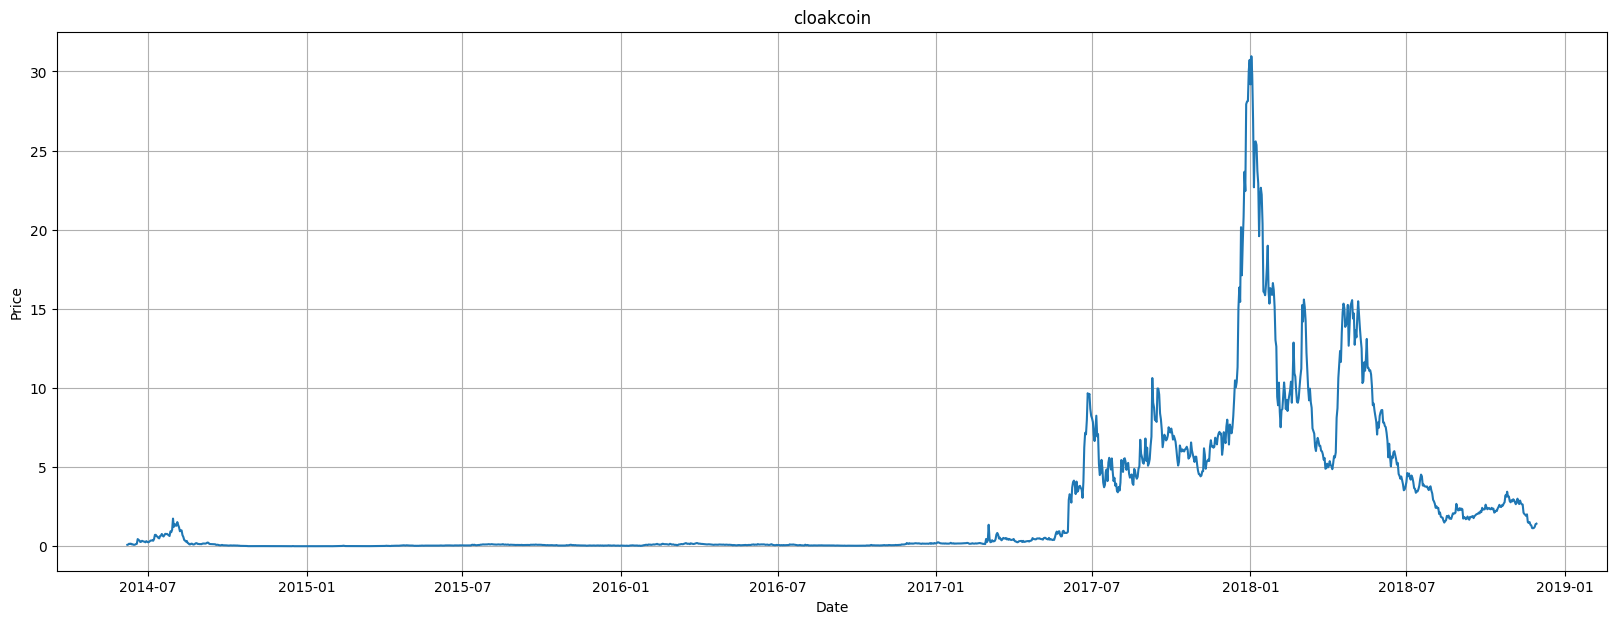

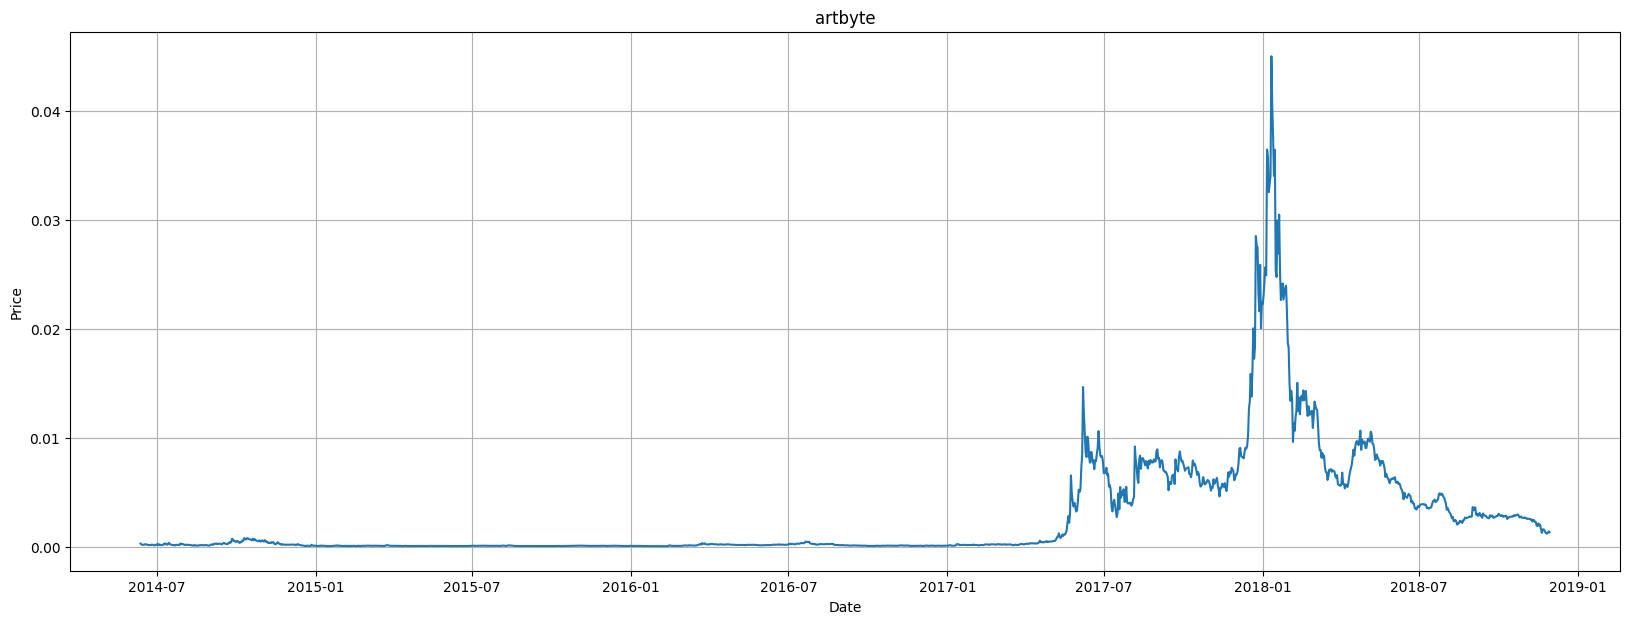

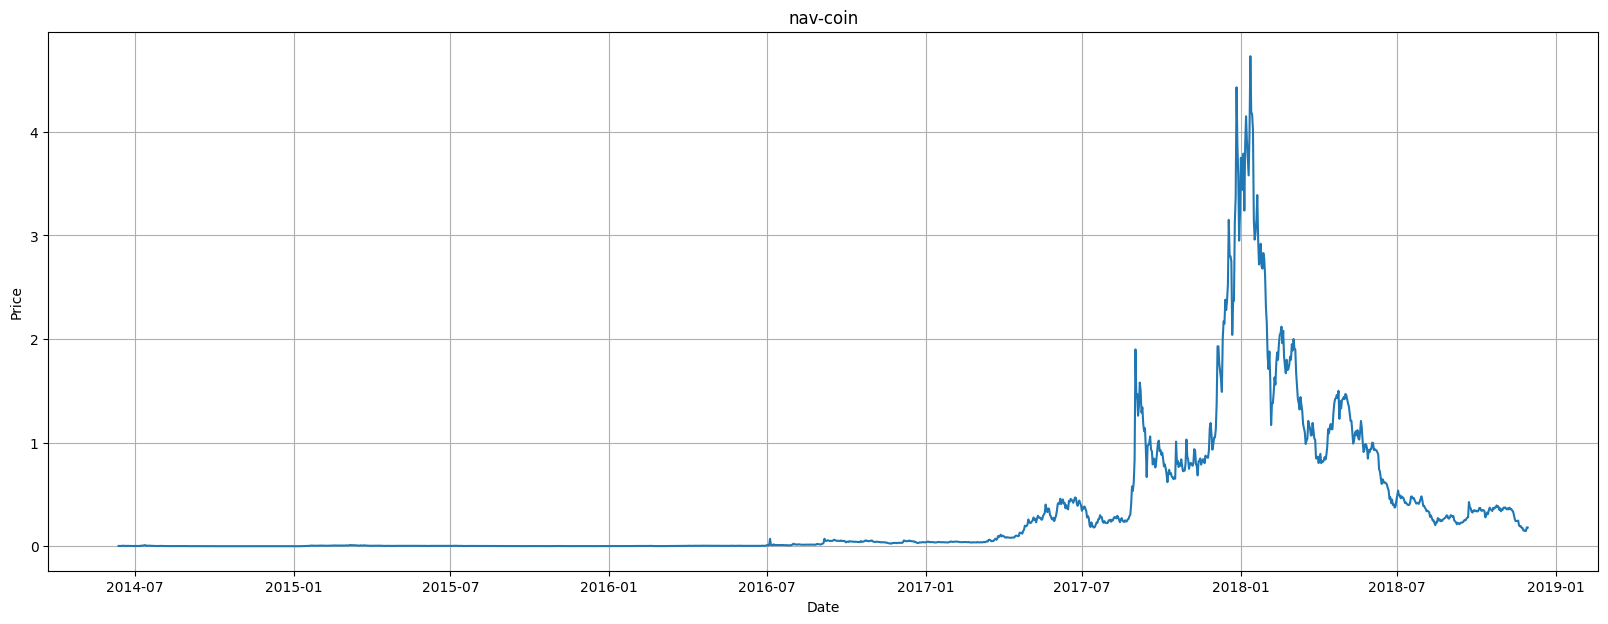

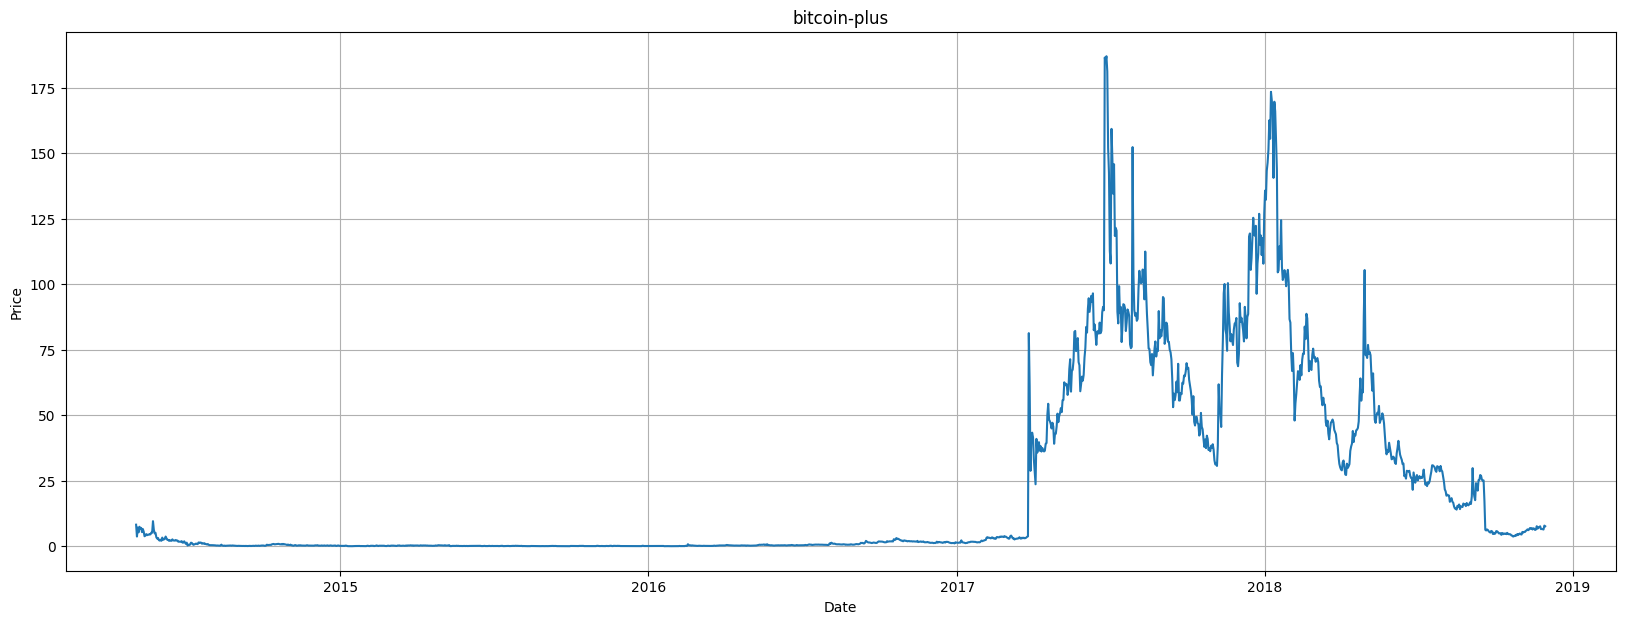

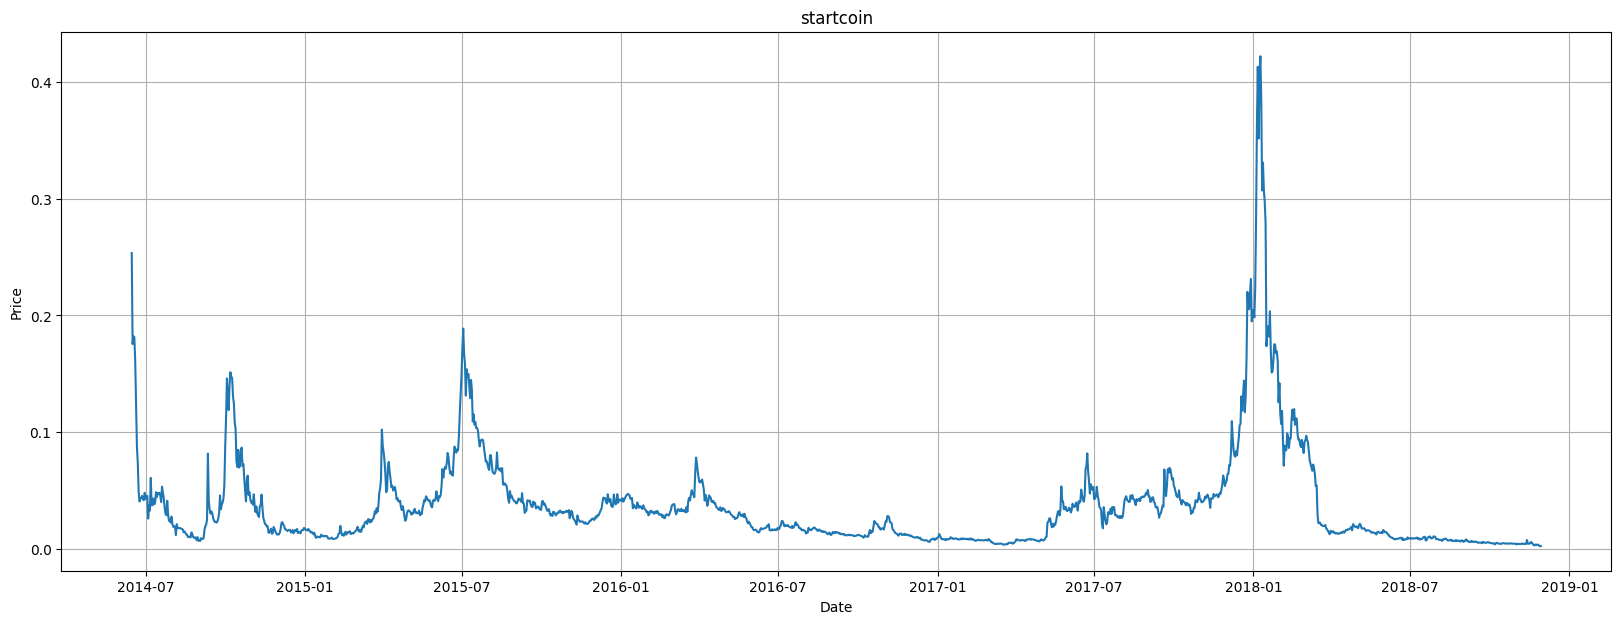

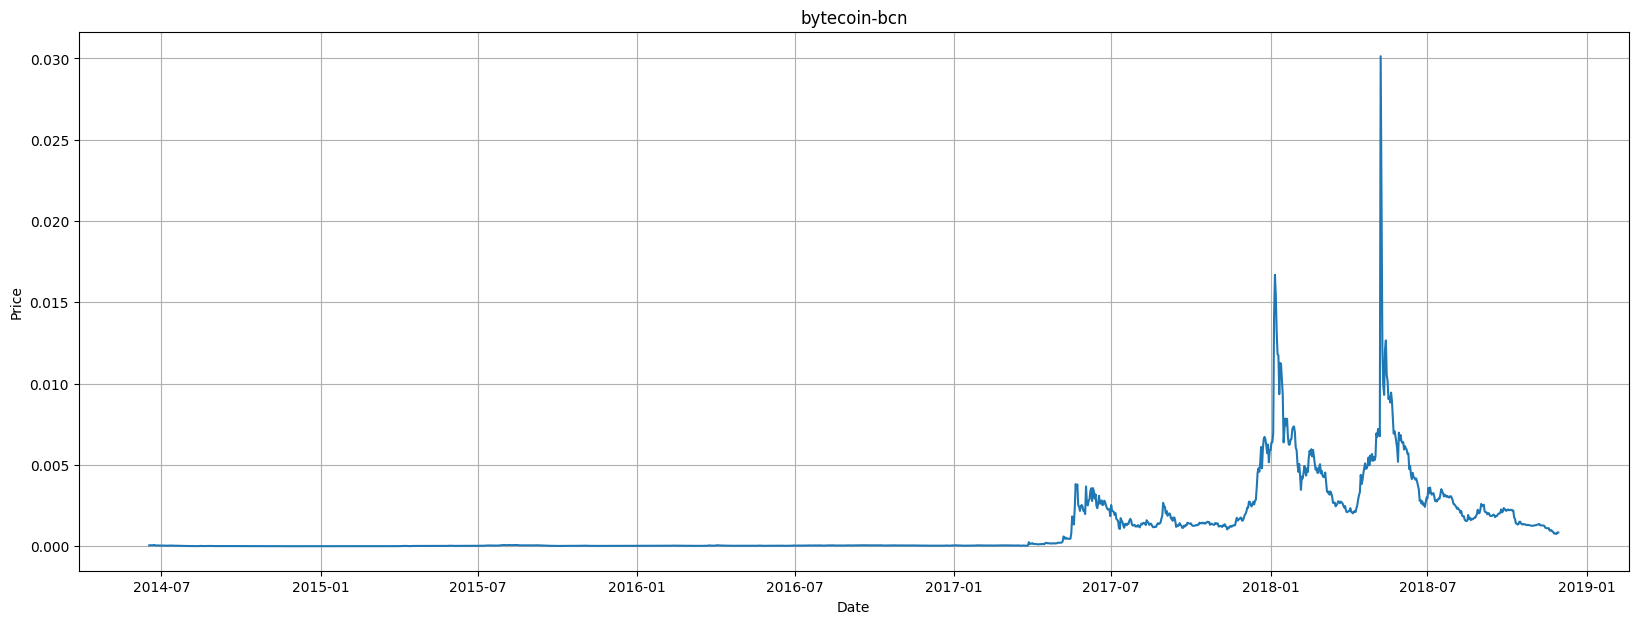

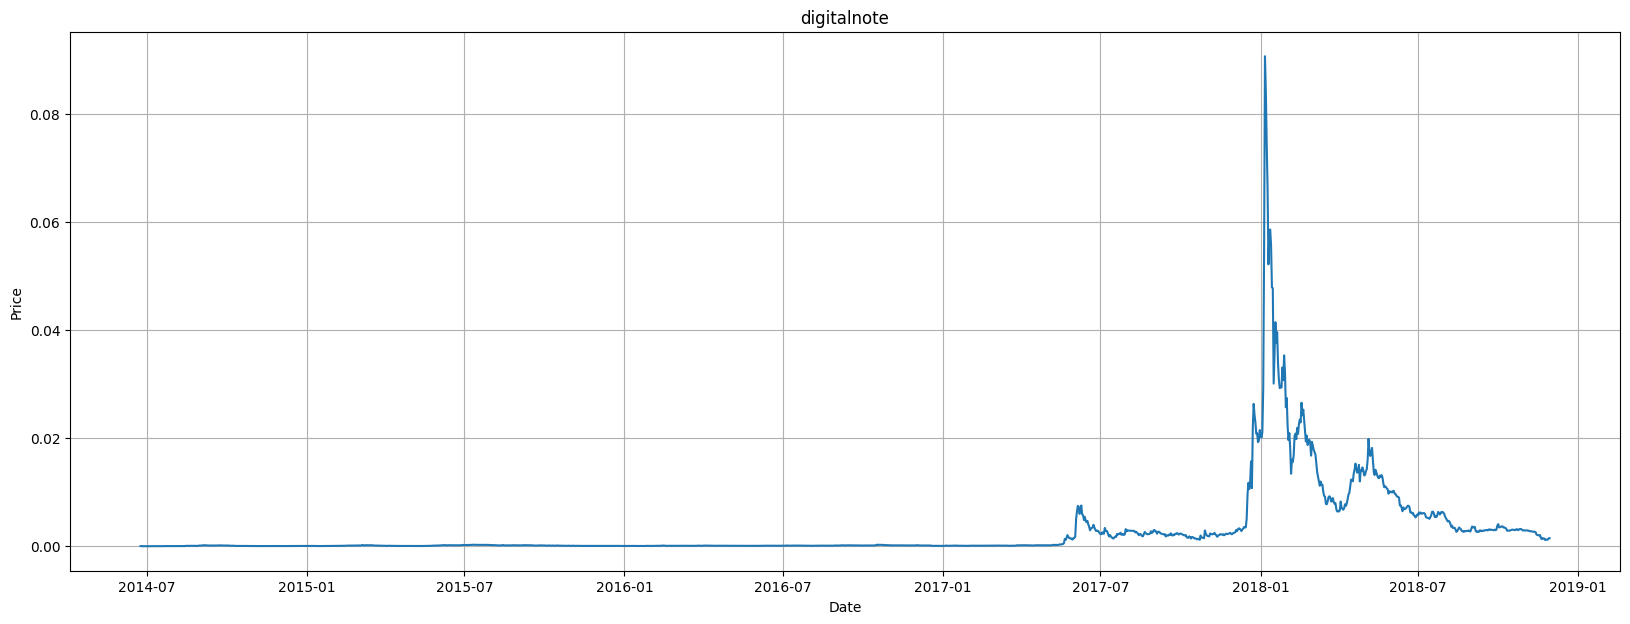

In [54]:
# function to plot the close prices of all the cryptocurrencies in the dataframe

def plot_open(df):
    cryptos = df["slug"].unique().tolist() #get a list of all cryptos in the dataframe
    for i in range(len(cryptos)): #iterate over every crypto
        plt.figure(figsize = (20,7))
        temp = df[df["slug"] == cryptos[i]]
        plt.plot(temp["close"]) #plot the close prices for every crypto
        plt.title(cryptos[i])
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.grid()
        plt.show()

plot_open(top_hundred)

In general, we can notice that over the years the cryptocurrencies either grew in 2014 or in 2018, or in both. So we can divide them into following 4 categories:

1. Grown in 2014
2. Grown in 2018
3. Grown in both 2014 and 2018
4. Never grown, always down

On taking a closer look at each graph, we further divide them into smaller families of cryptocurrencies with similar trends over the years:

1. Bitcoin Family: bitcoin, litecoin, goldcoin, flo, dogecoin, diamond, teslacoin, reddcoin, dash, potcoin, dopecoin, eccoin, groestlcoin, whitecoin, monero
2. Namecoin Family: namecoin, novacoin, feathercoin, anoncoin, fastcoin, omni, huntercoin
3. Freicoin Family: freicoin, deutsche-emark, 42-coin, maxcoin, auroracoin, ultracoin, ronpaulcoin, tekcoin
4. Ripple Family: ripple, infinitecoin, nxt, mooncoin, noblecoin, pandacoin-pnd, myriad, einsteinium, aricoin, newyorkcoin, bytecoin-bcn
5. Misc: others

In [56]:
# dividing them into smaller families

bitcoin_family = ["bitcoin", "litecoin", "goldcoin", "flo", "dogecoin", "diamond", "teslacoin", "reddcoin", "dash", "potcoin", "dopecoin", "eccoin", "groestlcoin", "whitecoin", "monero"]
namecoin_family = ["namecoin", "novacoin", "feathercoin", "anoncoin", "fastcoin", "omni", "huntercoin"]
freicoin_family = [ "freicoin", "deutsche-emark", "42-coin", "maxcoin", "auroracoin", "ultracoin", "ronpaulcoin", "tekcoin"]
ripple_family = ["ripple", "infinitecoin", "nxt", "mooncoin", "noblecoin", "pandacoin-pnd", "myriad", "einsteinium", "aricoin", "newyorkcoin", "bytecoin-bcn"]

misc = top_hundred["slug"].unique().tolist()
for i in bitcoin_family:
    misc.remove(i)
for j in namecoin_family:
    misc.remove(j)
for k in freicoin_family:
    misc.remove(k)
for l in ripple_family:
    misc.remove(l)

In [58]:
# creating separate dataframes for each family

btc_fam = pd.DataFrame()
nmc_fam = pd.DataFrame()
frc_fam = pd.DataFrame()
xrp_fam = pd.DataFrame()
misc_fam = pd.DataFrame()

for i in bitcoin_family:
    btc_fam = pd.concat([btc_fam, top_hundred[top_hundred["slug"] == i]])
    
for j in namecoin_family:
    nmc_fam = pd.concat([nmc_fam, top_hundred[top_hundred["slug"] == j]])

for k in freicoin_family:
    frc_fam = pd.concat([frc_fam, top_hundred[top_hundred["slug"] == k]])

for l in ripple_family:
    xrp_fam = pd.concat([xrp_fam, top_hundred[top_hundred["slug"] == l]])

# Bitcoin Price Prediction Using ARIMA

We want to perform price forecasting on Bitcoin using an ARIMA model. ARIMA (Autoregressive integrated moving average) model is a statistical analysis model that uses time series data to analyze patterns and predict future trends.

In [59]:
# create a dataframe for bitcoin

btc = btc_fam[btc_fam["slug"] == "bitcoin"]
btc

slug symbol     name  ranknow     open     high      low  \
date                                                                      
2013-04-28  bitcoin    BTC  Bitcoin        1   135.30   135.98   132.10   
2013-04-29  bitcoin    BTC  Bitcoin        1   134.44   147.49   134.00   
2013-04-30  bitcoin    BTC  Bitcoin        1   144.00   146.93   134.05   
2013-05-01  bitcoin    BTC  Bitcoin        1   139.00   139.89   107.72   
2013-05-02  bitcoin    BTC  Bitcoin        1   116.38   125.60    92.28   
...             ...    ...      ...      ...      ...      ...      ...   
2018-11-25  bitcoin    BTC  Bitcoin        1  3880.78  4120.87  3585.06   
2018-11-26  bitcoin    BTC  Bitcoin        1  4015.07  4107.14  3643.92   
2018-11-27  bitcoin    BTC  Bitcoin        1  3765.95  3862.96  3661.01   
2018-11-28  bitcoin    BTC  Bitcoin        1  3822.47  4385.90  3822.47   
2018-11-29  bitcoin    BTC  Bitcoin        1  4269.00  4413.02  4145.77   

              close        volume        market  close_ratio  spread  \
date                                                                   
2013-04-28   134.21  0.000000e+00  1.488567e+09       0.5438    3.88   
2013-04-29   144.54  0.000000e+00  1.603769e+09       0.7813   13.49   
2013-04-30   139.00  0.000000e+00  1.542813e+09       0.3843   12.88   
2013-05-01   116.99  0.000000e+00  1.298955e+09       0.2882   32.17   
2013-05-02   105.21  0.000000e+00  1.168517e+09       0.3881   33.32   
...             ...           ...           ...          ...     ...   
2018-11-25  4009.97  6.825640e+09  6.974927e+10       0.7930  535.81   
2018-11-26  3779.13  6.476900e+09  6.573929e+10       0.2919  463.22   
2018-11-27  3820.72  5.998720e+09  6.646897e+10       0.7908  201.95   
2018-11-28  4257.42  7.280280e+09  7.407256e+10       0.7720  563.43   
2018-11-29  4278.85  6.503348e+09  7.445102e+10       0.4980  267.25   

                   SMA7        SMA21         EMA8        EMA20  
date                                                            
2013-04-28   121.457143   117.740952   134.210000   134.210000  
2013-04-29   121.457143   117.740952   140.020625   139.633250  
2013-04-30   121.457143   117.740952   139.592280   139.400724  
2013-05-01   121.457143   117.740952   131.670615   132.931095  
2013-05-02   121.457143   117.740952   123.450924   126.225598  
...                 ...          ...          ...          ...  
2018-11-25  4361.330000  5546.214762  4503.351746  5198.084779  
2018-11-26  4205.278571  5420.475238  4342.413581  5062.946229  
2018-11-27  4115.114286  5294.747143  4226.481674  4944.638969  
2018-11-28  4065.864286  5186.522381  4233.356857  4879.189543  
2018-11-29  4053.422857  5082.957143  4243.466445  4822.014349  

[2042 rows x 16 columns]

### Further EDA on Bitcoin

We will check the correlations between the variables for bitcoin to decide which combinations will be the best to use for modelling.

['slug', 'symbol', 'name', 'ranknow', 'open', 'high', 'low', 'close', 'volume', 'market', 'close_ratio', 'spread', 'SMA7', 'SMA21', 'EMA8', 'EMA20']


In [75]:
# function to plot the heatmap

def plot_heatmap(df):
    cryptos = df["slug"].unique().tolist() #get a list of all cryptos in the dataframe
    for i in range(len(cryptos)): #iterate over every crypto
        plt.figure(figsize = (10,5))
        temp = df[df["slug"] == cryptos[i]]
        sns.heatmap(temp.select_dtypes(exclude=[object]).corr(), annot=True, cmap='summer') #plot the heatmap for every crypto
        plt.title(cryptos[i])
        plt.show()

plot_heatmap(btc)

It can be noticed that the correlation between open, close, high, and low is 1, which means that using them all can lead to duplicate variables. We will use only the close price out of the 4 for our modelling.

### Modelling

In [83]:
#import the required libraries for ARIMA prediction

!pip3 install statsmodel

import math
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA', FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA', FutureWarning)

ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel


In order to build the ARIMA model for our data, we will have to divide the data into 2 parts - training set and testing set. The training set is the input data for the model where the model analyses the underlying patterns and makes prediction on their basis. The testing set is used to check if the predictions made by the model are accurate. We will use the first 90% of our data as our training set and the remaining 10% as the testing set.

We also calculate the accuracy of our model using MAPE (Mean Absolute Percentage Error), which is the absolute difference between the actual and predicted values, divided by the actual value. This can give us an idea on how our model will perform for similar data.

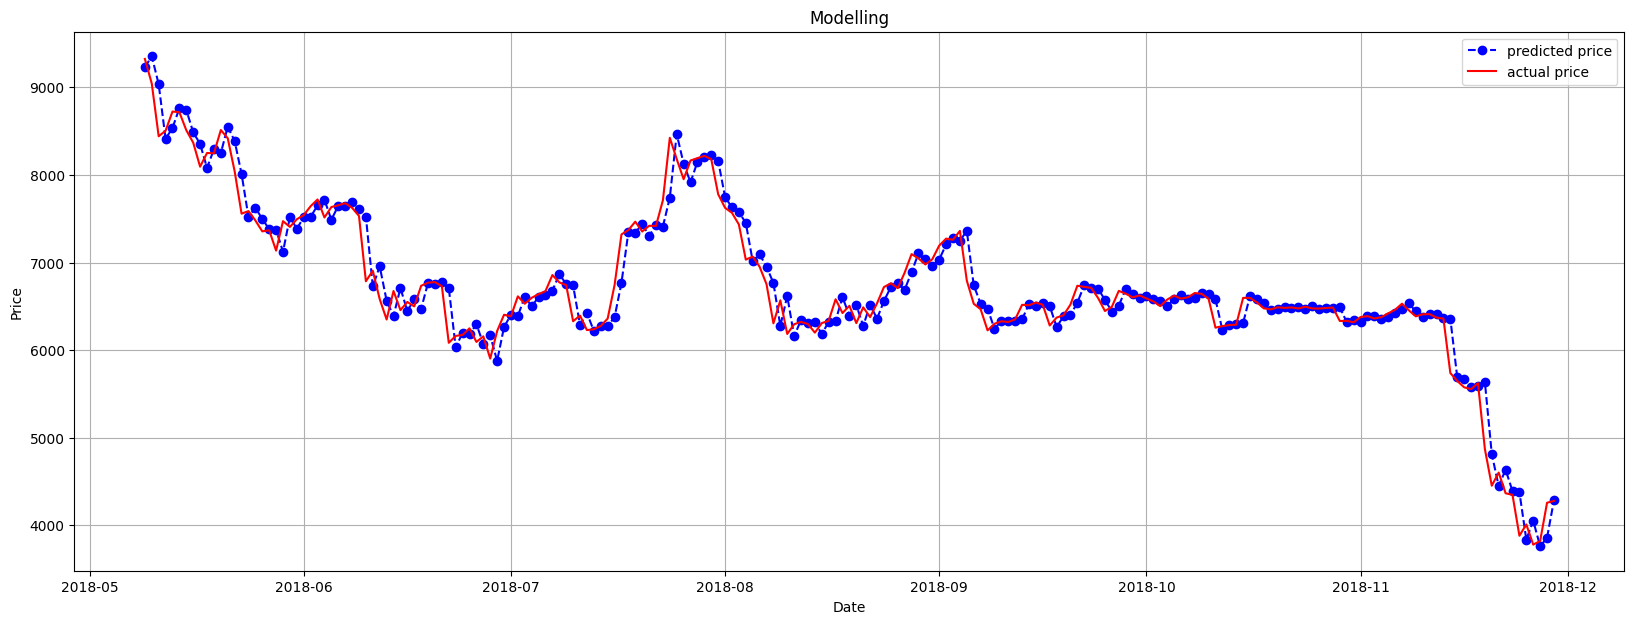

MAPE: 0.021406851904081422
Percentage error: 2.140685190408142
Accuracy: 97.85931480959187


Total time taken for all predictions = 10.038663864135742s


In [84]:
#using ARIMA on the desired feature in the dataframe and checking its fit and accuracy on every cryptocurrency in it

def fit_model(df, feature):
    st = time.time() # to calculate the time take for the prediction of all the crytpocurrencies in the dataframe
    
    #divide the data into training and testing data

    to_row = int(0.9*len(df)) # 90% mark
    training_data = df[0:to_row][feature]
    testing_data = df[to_row:][feature]
    training_set = list(training_data)
    testing_set = list(testing_data)

    #predict the data for the timeframe of the testing set

    model_predictions = []
    n_test_observations = len(testing_set)
    for i in range(n_test_observations):
        model = ARIMA(training_set, order = (4,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        model_predictions.append(output[0])
        actual_test_value = testing_set[i]
        training_set.append(actual_test_value)

    #plot the predicted and testing data

    plt.figure(figsize = (20,7))
    date_range = df[to_row:].index
    plt.plot(date_range, model_predictions, 'blue', marker = "o", linestyle = "dashed", label = 'predicted price')
    plt.plot(date_range, testing_set, 'red', label = "actual price")
    plt.title("Modelling")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()

    #calculate the prediction accuracy of the model

    mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_set)) / np.abs(testing_set))
    print('MAPE: ' + str(mape))
    print('Percentage error: ' + str(mape*100))
    print('Accuracy: ' + str(100 - mape*100))
    
    et = time.time()
    print("\n")
    print("Total time taken for all predictions = " + str(et-st) + "s")
    
fit_model(btc, "close")

As seen above, our model has an accuracy of almost 98%, which is an excellent accuracy, which means that the model fits well on our Bitcoin price data.

### Creating Weighted Portfolio

Our next goal is to create a portfolio for each family, as created above, for an initial investment of $1k made on day 1 (for a common time period for every cryptocurrency in the portfolio) and analyze the price trend of this investment over the years.

In [85]:
# function to get the common time period for all the cryptocurrencies in a dataframe. 
# this function returns the common start date and end date for all cryptocurrencies in the dataframe

def common_time_period(df):
    start_date = data.index.min()
    end_date = data.index.max()
    for i in range(len(cryptos)): #iterate over every crypto
        temp = df[df["slug"] == cryptos[i]]
        if temp.index.min() > start_date:
            start_date = temp.index.min()
        if temp.index.max() < end_date:
            end_date = temp.index.max()
    return start_date, end_date

common_time_period(top_hundred)

(Timestamp('2014-06-24 00:00:00'), Timestamp('2018-11-29 00:00:00'))

We will consider the day 1 for our portfolio to be 2014-06-24 and the end date to be 2018-11-29.

### Weightage

We use the prices of the cryptocurrencies on Day 1 to find the weightages of each cryptocurrency in a portfolio. We plan to invest equal amount in every cryptocurrency in the portfolio, so the one with higher prices will have a lower weightages and the one with lower prices will have higher weightages of quantity.

In [86]:
# function to get the quantity weightage for each cryptocurrency in a portfolio

def get_weightage(df):
    weights = {} # dictionary of weights
    cryptos = df["slug"].unique().tolist()
    for i in range(len(cryptos)):
        temp = df[df["slug"] == cryptos[i]]
        start_price = temp[temp.index == "2014-06-24"]["close"].sum()
        
        # cryptos with high price should have lower weightage and vice versa
        
        weight = (1/start_price) / ((1/df[df.index == "2014-06-24"]["close"]).sum())
        weights[cryptos[i]] = weight
        
    return weights
    
btc_weights = get_weightage(btc_fam) # bitcoin family weights
nmc_weights = get_weightage(nmc_fam) # namecoin family weights
frc_weights = get_weightage(frc_fam) # freicoin family weights
xrp_weights = get_weightage(xrp_fam) # ripple family weights

### Portfolio

In [87]:
# function to create a portfolio for the given family of cryptocurrecnicest for a given initial investment

def create_portfolio(df, weights, investment):
    start_date = "2014-06-24" # common start date as found earlier
    end_date = "2018-11-29" # common end date as found earlier
    portfolio = pd.DataFrame(index = df.loc[start_date:end_date].index.unique())
    cryptos = df["slug"].unique().tolist() 
    for i in range(len(cryptos)): 
        temp = df[df["slug"] == cryptos[i]].loc[start_date:end_date]
        
        dates = temp.index.unique().tolist() # list of dates
        temp["change_factor"] = temp["close"].pct_change() # the change factor between 2 consecutive close prices
        portfolio.at["2014-06-24", cryptos[i]] = investment/len(cryptos) # equal investment in each
        
        # to track the change in the investment in the crypto, we multiply the previous investment value with the change factor of the crypto
        
        for j in range(1,len(dates)):
            previous_value = portfolio.loc[str(dates[j-1].date())][cryptos[i]]
            change = temp.loc[str(dates[j].date())]["change_factor"]
            portfolio.at[str(dates[j].date()), cryptos[i]] = previous_value + (previous_value * change)
            
    portfolio["Total"]  = portfolio[cryptos].sum(axis=1) # value of the total investment in the portfolio
    return portfolio

We want to create portfolios for our 4 key families - bitcoin, namecoin, freicoin, and ripple family - for an initial investment of $1k

In [88]:
btc_portfolio = create_portfolio(btc_fam, btc_weights, 1000) # bitcoin family portfolio
nmc_portfolio = create_portfolio(nmc_fam, nmc_weights, 1000) # namecoin family portfolio
frc_portfolio = create_portfolio(frc_fam, frc_weights, 1000) # freicoin family portfolio
xrp_portfolio = create_portfolio(xrp_fam, xrp_weights, 1000) # ripple family portfolio

### Portfolio Analysis and Modelling

We will use the bitcoin portfolio for the analysis and modelling.

In [89]:
btc_portfolio

bitcoin    litecoin   goldcoin          flo    dogecoin  \
date                                                                     
2014-06-24   66.666667   66.666667  66.666667    66.666667   66.666667   
2014-06-25   64.832750   63.620630  65.835592    53.741497   57.663451   
2014-06-26   66.527005   62.928349  61.726674    62.312925   63.451233   
2014-06-27   68.372370   64.035999  63.445606    69.251701   63.022508   
2014-06-28   68.291091   63.620630  61.024648    68.979592   59.163987   
...                ...         ...        ...          ...         ...   
2018-11-25  459.048240  213.845621  68.845012  2768.435374  475.884244   
2018-11-26  432.622433  203.599862  69.557362  2374.557823  449.946409   
2018-11-27  437.383520  215.091727  69.846432  2473.605442  447.374062   
2018-11-28  487.375507  239.736933  78.090076  2839.727891  481.457663   
2018-11-29  489.828743  233.991000  76.820235  2974.421769  480.385852   

               diamond   teslacoin     reddcoin        dash    potcoin  \
date                                                                     
2014-06-24   66.666667   66.666667    66.666667   66.666667  66.666667   
2014-06-25   83.007232   67.713004    66.666667   63.488701  62.983947   
2014-06-26   77.308170   70.528151    85.057471   70.621469  68.042628   
2014-06-27   67.644541   52.416542    87.356322   71.257062  78.321867   
2014-06-28   86.112466   45.316393    68.965517   67.302260  82.645353   
...                ...         ...          ...         ...        ...   
2018-11-25  436.513031  108.644743  2995.402299  645.833333  72.554971   
2018-11-26  462.190268   93.996014  2779.310345  628.036723  67.381627   
2018-11-27  445.072110   86.372696  2988.505747  629.449153  70.484284   
2018-11-28  509.265203  100.597907  3524.137931  702.754237  89.046270   
2018-11-29  526.383361  119.083209  3551.724138  682.627119  83.974100   

               dopecoin       eccoin   groestlcoin    whitecoin       monero  \
date                                                                           
2014-06-24    66.666667    66.666667     66.666667    66.666667    66.666667   
2014-06-25    65.000000    40.000000     56.128293    60.551378    68.902439   
2014-06-26    62.380952    26.666667     55.807560    89.724311    58.739837   
2014-06-27    56.904762    40.000000     76.013746    83.208020    44.715447   
2014-06-28    54.761905    26.666667     70.698740    78.195489    51.829268   
...                 ...          ...           ...          ...          ...   
2018-11-25   756.190476  1600.000000  11900.435281  4233.684211  1179.878049   
2018-11-26   738.571429  1506.666667  11654.203895  4010.526316  1081.707317   
2018-11-27   732.380952  2040.000000  12079.541810  4008.922306  1161.178862   
2018-11-28   890.952381  2266.666667  14064.604811  4527.518797  1291.056911   
2018-11-29  1030.238095  1706.666667  13794.730813  4632.581454  1243.902439   

                   Total  
date                      
2014-06-24   1000.000000  
2014-06-25    940.135581  
2014-06-26    981.823403  
2014-06-27    985.966492  
2014-06-28    953.574006  
...                  ...  
2018-11-25  27915.194887  
2018-11-26  26552.874489  
2018-11-27  27885.209103  
2018-11-28  32092.989185  
2018-11-29  31627.358993  

[1620 rows x 16 columns]

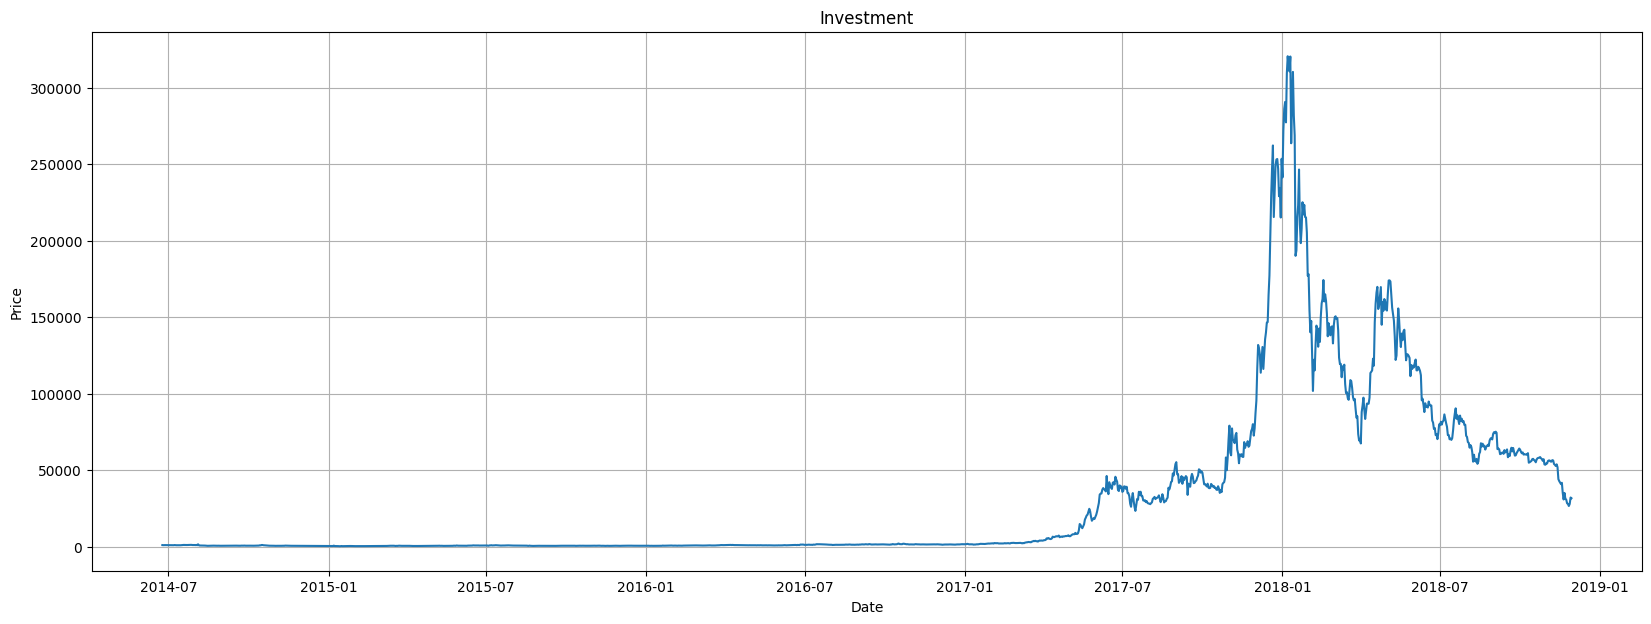

In [90]:
plt.figure(figsize = (20,7))

plt.plot(btc_portfolio.index, btc_portfolio["Total"])
plt.title("Investment")
plt.xlabel("Date")
plt.ylabel("Price")

plt.grid()
plt.show()

As it is evident from the graph above, the bitcoin portfolio follows a similar trend as any crypto in it. Our initial investment of \\$1k made on 2014-06-24 grows up to a max value of almost \\$350,000 around the start of 2018 and then falls down.

We will use the portfolio value trend to check if our previously build model works for the portfolio as well.

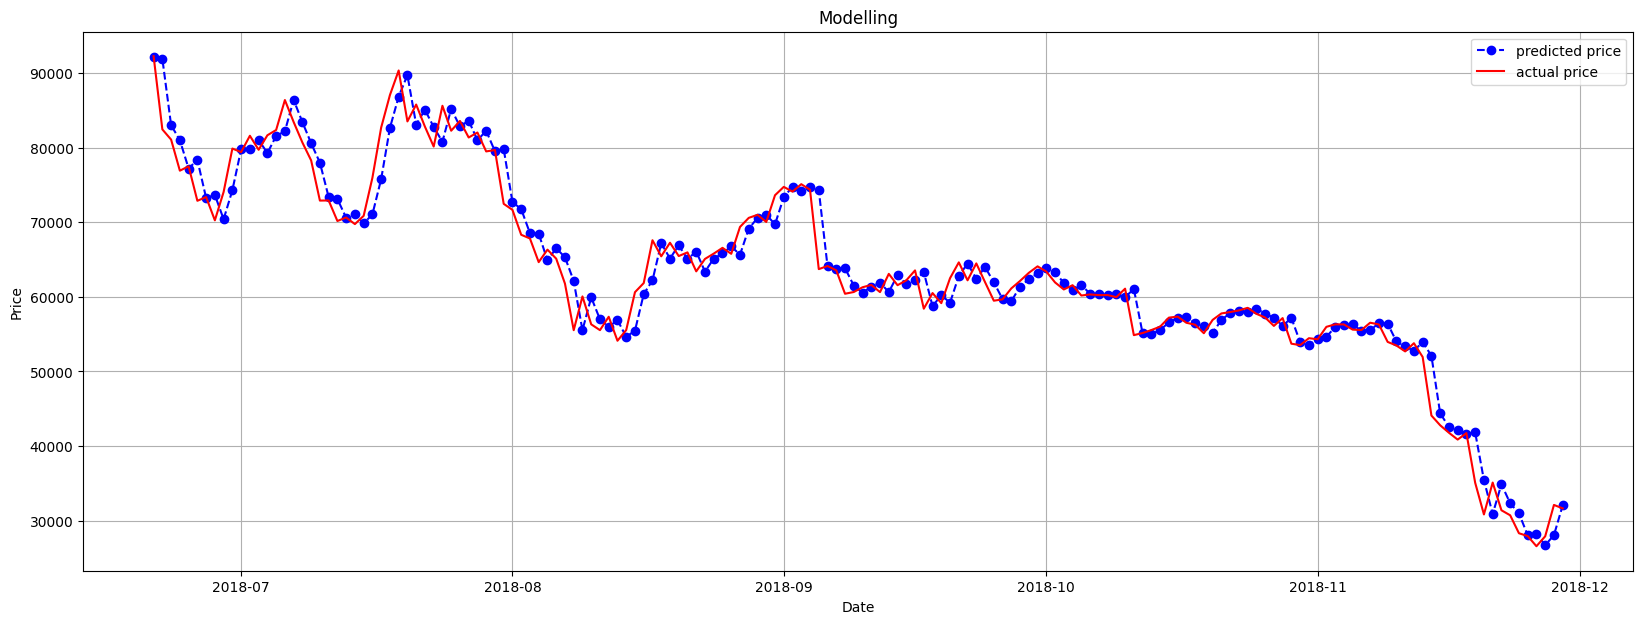

MAPE: 0.03346562682394614
Percentage error: 3.3465626823946137
Accuracy: 96.65343731760538


Total time taken for all predictions = 10.745742797851562s


In [91]:
fit_model(btc_portfolio, "Total")

We have a great accuracy of almost 97%. This concludes that ARIMA is a reliable model for short-term price prediction and that we can use it for both, a single cryptocurrency and a portfolio with a similar trend, to get accurate predictions.